In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings ('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.formula.api import ols

# Get datasets

In [2]:
# get the data
full_data = pd.read_csv (r"C:\Users\fabi_\OneDrive\Estudos e Cursos\Data analytics\Ironhack.Labs\Project 1\ironhack-fifa-moneyball\files\fifa_train_data.CSV", sep = '?')
full_data.columns = full_data.columns.str.lower().str.replace(' ', '_')
full_data = full_data.drop(['unnamed:_0','player_photo', 'club_logo', 'flag_photo'], axis=1)
pd.set_option('display.max_columns', None)
full_data

,id,name,age,ova,nationality,club,bov,bp,position,pot,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
0,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
1,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
2,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
3,80,E. Belözoğlu,38,77,Turkey,Fenerbahçe SK,77,CM,CM CDM,77,Fenerbahçe SK 2019 ~ 2020,"5'7""",159lbs,Left,0,"Jul 2, 2019",NaN,€2.8M,€44K,€5.3M,2019 ~ 2020,342,80,66,43,84,69.0,406,77,83.0,80,85,81,308,54,36,67.0,70,81.0,340,77,72.0,51,64,76,384,87,62.0,65.0,85.0,85,80.0,190,65,65,60.0,47,7,11,7,14,8,2017,403,4 ★,4★,Medium,Medium,2 ★,44,71,83,77,62,66,7,66+2,66+2,66+2,72+0,72+0,72+0,72+0,72+0,75+2,75+2,75+2,72+2,76+1,76+1,76+1,72+2,66+2,72+2,72+2,72+2,66+2,64+2,65+2,65+2,65+2,64+2,16+2,Male
4,241,R. Giggs,39,78,Wales,Manchester United,78,CAM,LM CM CAM,78,Manchester United 1990 ~ 2014,"5'10""",157lbs,Left,0,"Dec 1, 1990",NaN,€1K,€60K,€0,1990 ~ 2014,380,90,70,60,85,75.0,402,77,87.0,78,81,79,337,59,60,72.0,76,70.0,310,71,59.0,48,61,71,358,60,47.0,78.0,83.0,90,NaN,120,26,43,51.0,32,10,5,7,5,5,1939,392,2 ★,3★,Medium,Medium,3 ★,60,72,85,77,41,57,9,71+1,71+1,71+1,78+0,74+1,74+1,74+1,78+0,78+0,78+0,78+0,77+1,73+1,73+1,73+1,77+1,62+1,63+1,63+1,63+1,62+1,57+1,53+1,53+1,53+1,57+1,11+1,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13695,259083,S. Diarrassouba,18,58,Burkina Faso,FC St. Gallen,61,RM,CAM LM,77,FC St. Gallen 2020 ~ 2021,"5'5""",123lbs,Right,19,"Sep 28, 2020",NaN,€250K,€900,€519K,2020 ~ 2021,238,47,45,40,62,44.0,269,63,44.0,42,55,65,355,77,73,68.0,52,85.0,242,47,62.0,51,45,37,219,45,25.0,47.0,57.0,45,55.0,119,42,38,39.0,56,12,9,12,10,13,1498,323,2 ★,3★,High,Med

In [3]:
buy_data = pd.read_csv (r"C:\Users\fabi_\OneDrive\Estudos e Cursos\Data analytics\Ironhack.Labs\Project 1\ironhack-fifa-moneyball\files\fifa_test_data.CSV", sep = '?')
buy_data.columns = buy_data.columns.str.lower().str.replace(' ', '_')
buy_data = buy_data.drop(['unnamed:_0','player_photo', 'club_logo', 'flag_photo'], axis=1)
pd.set_option('display.max_columns', None)
buy_data

,id,name,age,nationality,club,bp,position,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
0,252942,G. Borrelli,19,Italy,Pescara,ST,ST,Pescara 2019 ~ 2024,"6'4""",198lbs,Right,15,"Jul 12, 2019",NaN,€325K,€600,€707K,2019 ~ 2024,247,26,61,66,44,50.0,188,53,28.0,23,31,53,246,48,55,49.0,49,45.0,292,58,62.0,44,80,48,227,44,21.0,66.0,41.0,55,45.0,53,18,20,15.0,54,12,14,7,7,14,1307,284,2 ★,2★,Medium,Low,1 ★,52,57,36,52,24,63,4,58+2,58+2,58+2,50+0,54+0,54+0,54+0,50+0,50+2,50+2,50+2,48+2,44+2,44+2,44+2,48+2,34+2,35+2,35+2,35+2,34+2,34+2,38+2,38+2,38+2,34+2,16+2,Male
1,248174,N. Boujellab,21,Morocco,FC Schalke 04,CAM,CAM CM CDM,FC Schalke 04 2018 ~ 2022,"6'0""",159lbs,Right,12,"Jul 1, 2018",NaN,€975K,€5K,€1.9M,2018 ~ 2022,274,50,58,49,65,52.0,313,75,54.0,55,59,70,353,71,68,77.0,62,75.0,267,58,52.0,59,47,51,272,58,38.0,56.0,61.0,59,58.0,160,55,54,51.0,54,15,15,7,10,7,1693,359,4 ★,3★,Medium,Medium,1 ★,69,56,59,73,50,52,33,60+2,60+2,60+2,64+0,64+0,64+0,64+0,64+0,65+2,65+2,65+2,64+2,61+2,61+2,61+2,64+2,57+2,56+2,56+2,56+2,57+2,56+2,53+2,53+2,53+2,56+2,17+2,Male
2,257995,A. Wahab Ibrahim,21,Ghana,Famalicão,LB,LB,Famalicão 2020 ~ 2023,"5'11""",159lbs,Left,8,"Aug 10, 2020",NaN,€400K,€1K,€920K,2020 ~ 2023,246,60,32,54,59,41.0,247,58,37.0,41,52,59,326,69,76,62.0,56,63.0,256,40,56.0,61,69,30,251,53,57.0,51.0,49.0,41,52.0,176,55,60,61.0,42,7,14,9,5,7,1544,341,2 ★,2★,Medium,Medium,1 ★,73,35,54,59,57,63,4,51+2,51+2,51+2,55+0,53+0,53+0,53+0,55+0,54+2,54+2,54+2,57+2,54+2,54+2,54+2,57+2,60+2,57+2,57+2,57+2,60+2,60+2,59+2,59+2,59+2,60+2,14+2,Male
3,226077,A. Gabr,29,Egypt,Egypt,CB,CB,Egypt Free,"6'3""",194lbs,Right,0,"Jul 14, 2014",NaN,€0,€0,€0,Free,214,34,25,63,59,33.0,208,42,34.0,22,66,44,305,65,62,63.0,55,60.0,308,56,66.0,66,78,42,211,67,63.0,22.0,35.0,24,65.0,218,72,71,75.0,50,14,7,14,8,7,1514,332,2 ★,2★,Medium,Medium,1 ★,63,35,47,46,69,72,4,45+1,45+1,45+1,44+0,43+0,43+0,43+0,44+0,45+1,45+1,45+1,46+1,51+1,51+1,51+1,46+1,59+1,63+1,63+1,63+1,59+1,62+1,67+1,67+1,67+1,62+1,14+1,Male
4,216054,N. Domínguez,30,Argentina,Racing Club,CDM,CB CDM,Racing Club 2019 ~ 2021,"6'0""",157lbs,Right,0,"Jan 21, 2019",NaN,€6M,€17K,€8.4M,2019 ~ 2021,313,62,61,68,79,43.0,331,67,50.0,56,81,77,309,56,54,64.0,75,60.0,372,77,71.0,79,76,69,340,69,79.0,56.0,81.0,55,75.0,238,79,78,81.0,67,15,13,12,11,16,1970,416,3 ★,3★,Medium,Medium,1 ★,55,64,74,70,78,75,17,67+2,67+2,67+2,67+0,69+0,69+0,69+0,67+0,71+2,71+2,71+2,69+2,76+0,76+0,76+0,69+2,74+2,78+-2,78+-2,78+-2,74+2,74+2,76+0,76+0,76+0,74+2,20+2,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3420,239431,I. Maela,27,South Africa,Orlando Pirates,LB,LB CB,Orlando Pirates 2017 ~ 2023,"5'7""",150lbs,Left,0,"Jun 28, 2017",NaN,€925K,€500,€2M,2017 ~ 2023,236,66,31,60,49,30.0,238,66,34.0,44,26,68,344,71,67,55.0,65,86.0,286,55,65.0,69,56,41,242,51,68.0,42.0,41.0,40,68.0,216,72,74,70.0,56,13,12,6,10,15,1618,349,3 ★,3★,Medium,Medium,1 ★,69,39,46,66,70,59,3,52+2,52+2,52+2,57+0,54+0,54+0,54+0,57+0,52+2,52+2,52+2,57+2,52+2,52+2,52+2,57+2,67+2,60

# Get columns that are in full_data but not in buy_data

In [4]:
diff_columns_full_data = full_data.columns.difference(buy_data.columns)
diff_columns_full_data

Index(['bov', 'ova', 'pot'], dtype='object')

In [5]:
full_data['bov'].describe()

count    13700.000000
mean        67.872555
std          6.635216
min         42.000000
25%         64.000000
50%         68.000000
75%         72.000000
max         93.000000
Name: bov, dtype: float64

In [6]:
full_data['ova'].describe()

count    13700.000000
mean        66.945912
std          6.860189
min         38.000000
25%         62.000000
50%         67.000000
75%         72.000000
max         93.000000
Name: ova, dtype: float64

In [7]:
full_data['pot'].describe()

count    13700.000000
mean        72.455839
std          5.763664
min         47.000000
25%         69.000000
50%         72.000000
75%         76.000000
max         93.000000
Name: pot, dtype: float64

# OVA

This assessment is based on various factors such as technical skills, physical attributes, tactical understanding, experience, and performance consistency.

<Axes: xlabel='ova', ylabel='Count'>

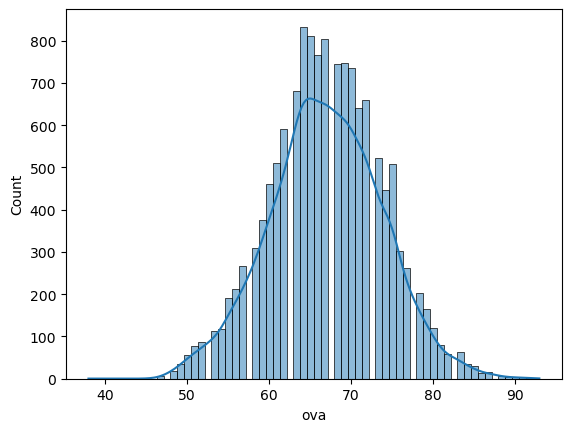

In [8]:
sns.histplot(full_data, x='ova', kde=True)

In [9]:
grouped_ova = full_data.groupby('ova').agg({'ova': ['count']})
grouped_ova

,ova
,count
ova,
38,1
42,1
45,1
47,7
48,18
49,35
50,56
51,78


# Understand categorical data that could be correlated to OVA

In [10]:
categorical_columns = full_data.select_dtypes(exclude=['number']).columns.tolist()
categorical_columns

['name',
 'nationality',
 'club',
 'bp',
 'position',
 'team_&_contract',
 'height',
 'weight',
 'foot',
 'joined',
 'loan_date_end',
 'value',
 'wage',
 'release_clause',
 'contract',
 'w/f',
 'sm',
 'a/w',
 'd/w',
 'ir',
 'hits',
 'ls',
 'st',
 'rs',
 'lw',
 'lf',
 'cf',
 'rf',
 'rw',
 'lam',
 'cam',
 'ram',
 'lm',
 'lcm',
 'cm',
 'rcm',
 'rm',
 'lwb',
 'ldm',
 'cdm',
 'rdm',
 'rwb',
 'lb',
 'lcb',
 'cb',
 'rcb',
 'rb',
 'gk',
 'gender']

In [11]:
# convert categorical values
full_data['value'] = full_data['value'].replace({'€': '', ' ': '', 'M': 'e+06', 'K': 'e+03'}, regex=True).astype(float)

In [12]:
full_data.groupby('value').agg({'ova': ['mean', 'max', 'min', 'count']})

ova              
                 mean max min count
value                              
0.0         69.019231  87  38   364
1000.0      72.333333  78  64     3
3000.0      48.000000  48  48     1
5000.0      52.000000  52  52     1
8000.0      55.000000  55  55     1
...               ...  ..  ..   ...
75000000.0  91.000000  91  91     1
78000000.0  90.000000  90  90     1
80000000.0  91.000000  91  91     1
87000000.0  91.000000  91  91     1
90000000.0  91.000000  91  91     1

[210 rows x 4 columns]

In [13]:
grouped_wf = full_data.groupby('w/f').agg({'ova': ['mean', 'max', 'min', 'count']})
grouped_wf

ova              
          mean max min count
w/f                         
1 ★  64.425532  87  45    94
2 ★  65.672433  87  47  2717
3 ★  66.473803  91  38  8436
4 ★  70.051872  93  50  2217
5 ★  70.309322  91  52   236

In [14]:
full_data['w/f'] = full_data['w/f'].replace({'★': ''}, regex=True).astype(float)

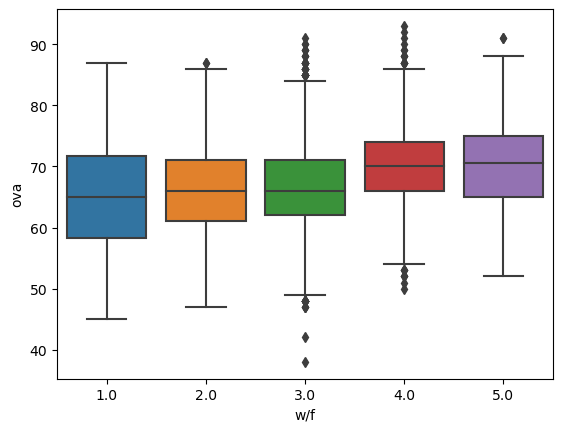

In [15]:
sns.boxplot(y='ova', x='w/f', data=full_data)
plt.show()

In [16]:
grouped_sm = full_data.groupby('sm').agg({'ova': ['mean', 'max', 'min', 'count']})
grouped_sm

ova              
         mean max min count
sm                         
1★  66.745276  91  38  1323
2★  64.212358  89  47  6004
3★  68.680218  89  48  5313
4★  73.723658  93  54  1006
5★  78.888889  92  65    54

In [17]:
full_data['sm'] = full_data['sm'].replace({'★': ''}, regex=True).astype(float)

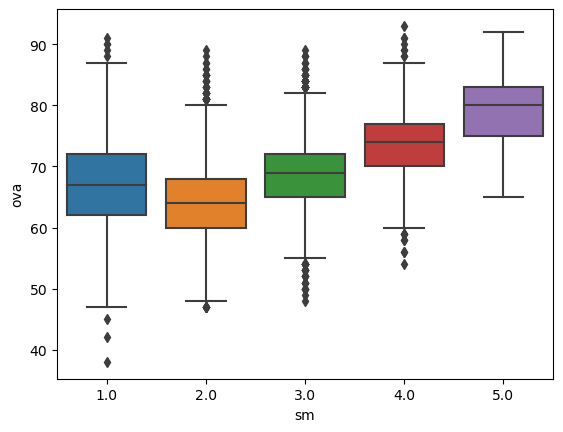

In [18]:
sns.boxplot(y='ova', x='sm', data=full_data)
plt.show()

In [19]:
grouped_sm = full_data.groupby('ir').agg({'ova': ['mean', 'max', 'min', 'count']})
grouped_sm

ova               
          mean max min  count
ir                           
1 ★  65.811025  85  42  12118
2 ★  74.259949  88  38   1181
3 ★  79.023599  91  61    339
4 ★  83.272727  91  75     55
5 ★  84.428571  93  77      7

In [20]:
full_data['ir'] = full_data['ir'].replace({'★': ''}, regex=True).astype(float)

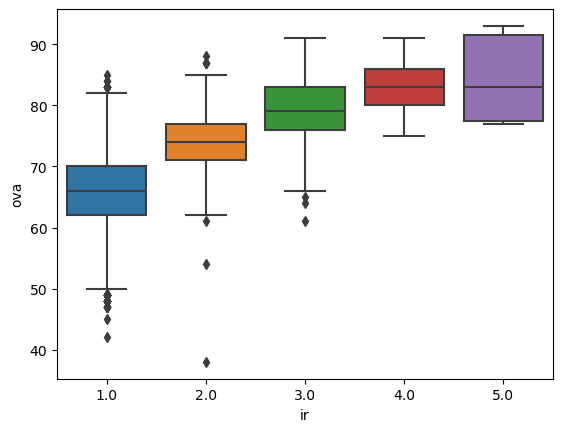

In [21]:
sns.boxplot(y='ova', x='ir', data=full_data)
plt.show()

In [22]:
grouped_hits = full_data.groupby('hits').agg({'ova': ['mean', 'max', 'min', 'count']})
grouped_hits

ova              
           mean max min count
hits                         
1.1K  73.333333  79  66     3
1.2K  80.333333  87  76     6
1.3K  78.800000  85  75     5
1.4K  71.000000  75  68     3
1.5K  79.000000  87  73     3
...         ...  ..  ..   ...
961   69.000000  69  69     1
97    74.800000  80  70     5
974   77.000000  77  77     1
98    73.636364  87  64    11
99    75.250000  85  65     8

[482 rows x 4 columns]

In [23]:
full_data['hits'] = full_data['hits'].replace({'K': 'e+03'}, regex=True).astype(float)

In [24]:
full_data['hits'].describe()

count    13700.000000
mean        35.975182
std        168.570793
min          3.000000
25%          4.000000
50%          7.000000
75%         18.000000
max       9200.000000
Name: hits, dtype: float64

# Get correlations in full_data

In [25]:
# get numerical values
numerical_columns = full_data.select_dtypes(include=['number']).columns.tolist()
numerical_columns

['id',
 'age',
 'ova',
 'bov',
 'pot',
 'growth',
 'value',
 'attacking',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'skill',
 'dribbling',
 'curve',
 'fk_accuracy',
 'long_passing',
 'ball_control',
 'movement',
 'acceleration',
 'sprint_speed',
 'agility',
 'reactions',
 'balance',
 'power',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'mentality',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'composure',
 'defending',
 'marking',
 'standing_tackle',
 'sliding_tackle',
 'goalkeeping',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes',
 'total_stats',
 'base_stats',
 'w/f',
 'sm',
 'ir',
 'pac',
 'sho',
 'pas',
 'dri',
 'def',
 'phy',
 'hits']

In [26]:
# remove columns that don't need to be analysed (id, bov, pot, and other categorical columns)
df_metrics = full_data[['ova','age','growth','value','attacking','crossing','finishing','heading_accuracy','short_passing','volleys','skill','dribbling','curve','fk_accuracy','long_passing',
 'ball_control','movement','acceleration','sprint_speed','agility','reactions','balance','power','shot_power','jumping', 'stamina','strength','long_shots','mentality','aggression','interceptions','positioning','vision','penalties','composure',
 'defending','marking','standing_tackle','sliding_tackle','goalkeeping','gk_diving','gk_handling','gk_kicking','gk_positioning','gk_reflexes','total_stats','base_stats','w/f','sm','ir','pac','sho','pas','dri','def','phy','hits']]
df_metrics

,ova,age,growth,value,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,ir,pac,sho,pas,dri,def,phy,hits
0,71,37,0,600000.0,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4.0,3.0,1.0,53,69,73,69,58,63,4.0
1,71,33,0,1100000.0,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4.0,4.0,2.0,45,68,76,77,36,52,11.0
2,81,36,0,5500000.0,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4.0,4.0,4.0,58,70,85,85,63,59,149.0
3,77,38,0,2800000.0,342,80,66,43,84,69.0,406,77,83.0,80,85,81,308,54,36,67.0,70,81.0,340,77,72.0,51,64,76,384,87,62.0,65.0,85.0,85,80.0,190,65,65,60.0,47,7,11,7,14,8,2017,403,4.0,4.0,2.0,44,71,83,77,62,66,7.0
4,78,39,0,1000.0,380,90,70,60,85,75.0,402,77,87.0,78,81,79,337,59,60,72.0,76,70.0,310,71,59.0,48,61,71,358,60,47.0,78.0,83.0,90,NaN,120,26,43,51.0,32,10,5,7,5,5,1939,392,2.0,3.0,3.0,60,72,85,77,41,57,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13695,58,18,19,250000.0,238,47,45,40,62,44.0,269,63,44.0,42,55,65,355,77,73,68.0,52,85.0,242,47,62.0,51,45,37,219,45,25.0,47.0,57.0,45,55.0,119,42,38,39.0,56,12,9,12,10,13,1498,323,2.0,3.0,1.0,75,44,55,65,37,47,9.0
13696,54,19,14,150000.0,223,30,55,52,43,43.0,199,50,38.0,30,29,52,303,66,67,62.0,50,58.0,290,53,67.0,57,65,48,221,46,22.0,53.0,45.0,55,50.0,65,24,19,22.0,50,7,11,6,12,14,1351,294,3.0,2.0,1.0,67,53,38,52,25,59,3.0
13697,60,19,12,300000.0,67,12,8,16,23,8.0,78,9,11.0,15,29,14,173,22,26,30.0,45,50.0,197,45,60.0,30,55,7,122,21,7.0,6.0,55.0,33,40.0,81,50,15,16.0,305,60,61,60,59,65,1023,329,2.0,1.0,1.0,60,61,60,65,24,59,9.0
13698,56,18,10,130000.0,248,50,43,50,64,41.0,264,57,42.0,50,61,54,298,61,63,52.0,54,68.0,271,51,62.0,53,57,48,259,51,50.0,55.0,53.0,50,46.0,132,34,42,56.0,57,12,15,7,12,11,1529,319,3.0,2.0,1.0,62,46,57,56,43,55,5.0


In [27]:
correlations_df_metrics = df_metrics.corr()['ova']
correlations_df_metrics.sort_values(ascending=False)

ova                 1.000000
reactions           0.869824
base_stats          0.832967
composure           0.703798
pas                 0.700421
dri                 0.643046
value               0.632681
total_stats         0.604432
power               0.544295
phy                 0.543247
shot_power          0.535906
age                 0.519422
vision              0.508012
mentality           0.489714
short_passing       0.488475
sho                 0.487336
long_passing        0.477463
ir                  0.467911
skill               0.437090
attacking           0.426562
ball_control        0.425601
curve               0.397193
long_shots          0.387717
crossing            0.383847
aggression          0.379272
fk_accuracy         0.366955
volleys             0.358715
dribbling           0.344376
def                 0.344292
sm                  0.340973
strength            0.338124
positioning         0.335959
stamina             0.331583
penalties           0.312605
interceptions 

In [28]:
'''STRONG CORR
reactions           0.869824
base_stats          0.832967
'''

'STRONG CORR\nreactions           0.869824\nbase_stats          0.832967\n'

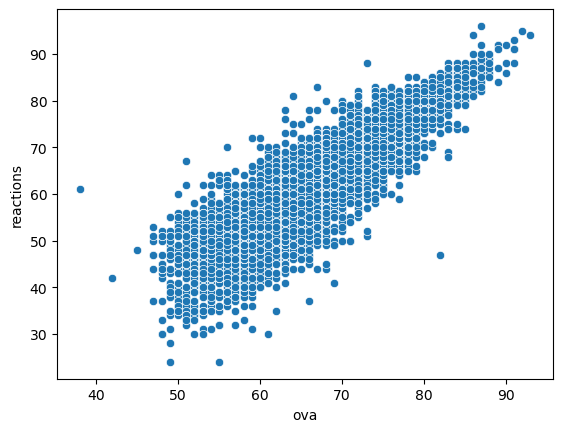

In [29]:
sns.scatterplot(x = full_data['ova'], y = full_data['reactions'])
plt.show()

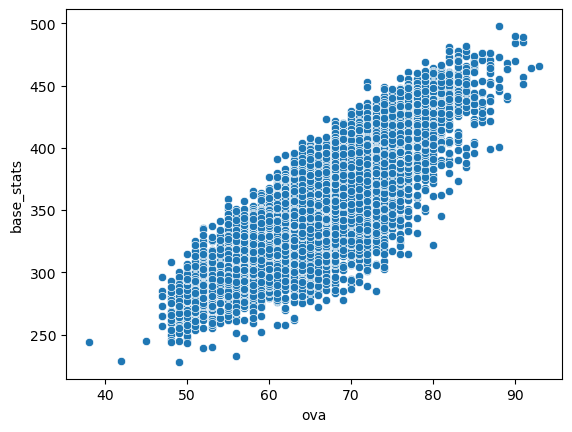

In [30]:
sns.scatterplot(x = full_data['ova'], y = full_data['base_stats'])
plt.show()

In [31]:
'''MEDIAN CORR
composure           0.703798
pas                 0.700421
dri                 0.643046
value               0.632681
total_stats         0.604432
power               0.544295
phy                 0.543247
shot_power          0.535906
age                 0.519422
vision              0.508012
'''

'MEDIAN CORR\ncomposure           0.703798\npas                 0.700421\ndri                 0.643046\nvalue               0.632681\ntotal_stats         0.604432\npower               0.544295\nphy                 0.543247\nshot_power          0.535906\nage                 0.519422\nvision              0.508012\n'

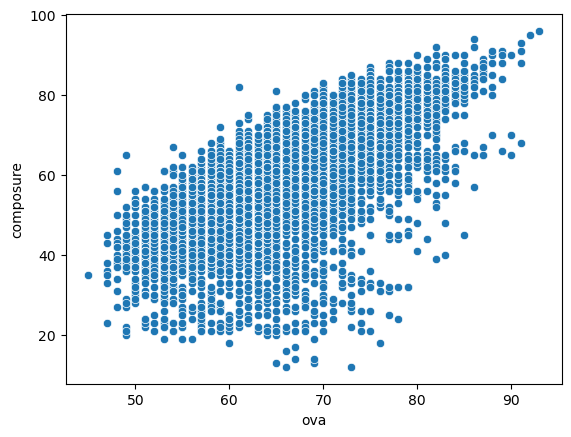

In [32]:
sns.scatterplot(x = full_data['ova'], y = full_data['composure'])
plt.show()

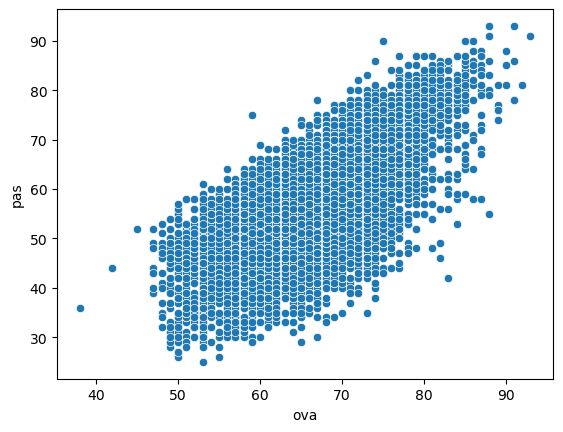

In [33]:
sns.scatterplot(x = full_data['ova'], y = full_data['pas'])
plt.show()

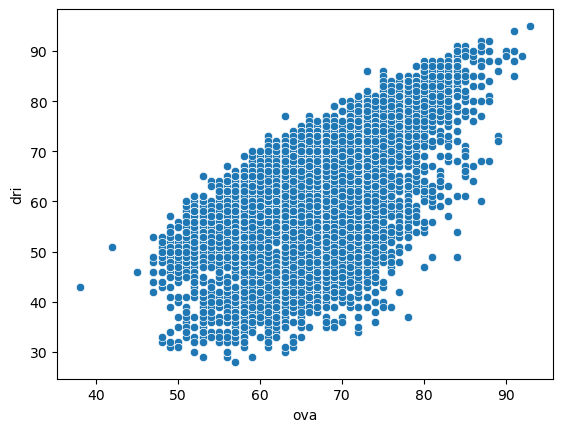

In [34]:
sns.scatterplot(x = full_data['ova'], y = full_data['dri'])
plt.show()

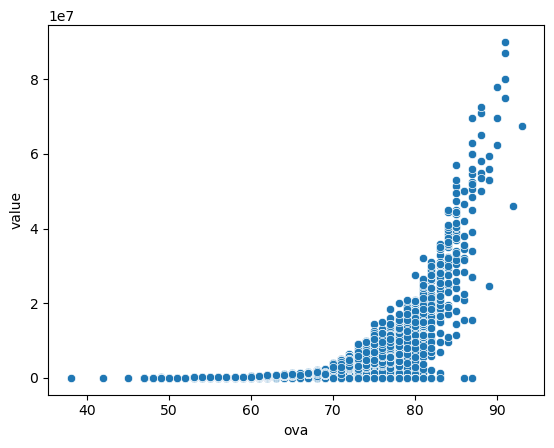

In [35]:
sns.scatterplot(x = full_data['ova'], y = full_data['value'])
plt.show()

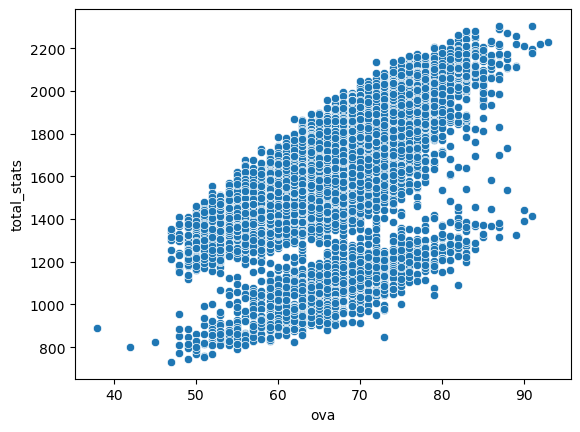

In [36]:
sns.scatterplot(x = full_data['ova'], y = full_data['total_stats'])
plt.show()

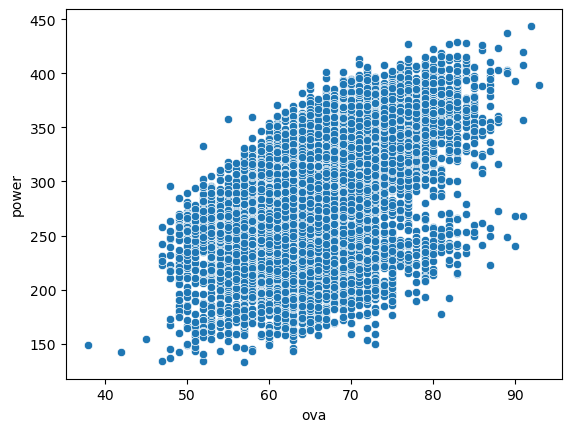

In [37]:
sns.scatterplot(x = full_data['ova'], y = full_data['power'])
plt.show()

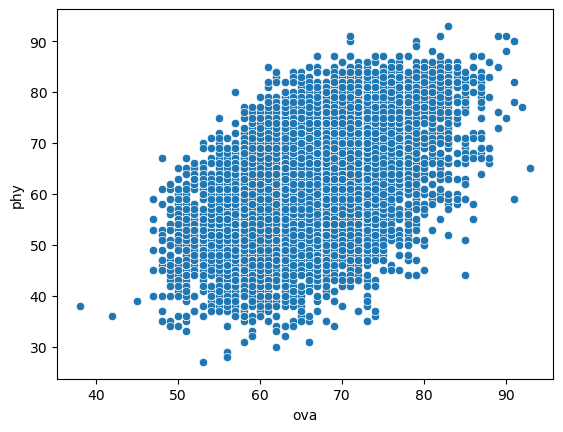

In [38]:
sns.scatterplot(x = full_data['ova'], y = full_data['phy'])
plt.show()

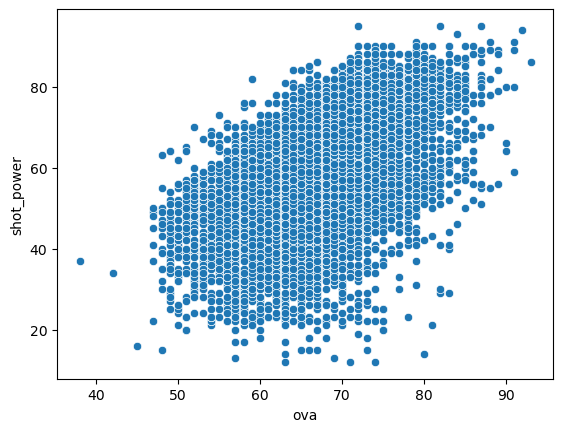

In [39]:
sns.scatterplot(x = full_data['ova'], y = full_data['shot_power'])
plt.show()

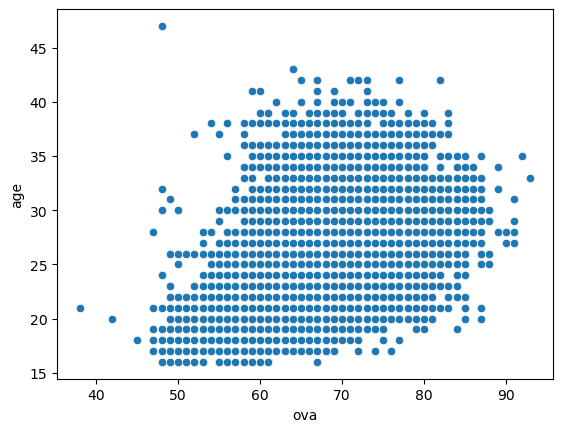

In [40]:
sns.scatterplot(x = full_data['ova'], y = full_data['age'])
plt.show()

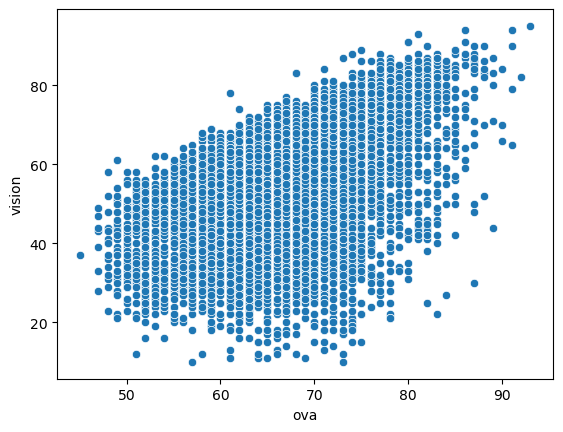

In [41]:
sns.scatterplot(x = full_data['ova'], y = full_data['vision'])
plt.show()

# Reduce noise from the dataframe

In order to reduce noise we can change the columns in df_metrics by grouping players according to their OVA value and assigning the mean values for different variables to these groups of players

In [42]:
df_metrics = df_metrics.dropna()
df_metrics.isna().sum().sum()

0

In [43]:
df_metrics.duplicated().sum()

0

In [44]:
df_metrics['reactions'] = df_metrics.groupby('ova')['reactions'].transform('mean')
df_metrics['base_stats']= df_metrics.groupby('ova')['base_stats'].transform('mean')
df_metrics['composure']= df_metrics.groupby('ova')['composure'].transform('mean')
df_metrics['pas']= df_metrics.groupby('ova')['pas'].transform('mean')
df_metrics['dri']= df_metrics.groupby('ova')['dri'].transform('mean')
df_metrics['value']= df_metrics.groupby('ova')['value'].transform('mean')
df_metrics['total_stats']= df_metrics.groupby('ova')['total_stats'].transform('mean')
df_metrics['power']= df_metrics.groupby('ova')['power'].transform('mean')
df_metrics['phy']= df_metrics.groupby('ova')['phy'].transform('mean')
df_metrics['shot_power']= df_metrics.groupby('ova')['shot_power'].transform('mean')
df_metrics['age']= df_metrics.groupby('ova')['age'].transform('mean')
df_metrics['vision']= df_metrics.groupby('ova')['vision'].transform('mean')

df_metrics

,ova,age,growth,value,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,ir,pac,sho,pas,dri,def,phy,hits
0,71,27.276630,0,2.376749e+06,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,67.823529,72.0,323.982512,64.933227,54.0,64,60,71,362,71,71.0,72.0,59.906200,75,65.799682,153,70,43,40.0,56,9,12,13,11,11,1744.054054,381.240064,4.0,3.0,1.0,53,69,63.022258,67.494436,58,69.039746,4.0
2,81,27.679487,0,1.628077e+07,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,79.410256,75.0,346.153846,72.589744,40.0,58,62,70,370,58,70.0,78.0,69.897436,71,76.423077,181,68,57,56.0,45,6,13,6,13,7,1917.294872,432.987179,4.0,4.0,4.0,58,70,73.794872,78.243590,63,74.102564,149.0
3,77,28.608163,0,7.991429e+06,342,80,66,43,84,69.0,406,77,83.0,80,85,81,308,54,36,67.0,74.738776,81.0,339.967347,70.963265,72.0,51,64,76,384,87,62.0,65.0,66.734694,85,72.722449,190,65,65,60.0,47,7,11,7,14,8,1870.110204,411.493878,4.0,4.0,2.0,44,71,69.926531,73.771429,62,72.032653,7.0
8,80,28.581197,0,1.245299e+07,380,68,84,63,81,84.0,374,82,82.0,63,63,84,380,69,68,77.0,78.222222,83.0,341.777778,72.341880,62.0,72,68,80,343,67,34.0,85.0,70.350427,75,75.094017,71,28,26,17.0,63,11,9,13,14,16,1901.914530,423.256410,4.0,3.0,2.0,68,82,73.444444,76.341880,31,73.136752,10.0
19,82,28.839286,0,1.928929e+07,95,13,15,13,37,17.0,122,26,20.0,13,35,28,251,37,30,55.0,80.446429,49.0,330.357143,70.875000,71.0,34,69,13,150,38,28.0,12.0,68.571429,22,74.357143,35,13,11,11.0,396,77,76,74,91,78,1828.839286,438.910714,2.0,1.0,4.0,77,76,76.357143,79.928571,33,75.446429,154.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13695,58,20.804636,19,2.121689e+05,238,47,45,40,62,44.0,269,63,44.0,42,55,65,355,77,73,68.0,52.639073,85.0,262.056291,49.993377,62.0,51,45,37,219,45,25.0,47.0,46.751656,45,49.056291,119,42,38,39.0,56,12,9,12,10,13,1421.115894,315.175497,2.0,3.0,1.0,75,44,49.327815,56.165563,37,56.298013,9.0
13696,54,19.758621,14,1.228879e+05,223,30,55,52,43,43.0,199,50,38.0,30,29,52,303,66,67,62.0,48.344828,58.0,242.698276,45.931034,67.0,57,65,48,221,46,22.0,53.0,42.948276,55,44.051724,65,24,19,22.0,50,7,11,6,12,14,1303.336207,297.474138,3.0,2.0,1.0,67,53,46.387931,52.698276,25,52.353448,3.0
13697,60,21.381696,12,3.322768e+05,67,12,8,16,23,8.0,78,9,11.0,15,29,14,173,22,26,30.0,54.589286,50.0,271.783482,52.642857,60.0,30,55,7,122,21,7.0,6.0,49.133929,33,51.212054,81,50,15,16.0,305,60,61,60,59,65,1474.305804,327.886161,2.0,1.0,1.0,60,61,52.145089,59.205357,24,57.611607,9.0
13698,56,20.082126,10,1.580918e+05,248,50,43,50,64,41.0,264,57,42.0,50,61,54,298,61,63,52.0,50.898551,68.0,254.734300,47.434783,62.0,53,57,48,259,51,50.0,55.0,45.227053,50,46.927536,132,34,42,56.0,57,12,15,7,12,11,1386.231884,304.942029,3.0,2.0,1.0,62,46,46.922705,53.729469,43,54.685990,5.0


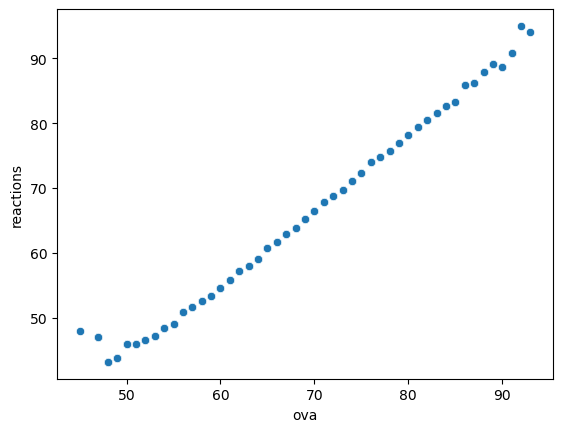

In [45]:
sns.scatterplot(x = df_metrics['ova'], y = df_metrics['reactions'])
plt.show()

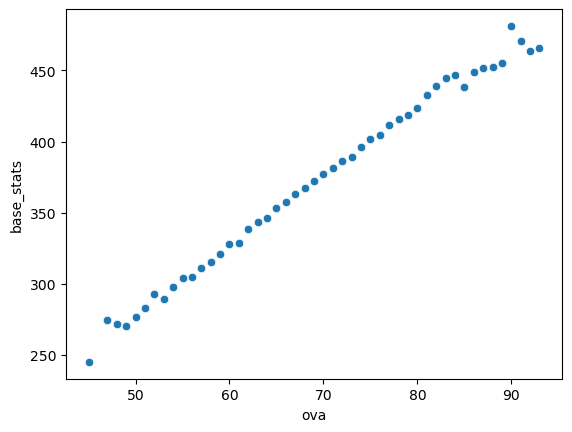

In [46]:
sns.scatterplot(x = df_metrics['ova'], y = df_metrics['base_stats'])
plt.show()

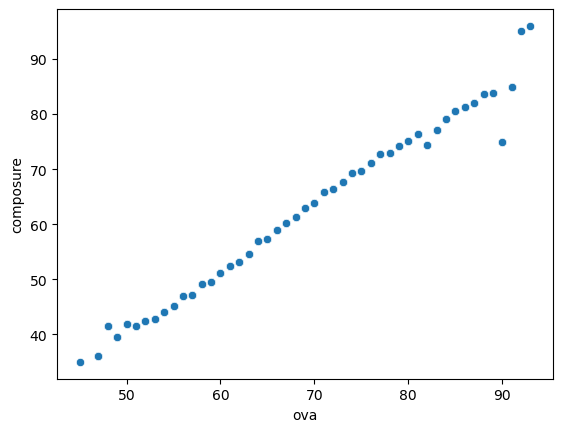

In [47]:
sns.scatterplot(x = df_metrics['ova'], y = df_metrics['composure'])
plt.show()

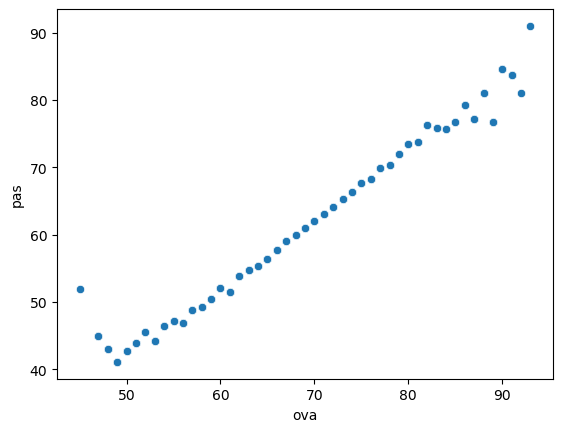

In [48]:
sns.scatterplot(x = df_metrics['ova'], y = df_metrics['pas'])
plt.show()

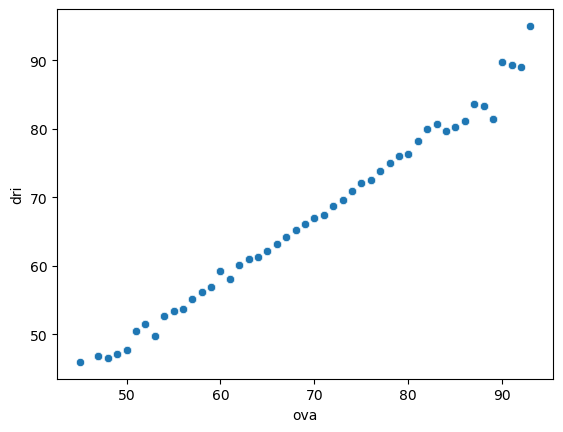

In [49]:
sns.scatterplot(x = df_metrics['ova'], y = df_metrics['dri'])
plt.show()

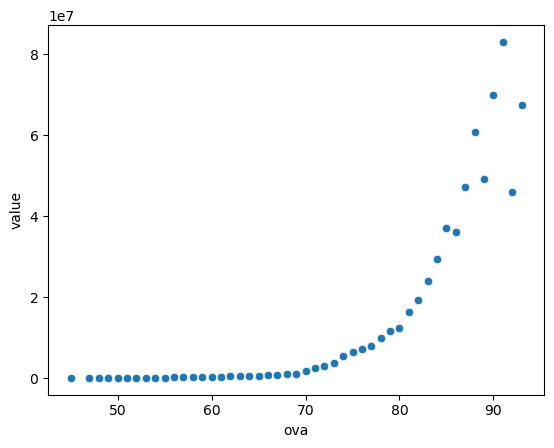

In [50]:
sns.scatterplot(x = df_metrics['ova'], y = df_metrics['value'])
plt.show()

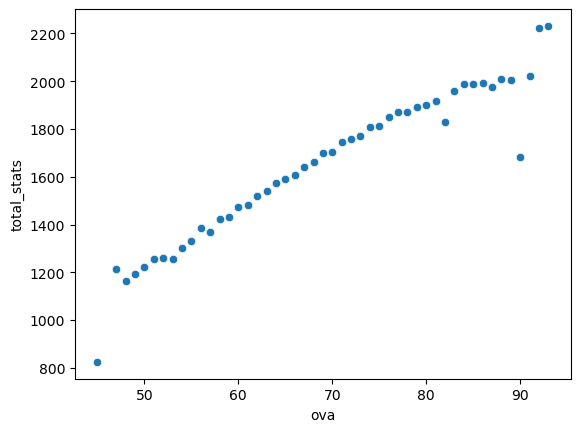

In [51]:
sns.scatterplot(x = df_metrics['ova'], y = df_metrics['total_stats'])
plt.show()

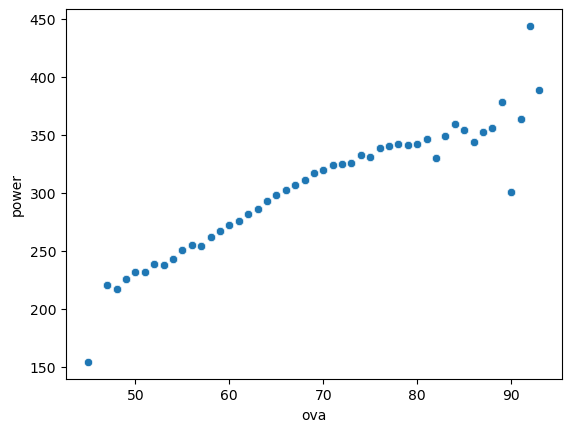

In [52]:
sns.scatterplot(x = df_metrics['ova'], y = df_metrics['power'])
plt.show()

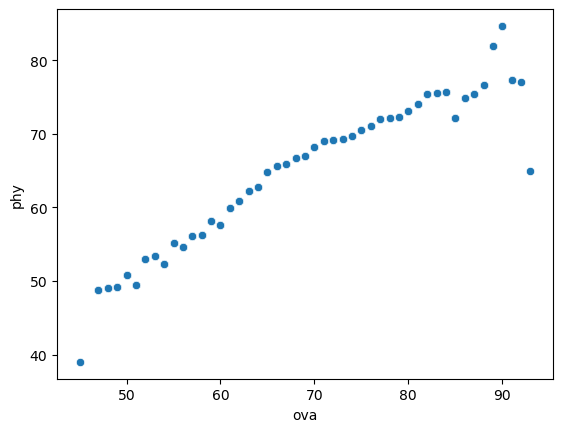

In [53]:
sns.scatterplot(x = df_metrics['ova'], y = df_metrics['phy'])
plt.show()

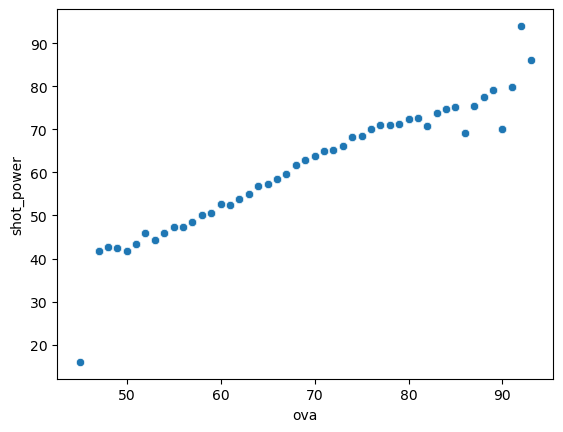

In [54]:
sns.scatterplot(x = df_metrics['ova'], y = df_metrics['shot_power'])
plt.show()

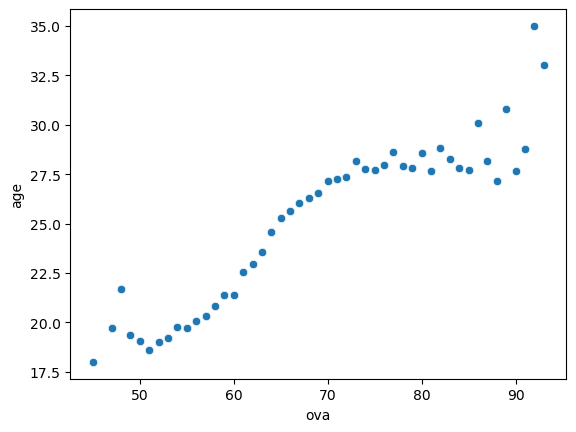

In [55]:
sns.scatterplot(x = df_metrics['ova'], y = df_metrics['age'])
plt.show()

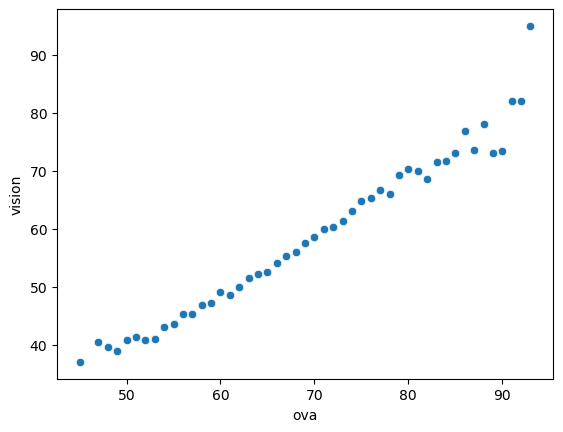

In [56]:
sns.scatterplot(x = df_metrics['ova'], y = df_metrics['vision'])
plt.show()

In [57]:
Y = df_metrics['ova']
X = df_metrics[['reactions','base_stats','composure', 'pas','dri','value','total_stats', 'power','phy','shot_power','age', 'vision']]
X = sm.add_constant(X)

model = sm.OLS(Y,X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ova   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.085e+06
Date:                Fri, 12 Apr 2024   Prob (F-statistic):               0.00
Time:                        19:01:17   Log-Likelihood:                 5723.4
No. Observations:               13371   AIC:                        -1.142e+04
Df Residuals:                   13358   BIC:                        -1.132e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.4500      0.093     69.204      0.000       6.267       6.633
reactions       0.3213      0.005     63.191      0.000       0.311       0.331
base_stats     -0.0138      0.002     -5.788      0.000      -0.018      -0.009
composure       0.3562      0.005     71.920      0.000       0.347       0.366
pas            -0.1627      0.007    -23.283      0.000      -0.176      -0.149
dri             0.4625      0.006     75.012      0.000       0.450       0.475
value        1.027e-08   8.25e-10     12.449      0.000    8.65e-09    1.19e-08
total_stats     0.0055      0.000     20.070      0.000       0.005       0.006
power          -0.0411      0.001    -28.819      0.000      -0.044      -0.038
phy             0.2613      0.005     50.933      0.000       0.251       0.271
shot_power     -0.0202      0.004     -5.656      0.000      -0.027      -0.013
age            -0.1316      0.005    -26.595      0.000      -0.141      -0.122
vision         -0.0957      0.004    -21.412      0.000      -0.105      -0.087
==============================================================================
Omnibus:                     2308.842   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43492.881
Skew:                          -0.256   Prob(JB):                         0.00
Kurtosis:                      11.821   Cond. No.                     3.87e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
Y = df_metrics['ova']
X = df_metrics[['reactions','base_stats','composure', 'pas','dri','value','total_stats', 'power','phy','shot_power','age', 'vision']]

lm = linear_model.LinearRegression()
lm = lm.fit(X,Y)

lm.score(X,Y)

predictions = lm.predict(X)
predictions

print("R2 value is = ",round(r2_score(Y, predictions),2))
print("The intercept of the model is = ",lm.intercept_)
print("The coefficients of the model are = ",lm.coef_)

mse = mean_squared_error (Y, predictions)
mae = mean_absolute_error (Y, predictions)
print("The mse of the model is = ",mse)
print("The root mse of the model is = ",np.sqrt(mse))
print("The mean absolute error of the model is = ",mae)

R2 value is =  1.0
The intercept of the model is =  6.449964498199016
The coefficients of the model are =  [ 3.21259893e-01 -1.37951022e-02  3.56242908e-01 -1.62688607e-01
  4.62453523e-01  1.02686167e-08  5.54371993e-03 -4.10577351e-02
  2.61257451e-01 -2.02274822e-02 -1.31604419e-01 -9.57398431e-02]
The mse of the model is =  0.024873243524721672
The root mse of the model is =  0.15771253445659186
The mean absolute error of the model is =  0.09416625079311361


In [59]:
# R2 increased to 1!
# RMSE dropped considerably!!!

# process buy_data to be tested later

In [60]:
buy_data['value'] = buy_data['value'].replace({'€': '', ' ': '', 'M': 'e+06', 'K': 'e+03'}, regex=True).astype(float)
buy_data['w/f'] = buy_data['w/f'].replace({'★': ''}, regex=True).astype(float)
buy_data['sm'] = buy_data['sm'].replace({'★': ''}, regex=True).astype(float)
buy_data['ir'] = buy_data['ir'].replace({'★': ''}, regex=True).astype(float)
buy_data['hits'] = buy_data['hits'].replace({'K': 'e+03'}, regex=True).astype(float)

In [61]:
buy_data = buy_data.dropna()
buy_data.isna().sum().sum()

0

In [62]:
buy_data.duplicated().sum()

0

# Create groups of players

In [63]:
df_metrics = full_data[['ova','age','growth','value','attacking','crossing','finishing','heading_accuracy','short_passing','volleys','skill','dribbling','curve','fk_accuracy','long_passing',
 'ball_control','movement','acceleration','sprint_speed','agility','reactions','balance','power','shot_power','jumping', 'stamina','strength','long_shots','mentality','aggression','interceptions','positioning','vision','penalties','composure',
 'defending','marking','standing_tackle','sliding_tackle','goalkeeping','gk_diving','gk_handling','gk_kicking','gk_positioning','gk_reflexes','total_stats','base_stats','w/f','sm','ir','pac','sho','pas','dri','def','phy','hits']]
df_metrics

,ova,age,growth,value,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,ir,pac,sho,pas,dri,def,phy,hits
0,71,37,0,600000.0,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4.0,3.0,1.0,53,69,73,69,58,63,4.0
1,71,33,0,1100000.0,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4.0,4.0,2.0,45,68,76,77,36,52,11.0
2,81,36,0,5500000.0,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4.0,4.0,4.0,58,70,85,85,63,59,149.0
3,77,38,0,2800000.0,342,80,66,43,84,69.0,406,77,83.0,80,85,81,308,54,36,67.0,70,81.0,340,77,72.0,51,64,76,384,87,62.0,65.0,85.0,85,80.0,190,65,65,60.0,47,7,11,7,14,8,2017,403,4.0,4.0,2.0,44,71,83,77,62,66,7.0
4,78,39,0,1000.0,380,90,70,60,85,75.0,402,77,87.0,78,81,79,337,59,60,72.0,76,70.0,310,71,59.0,48,61,71,358,60,47.0,78.0,83.0,90,NaN,120,26,43,51.0,32,10,5,7,5,5,1939,392,2.0,3.0,3.0,60,72,85,77,41,57,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13695,58,18,19,250000.0,238,47,45,40,62,44.0,269,63,44.0,42,55,65,355,77,73,68.0,52,85.0,242,47,62.0,51,45,37,219,45,25.0,47.0,57.0,45,55.0,119,42,38,39.0,56,12,9,12,10,13,1498,323,2.0,3.0,1.0,75,44,55,65,37,47,9.0
13696,54,19,14,150000.0,223,30,55,52,43,43.0,199,50,38.0,30,29,52,303,66,67,62.0,50,58.0,290,53,67.0,57,65,48,221,46,22.0,53.0,45.0,55,50.0,65,24,19,22.0,50,7,11,6,12,14,1351,294,3.0,2.0,1.0,67,53,38,52,25,59,3.0
13697,60,19,12,300000.0,67,12,8,16,23,8.0,78,9,11.0,15,29,14,173,22,26,30.0,45,50.0,197,45,60.0,30,55,7,122,21,7.0,6.0,55.0,33,40.0,81,50,15,16.0,305,60,61,60,59,65,1023,329,2.0,1.0,1.0,60,61,60,65,24,59,9.0
13698,56,18,10,130000.0,248,50,43,50,64,41.0,264,57,42.0,50,61,54,298,61,63,52.0,54,68.0,271,51,62.0,53,57,48,259,51,50.0,55.0,53.0,50,46.0,132,34,42,56.0,57,12,15,7,12,11,1529,319,3.0,2.0,1.0,62,46,57,56,43,55,5.0


In [64]:
df_metrics = df_metrics.dropna()
df_metrics.isna().sum().sum()

0

In [65]:
df_metrics.duplicated().sum()

0

      count       mean       std   min   25%   50%   75%   max
bp                                                            
CAM  1796.0  66.801782  7.198013  47.0  62.0  67.0  72.0  91.0
CB   2553.0  66.731297  6.654178  48.0  62.0  67.0  71.0  89.0
CDM   988.0  68.273279  6.201629  47.0  64.0  68.0  73.0  89.0
CF     68.0  73.455882  6.237666  56.0  69.0  73.5  78.0  89.0
CM    783.0  68.476373  6.976331  38.0  64.0  69.0  73.0  88.0
GK   1281.0  66.632319  7.840690  45.0  62.0  67.0  72.0  91.0
LB    736.0  66.951087  6.719070  47.0  62.0  67.0  72.0  86.0
LM    657.0  66.954338  6.487867  48.0  63.0  67.0  71.0  87.0
LW    171.0  68.064327  6.679333  51.0  64.0  67.0  73.0  91.0
LWB   199.0  67.653266  6.120456  50.0  64.0  68.0  72.0  85.0
RB    721.0  67.644938  6.662197  48.0  63.0  68.0  72.0  87.0
RM   1135.0  65.585022  6.495796  42.0  61.0  66.0  70.0  85.0
RW    269.0  68.275093  6.373816  49.0  65.0  68.0  72.0  93.0
RWB   196.0  67.882653  5.587670  57.0  64.0  67.0  72.

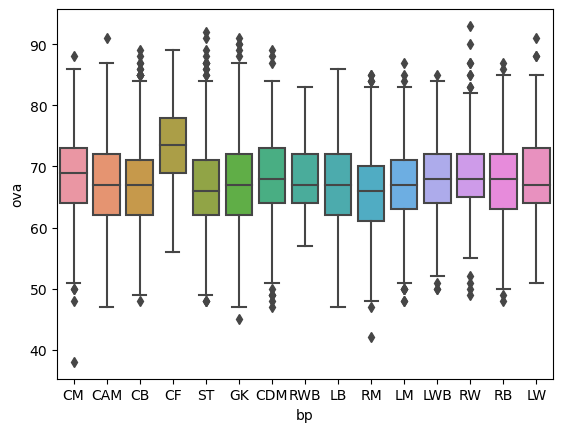

In [66]:
ax = sns.boxplot(y='ova', x='bp', data=full_data)
stats = full_data.groupby('bp')['ova'].describe()

# Display the statistics
print(stats)
plt.show()

In [67]:
# include players' positions in the df_metrics
df_metrics ['bp'] = full_data ['bp']

In [68]:
bp_dummies = pd.get_dummies(data=df_metrics, columns=['bp'])
bp_dummies = bp_dummies.astype(float)
df_metrics = pd.concat([bp_dummies], axis=1)
df_metrics

,ova,age,growth,value,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,ir,pac,sho,pas,dri,def,phy,hits,bp_CAM,bp_CB,bp_CDM,bp_CF,bp_CM,bp_GK,bp_LB,bp_LM,bp_LW,bp_LWB,bp_RB,bp_RM,bp_RW,bp_RWB,bp_ST
0,71.0,37.0,0.0,600000.0,337.0,68.0,64.0,61.0,76.0,68.0,369.0,69.0,79.0,79.0,71.0,71.0,305.0,56.0,50.0,62.0,65.0,72.0,324.0,75.0,54.0,64.0,60.0,71.0,362.0,71.0,71.0,72.0,73.0,75.0,79.0,153.0,70.0,43.0,40.0,56.0,9.0,12.0,13.0,11.0,11.0,1906.0,385.0,4.0,3.0,1.0,53.0,69.0,73.0,69.0,58.0,63.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,81.0,36.0,0.0,5500000.0,367.0,75.0,69.0,54.0,90.0,79.0,408.0,85.0,80.0,70.0,83.0,90.0,346.0,61.0,56.0,79.0,75.0,75.0,297.0,67.0,40.0,58.0,62.0,70.0,370.0,58.0,70.0,78.0,93.0,71.0,89.0,181.0,68.0,57.0,56.0,45.0,6.0,13.0,6.0,13.0,7.0,2014.0,420.0,4.0,4.0,4.0,58.0,70.0,85.0,85.0,63.0,59.0,149.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,77.0,38.0,0.0,2800000.0,342.0,80.0,66.0,43.0,84.0,69.0,406.0,77.0,83.0,80.0,85.0,81.0,308.0,54.0,36.0,67.0,70.0,81.0,340.0,77.0,72.0,51.0,64.0,76.0,384.0,87.0,62.0,65.0,85.0,85.0,80.0,190.0,65.0,65.0,60.0,47.0,7.0,11.0,7.0,14.0,8.0,2017.0,403.0,4.0,4.0,2.0,44.0,71.0,83.0,77.0,62.0,66.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,80.0,35.0,0.0,5500000.0,380.0,68.0,84.0,63.0,81.0,84.0,374.0,82.0,82.0,63.0,63.0,84.0,380.0,69.0,68.0,77.0,83.0,83.0,363.0,81.0,62.0,72.0,68.0,80.0,343.0,67.0,34.0,85.0,82.0,75.0,86.0,71.0,28.0,26.0,17.0,63.0,11.0,9.0,13.0,14.0,16.0,1974.0,407.0,4.0,3.0,2.0,68.0,82.0,75.0,82.0,31.0,69.0,10.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,82.0,42.0,0.0,2200000.0,95.0,13.0,15.0,13.0,37.0,17.0,122.0,26.0,20.0,13.0,35.0,28.0,251.0,37.0,30.0,55.0,80.0,49.0,243.0,56.0,71.0,34.0,69.0,13.0,150.0,38.0,28.0,12.0,50.0,22.0,70.0,35.0,13.0,11.0,11.0,396.0,77.0,76.0,74.0,91.0,78.0,1292.0,429.0,2.0,1.0,4.0,77.0,76.0,74.0,78.0,33.0,91.0,154.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13695,58.0,18.0,19.0,250000.0,238.0,47.0,45.0,40.0,62.0,44.0,269.0,63.0,44.0,42.0,55.0,65.0,355.0,77.0,73.0,68.0,52.0,85.0,242.0,47.0,62.0,51.0,45.0,37.0,219.0,45.0,25.0,47.0,57.0,45.0,55.0,119.0,42.0,38.0,39.0,56.0,12.0,9.0,12.0,10.0,13.0,1498.0,323.0,2.0,3.0,1.0,75.0,44.0,55.0,65.0,37.0,47.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13696,54.0,19.0,14.0,150000.0,223.0,30.0,55.0,52.0,43.0,43.0,199.0,50.0,38.0,30.0,29.0,52.0,303.0,66.0,67.0,62.0,50.0,58.0,290.0,53.0,67.0,57.0,65.0,48.0,221.0,46.0,22.0,53.0,45.0,55.0,50.0,65.0,24.0,19.0,22.0,50.0,7.0,11.0,6.0,12.0,14.0,1351.0,294.0,3.0,2.0,1.0,67.0,53.0,38.0,52.0,25.0,59.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13697,60.0,19.0,12.0,300000.0,67.0,12.0,8.0,16.0,23.0,8.0,78.0,9.0,11.0,15.0,29.0,14.0,173.0,22.0,26.0,30.0,45.0,50.0,197.0,45.0,60.0,30.0,55.0,7.0,122.0,21.0,7.0,6.0,55.0,33.0,40.0,81.0,50.0,15.0,16.0,305.0,60.0,61.0,60.0,59.0,65.0,1023.0,329.0,2.0,1.0,1.0,60.0,61.0,60.0,65.0,24.0,59.0,9.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13698,56.0,18.0,10.0,130000.0,248.0,50.0,43.0,50.0,64.0,41.0,264.0,57.0,42.0,50.0,61.0,54.0,298.0,61.0,63.0,52.0,54.0,68.0,271.0,51.0,62.0,53.0,57.0,48.0,259.0,51.0,50.0,55.0,53.0,50.0,46.0,132.0,34.0,42.0,56.0,57.0,12.0,15.0,7.0,12.0,11.0,1529.0,319

# Create individual models for each Position

Models will be trained using df_metrics extracted from full_data and then applied to buy_data so that we can predict the Overall Performance (OVA) of the players.

We will group players, discover variables with strong correlation with OVA, train the model using those variables and then test and predict OVAs for the groups of players in our incomplete dataset (buy_data).

# CAM - Center Attacking Midfielder

In [69]:
# Filter CAM and create new df
grouped_CAM = df_metrics.drop(df_metrics[['bp_CB', 'bp_CDM', 'bp_CF', 'bp_CM', 'bp_GK', 'bp_LB', 'bp_LM', 'bp_LW',
       'bp_LWB', 'bp_RB', 'bp_RM', 'bp_RW', 'bp_RWB', 'bp_ST']], axis=1)
true_CAM = '1' 
mask = grouped_CAM['bp_CAM'] == 1
grouped_CAM = grouped_CAM[mask]
grouped_CAM

,ova,age,growth,value,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,ir,pac,sho,pas,dri,def,phy,hits,bp_CAM
2,81.0,36.0,0.0,5500000.0,367.0,75.0,69.0,54.0,90.0,79.0,408.0,85.0,80.0,70.0,83.0,90.0,346.0,61.0,56.0,79.0,75.0,75.0,297.0,67.0,40.0,58.0,62.0,70.0,370.0,58.0,70.0,78.0,93.0,71.0,89.0,181.0,68.0,57.0,56.0,45.0,6.0,13.0,6.0,13.0,7.0,2014.0,420.0,4.0,4.0,4.0,58.0,70.0,85.0,85.0,63.0,59.0,149.0,1.0
22,80.0,39.0,0.0,1500000.0,386.0,83.0,81.0,42.0,90.0,90.0,423.0,82.0,75.0,90.0,85.0,91.0,275.0,43.0,34.0,59.0,79.0,60.0,337.0,88.0,34.0,54.0,75.0,86.0,350.0,69.0,24.0,80.0,91.0,86.0,85.0,48.0,14.0,24.0,10.0,53.0,5.0,12.0,14.0,11.0,11.0,1872.0,378.0,5.0,3.0,3.0,38.0,84.0,87.0,81.0,21.0,67.0,18.0,1.0
36,68.0,34.0,0.0,425000.0,301.0,69.0,61.0,36.0,65.0,70.0,326.0,68.0,64.0,70.0,57.0,67.0,381.0,77.0,76.0,75.0,70.0,83.0,310.0,73.0,75.0,55.0,33.0,74.0,277.0,40.0,39.0,66.0,68.0,64.0,70.0,89.0,29.0,27.0,33.0,60.0,14.0,9.0,14.0,11.0,12.0,1744.0,351.0,3.0,3.0,2.0,76.0,67.0,65.0,69.0,32.0,42.0,3.0,1.0
66,76.0,33.0,0.0,3400000.0,362.0,85.0,70.0,42.0,86.0,79.0,411.0,85.0,79.0,78.0,80.0,89.0,269.0,42.0,34.0,45.0,74.0,74.0,274.0,70.0,34.0,34.0,60.0,76.0,282.0,28.0,14.0,76.0,86.0,78.0,84.0,37.0,11.0,14.0,12.0,41.0,4.0,10.0,6.0,13.0,8.0,1676.0,337.0,4.0,3.0,3.0,38.0,72.0,84.0,81.0,16.0,46.0,6.0,1.0
68,78.0,34.0,0.0,5500000.0,387.0,74.0,79.0,74.0,76.0,84.0,403.0,80.0,84.0,81.0,72.0,86.0,317.0,59.0,49.0,73.0,79.0,57.0,326.0,80.0,50.0,52.0,67.0,77.0,321.0,41.0,31.0,85.0,80.0,84.0,85.0,83.0,30.0,32.0,21.0,39.0,9.0,10.0,5.0,7.0,8.0,1876.0,381.0,3.0,4.0,3.0,54.0,80.0,76.0,80.0,34.0,57.0,19.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13679,57.0,18.0,17.0,210000.0,237.0,45.0,55.0,37.0,66.0,34.0,290.0,62.0,52.0,48.0,64.0,64.0,302.0,62.0,65.0,63.0,51.0,61.0,243.0,51.0,61.0,41.0,46.0,44.0,209.0,31.0,31.0,45.0,55.0,47.0,51.0,140.0,28.0,58.0,54.0,47.0,5.0,8.0,6.0,15.0,13.0,1468.0,318.0,3.0,2.0,1.0,64.0,50.0,58.0,62.0,41.0,43.0,5.0,1.0
13689,63.0,18.0,13.0,650000.0,292.0,60.0,52.0,57.0,67.0,56.0,308.0,66.0,59.0,53.0,65.0,65.0,340.0,76.0,71.0,73.0,58.0,62.0,308.0,64.0,64.0,60.0,65.0,55.0,297.0,70.0,52.0,55.0,62.0,58.0,61.0,178.0,56.0,62.0,60.0,50.0,11.0,13.0,10.0,6.0,10.0,1773.0,381.0,3.0,2.0,1.0,73.0,56.0,63.0,66.0,58.0,65.0,11.0,1.0
13693,52.0,18.0,15.0,100000.0,226.0,44.0,44.0,43.0,53.0,42.0,265.0,54.0,53.0,47.0,55.0,56.0,309.0,67.0,62.0,60.0,52.0,68.0,265.0,57.0,58.0,53.0,56.0,41.0,228.0,43.0,38.0,47.0,53.0,47.0,52.0,141.0,45.0,49.0,47.0,52.0,11.0,10.0,13.0,11.0,7.0,1486.0,315.0,2.0,2.0,1.0,64.0,46.0,51.0,56.0,45.0,53.0,6.0,1.0
13694,51.0,17.0,19.0,70000.0,212.0,37.0,38.0,46.0,57.0,34.0,236.0,50.0,40.0,40.0,53.0,53.0,324.0,63.0,65.0,60.0,51.0,85.0,235.0,55.0,56.0,56.0,27.0,41.0,239.0,54.0,42.0,54.0,47.0,42.0,48.0,127.0,36.0,46.0,45.0,60.0,13.0,14.0,14.0,9.0,10.0,1433.0,293.0,2.0,2.0,1.0,64.0,43.0,49.0,54.0,42.0,41.0,3.0,1.0


In [70]:
# correlations for CAM players
correlations_matrix = grouped_CAM.corr()['ova']
correlations_matrix
correlations_matrix.sort_values(ascending=False)

ova                 1.000000
dri                 0.941225
ball_control        0.938390
pas                 0.921017
dribbling           0.912752
skill               0.912625
attacking           0.900738
total_stats         0.898843
vision              0.896101
sho                 0.895907
base_stats          0.885353
positioning         0.878106
reactions           0.871894
short_passing       0.870878
crossing            0.840883
finishing           0.835563
long_shots          0.825708
composure           0.816977
curve               0.775046
shot_power          0.771050
mentality           0.770791
volleys             0.742901
power               0.720084
long_passing        0.718694
sm                  0.683143
fk_accuracy         0.680438
value               0.665748
penalties           0.639137
movement            0.631838
age                 0.522826
stamina             0.508589
agility             0.507111
phy                 0.477087
ir                  0.451877
acceleration  

In [71]:
correlations_matrix.sort_values(ascending=False).keys()

Index(['ova', 'dri', 'ball_control', 'pas', 'dribbling', 'skill', 'attacking',
       'total_stats', 'vision', 'sho', 'base_stats', 'positioning',
       'reactions', 'short_passing', 'crossing', 'finishing', 'long_shots',
       'composure', 'curve', 'shot_power', 'mentality', 'volleys', 'power',
       'long_passing', 'sm', 'fk_accuracy', 'value', 'penalties', 'movement',
       'age', 'stamina', 'agility', 'phy', 'ir', 'acceleration', 'pac',
       'heading_accuracy', 'aggression', 'strength', 'sprint_speed', 'w/f',
       'hits', 'balance', 'interceptions', 'def', 'marking', 'standing_tackle',
       'defending', 'jumping', 'goalkeeping', 'gk_kicking', 'gk_handling',
       'gk_positioning', 'gk_reflexes', 'gk_diving', 'sliding_tackle',
       'growth', 'bp_CAM'],
      dtype='object')

In [72]:
# update df 
grouped_CAM = grouped_CAM[['ova', 'dri', 'ball_control', 'pas', 'dribbling', 'skill', 'attacking',
       'total_stats', 'sho', 'vision', 'base_stats', 'positioning',
       'reactions', 'short_passing', 'crossing', 'finishing', 'long_shots',
       'composure']]

In [73]:
# reduce noice by getting the mean values for the strong correlated variables
# include all except OVA
columns_to_mean =['dri', 'ball_control', 'pas', 'dribbling', 'skill', 'attacking',
       'total_stats', 'sho', 'vision', 'base_stats', 'positioning',
       'reactions', 'short_passing', 'crossing', 'finishing', 'long_shots',
       'composure']
grouped_CAM[columns_to_mean] = grouped_CAM.groupby('ova')[columns_to_mean].transform(lambda x: x.mean())
grouped_CAM

,ova,dri,ball_control,pas,dribbling,skill,attacking,total_stats,sho,vision,base_stats,positioning,reactions,short_passing,crossing,finishing,long_shots,composure
2,81.0,84.181818,85.272727,79.090909,84.818182,396.090909,359.818182,2032.000000,75.363636,81.909091,428.000000,79.727273,79.818182,82.636364,74.181818,75.181818,75.636364,81.545455
22,80.0,82.846154,83.269231,78.384615,83.461538,391.500000,353.461538,1997.000000,75.153846,80.961538,421.923077,78.153846,79.538462,80.538462,75.615385,74.000000,76.576923,80.076923
36,68.0,71.115385,70.846154,66.307692,70.820513,331.564103,298.871795,1760.282051,63.192308,68.166667,371.807692,64.807692,64.217949,68.782051,63.410256,61.846154,65.051282,64.076923
66,76.0,78.479167,78.916667,74.479167,78.687500,370.187500,342.104167,1938.541667,71.750000,76.229167,407.125000,73.895833,74.520833,77.437500,71.729167,70.458333,73.583333,74.395833
68,78.0,80.875000,81.083333,75.583333,81.333333,382.083333,347.958333,1986.375000,73.666667,77.875000,417.875000,75.000000,75.625000,77.541667,72.041667,71.875000,75.958333,77.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13679,57.0,60.971429,60.714286,55.571429,59.914286,273.485714,242.685714,1521.600000,49.200000,57.628571,322.114286,51.285714,52.942857,61.400000,46.114286,48.000000,47.571429,54.571429
13689,63.0,66.627907,66.244186,60.767442,65.895349,302.813953,273.290698,1653.232558,56.860465,61.755814,351.488372,57.930233,57.709302,65.244186,54.976744,55.674419,57.081395,59.116279
13693,52.0,55.928571,55.142857,49.785714,54.500000,247.071429,221.071429,1438.071429,44.785714,51.357143,306.785714,48.571429,49.785714,55.071429,41.357143,42.500000,43.214286,49.642857
13694,51.0,55.066667,53.333333,50.666667,53.066667,242.200000,221.200000,1410.400000,42.666667,49.066667,297.200000,48.600000,49.600000,57.933333,41.000000,40.800000,38.000000,48.400000


In [74]:
# First analysis
Y = grouped_CAM['ova']
X = grouped_CAM.drop(['ova'], axis=1)
model = sm.OLS(Y,X).fit()
model.summary()
# dropping P value increased the error

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    ova   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.717e+07
Date:                Fri, 12 Apr 2024   Prob (F-statistic):                        0.00
Time:                        19:01:18   Log-Likelihood:                          1363.1
No. Observations:                1750   AIC:                                     -2692.
Df Residuals:                    1733   BIC:                                     -2599.
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
dri               0.4938      0.022     22.599      0.000       0.451       0.537
ball_control      0.1505      0.014     10.700      0.000       0.123       0.178
pas               0.2587      0.045      5.761      0.000       0.171       0.347
dribbling        -0.2692      0.016    -16.661      0.000      -0.301      -0.237
skill            -0.0271      0.004     -7.204      0.000      -0.035      -0.020
attacking         0.0151      0.002      6.748      0.000       0.011       0.019
total_stats      -0.0202      0.001    -18.395      0.000      -0.022      -0.018
sho               0.0706      0.020      3.577      0.000       0.032       0.109
vision            0.0542      0.009      5.932      0.000       0.036       0.072
base_stats        0.1059      0.004     23.643      0.000       0.097       0.115
positioning      -0.0645      0.006    -10.590      0.000      -0.076      -0.053
reactions         0.0852      0.005     17.807      0.000       0.076       0.095
short_passing     0.0107      0.020      0.541      0.589      -0.028       0.049
crossing          0.0538      0.010      5.464      0.000       0.034       0.073
finishing         0.1566      0.012     13.581      0.000       0.134       0.179
long_shots       -0.0194      0.005     -3.601      0.000      -0.030      -0.009
composure         0.0420      0.004      9.765      0.000       0.034       0.050
==============================================================================
Omnibus:                      340.118   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2004.066
Skew:                           0.775   Prob(JB):                         0.00
Kurtosis:                       8.008   Cond. No.                     3.52e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
Y = grouped_CAM['ova']
X = grouped_CAM.drop(['ova'], axis=1)

lm = linear_model.LinearRegression()
lm = lm.fit(X,Y)

lm.score(X,Y)

predictions = lm.predict(X)
predictions

print("R2 value is = ",round(r2_score(Y, predictions),2))
print("The intercept of the model is = ",lm.intercept_)
print("The coefficients of the model are = ",lm.coef_)

mse = mean_squared_error (Y, predictions)
mae = mean_absolute_error (Y, predictions)
print("The mse of the model is = ",mse)
print("The root mse of the model is = ",np.sqrt(mse))
print("The mean absolute error of the model is = ",mae)

R2 value is =  1.0
The intercept of the model is =  -0.8580387023245919
The coefficients of the model are =  [ 0.54845382  0.11535822  0.20481892 -0.29642452 -0.02376279  0.01603068
 -0.02054808  0.08705102  0.07224828  0.11065659 -0.06293792  0.07721797
  0.0371804   0.05727372  0.14193137 -0.02599986  0.04045021]
The mse of the model is =  0.012249059335039789
The root mse of the model is =  0.11067546853318394
The mean absolute error of the model is =  0.0749170872967344


In [76]:
Y = grouped_CAM['ova']
X = grouped_CAM.drop(['ova'], axis=1)
lm = linear_model.LinearRegression()
lm = lm.fit(X,Y)

# filtrar por posição
CAM_buy_data = buy_data[buy_data['bp'] == 'CAM'].dropna()
predictions = lm.predict(CAM_buy_data[['dri', 'ball_control', 'pas', 'dribbling', 'skill', 'attacking',
       'total_stats', 'sho', 'vision', 'base_stats', 'positioning',
       'reactions', 'short_passing', 'crossing', 'finishing', 'long_shots',
       'composure']])
CAM_buy_data['predicted_ova'] = predictions
CAM_buy_data

,id,name,age,nationality,club,bp,position,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender,predicted_ova
128,253123,Leandro Fernandes,19,Netherlands,Fortuna Sittard,CAM,CM,"Fortuna Sittard Jun 30, 2020 On Loan","5'9""",163lbs,Right,12,"Jul 1, 2018","Jun 30, 2020",350000.0,€1K,€0,"Jun 30, 2020 On Loan",276,55,50,56,62,53.0,309,64,58.0,55,65,67,321,69,66,70.0,55,61.0,282,68,62.0,54,57,41,256,51,32.0,53.0,63.0,57,62.0,150,47,49,54.0,52,8,9,12,9,14,1646,346,3.0,3.0,Medium,Medium,1.0,67,52,61,65,46,55,12.0,58+2,58+2,58+2,60+0,60+0,60+0,60+0,60+0,61+2,61+2,61+2,61+2,59+2,59+2,59+2,61+2,54+2,54+2,54+2,54+2,54+2,54+2,51+2,51+2,51+2,54+2,15+2,Male,61.573356
147,231391,João Carvalho,23,Portugal,UD Almería,CAM,CAM LM,"UD Almería Jun 30, 2021 On Loan","5'8""",146lbs,Right,9,"Jul 1, 2018","Jun 30, 2021",3600000.0,€6K,€0,"Jun 30, 2021 On Loan",316,71,64,38,73,70.0,366,74,74.0,70,71,77,379,72,68,85.0,68,86.0,280,72,51.0,54,37,66,284,41,40.0,62.0,72.0,69,73.0,90,21,41,28.0,46,9,7,8,10,12,1761,360,3.0,4.0,Medium,Medium,1.0,70,66,72,76,33,43,57.0,64+2,64+2,64+2,71+0,69+0,69+0,69+0,71+0,71+2,71+2,71+2,70+2,67+2,67+2,67+2,70+2,55+2,53+2,53+2,53+2,55+2,51+2,41+2,41+2,41+2,51+2,16+2,Male,71.935305
181,248572,Pedro Brazão,17,Portugal,FC Lausanne-Sport,CAM,RW CAM,"FC Lausanne-Sport Jun 30, 2021 On Loan","5'8""",137lbs,Left,19,"Apr 20, 2019","Jun 30, 2021",600000.0,€750,€0,"Jun 30, 2021 On Loan",241,46,51,41,56,47.0,315,72,64.0,53,54,72,380,74,76,86.0,57,87.0,264,64,57.0,52,38,53,232,41,26.0,49.0,58.0,58,61.0,119,45,35,39.0,43,9,10,6,11,7,1594,336,3.0,3.0,Medium,Medium,1.0,75,54,54,73,37,43,43.0,57+2,57+2,57+2,62+0,61+0,61+0,61+0,62+0,62+2,62+2,62+2,61+2,56+2,56+2,56+2,61+2,50+2,47+2,47+2,47+2,50+2,49+2,42+2,42+2,42+2,49+2,14+2,Male,61.260918
313,237098,Han Seung Gyu,23,Korea Republic,FC Seoul,CAM,CM LM RM,"FC Seoul Dec 31, 2020 On Loan","5'9""",148lbs,Right,7,"Jan 18, 2019","Dec 31, 2020",750000.0,€3K,€0,"Dec 31, 2020 On Loan",275,63,54,45,71,42.0,313,70,60.0,52,62,69,354,68,85,78.0,67,56.0,323,63,74.0,66,56,64,281,57,43.0,64.0,70.0,47,61.0,134,57,39,38.0,39,5,7,6,13,8,1719,376,4.0,3.0,Medium,Medium,1.0,77,57,66,70,46,60,8.0,62+2,62+2,62+2,68+0,67+0,67+0,67+0,68+0,68+2,68+2,68+2,68+2,65+2,65+2,65+2,68+2,59+2,57+2,57+2,57+2,59+2,57+2,52+2,52+2,52+2,57+2,15+2,Male,67.397879
443,258626,D. Sinani,23,Luxembourg,Waasland-Beveren,CAM,LM RM CAM,"Waasland-Beveren Jun 30, 2021 On Loan","6'1""",161lbs,Left,7,"Jul 1, 2020","Jun 30, 2021",625000.0,€2K,€0,"Jun 30, 2021 On Loan",300,62,62,49,64,63.0,316,64,66.0,65,58,63,335,66,71,65.0,59,74.0,330,70,65.0,62,66,67,269,48,34.0,63.0,66.0,58,58.0,123,38,43,42.0,54,10,14,8,10,12,1727,362,3.0,3.0,Medium,Medium,1.0,69,65,63,64,40,61,15.0,63+2,63+2,63+2,64+0,64+0,64+0,64+0,64+0,64+2,64+2,64+2,63+2,60+2,60+2,60+2,63+2,54+2,52+2,52+2,52+2,54+2,52+2,48+2,48+2,48+2,52+2,17+2,Male,63.666172
567,241162,J. Paintsil,22,Ghana,MKE Ankaragücü,CAM,LW RW,"MKE Ankaragücü Jun 30, 2021 On Loan","5'6""",150lbs,Right,7,"Jul 1, 2018","Jun 30, 2021",2500000.0,€14K,€0,"Jun 30, 2021 On Loan",276,58,61,39,65,53.0,304,75,65.0,38,55,71,416,90,80,92.0,68,86.0,356,65,91.0,78,53,69,255,47,31.0,69.0,60.0,48,69.0,97,32,28,37.0,53,15,10,8,6,14,1757,376,3.0,3.0,High,Medium,1.0,85,63,60,76,32,60,18.0,65+2,65+2,65+2,70+0,69+0,69+0,69+0,70+0,69+2,69+2,69+2,69+2,62+2,62+2,62+2,69+2,56+2,50+2,50+2,50+2,56+2,53+2,43+

# CB - Center Back

In [77]:
# df for CB players
grouped_CB = df_metrics.drop(df_metrics[['bp_CAM', 'bp_CDM', 'bp_CF', 'bp_CM', 'bp_GK', 'bp_LB', 'bp_LM', 'bp_LW',
       'bp_LWB', 'bp_RB', 'bp_RM', 'bp_RW', 'bp_RWB', 'bp_ST']], axis=1)

true_CB = '1' 
mask = grouped_CB['bp_CB'] == 1
grouped_CB = grouped_CB[mask]
grouped_CB

,ova,age,growth,value,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,ir,pac,sho,pas,dri,def,phy,hits,bp_CB
38,66.0,37.0,0.0,45000.0,241.0,53.0,29.0,68.0,59.0,32.0,244.0,46.0,51.0,35.0,56.0,56.0,224.0,28.0,30.0,49.0,63.0,54.0,230.0,49.0,54.0,29.0,75.0,23.0,264.0,62.0,68.0,32.0,55.0,47.0,68.0,200.0,70.0,66.0,64.0,60.0,9.0,14.0,13.0,10.0,14.0,1463.0,296.0,3.0,2.0,2.0,29.0,33.0,55.0,51.0,68.0,60.0,7.0,1.0
39,79.0,38.0,0.0,0.0,303.0,48.0,48.0,81.0,74.0,52.0,271.0,51.0,55.0,36.0,65.0,64.0,261.0,33.0,46.0,48.0,71.0,63.0,269.0,53.0,70.0,32.0,75.0,39.0,305.0,84.0,80.0,51.0,52.0,38.0,79.0,233.0,81.0,80.0,72.0,61.0,16.0,13.0,8.0,12.0,12.0,1703.0,349.0,3.0,2.0,3.0,40.0,47.0,60.0,56.0,80.0,66.0,4.0,1.0
93,76.0,36.0,0.0,1000000.0,293.0,42.0,46.0,83.0,67.0,55.0,244.0,45.0,44.0,31.0,65.0,59.0,228.0,33.0,34.0,42.0,73.0,46.0,307.0,61.0,80.0,50.0,83.0,33.0,296.0,73.0,74.0,38.0,59.0,52.0,82.0,230.0,81.0,73.0,76.0,48.0,14.0,5.0,6.0,15.0,8.0,1646.0,338.0,4.0,2.0,3.0,34.0,47.0,57.0,50.0,77.0,73.0,16.0,1.0
102,72.0,34.0,0.0,950000.0,246.0,38.0,38.0,77.0,57.0,36.0,242.0,38.0,29.0,60.0,64.0,51.0,184.0,30.0,32.0,27.0,63.0,32.0,298.0,70.0,60.0,33.0,84.0,51.0,293.0,82.0,72.0,34.0,54.0,51.0,63.0,216.0,71.0,72.0,73.0,63.0,15.0,12.0,10.0,15.0,11.0,1542.0,314.0,3.0,2.0,2.0,31.0,47.0,52.0,42.0,72.0,70.0,3.0,1.0
106,73.0,39.0,0.0,550000.0,229.0,41.0,25.0,72.0,56.0,35.0,200.0,48.0,25.0,28.0,47.0,52.0,285.0,55.0,35.0,60.0,72.0,63.0,308.0,65.0,92.0,42.0,77.0,32.0,296.0,91.0,70.0,50.0,45.0,40.0,75.0,223.0,76.0,74.0,73.0,57.0,14.0,15.0,7.0,8.0,13.0,1598.0,326.0,3.0,2.0,2.0,44.0,37.0,47.0,52.0,74.0,72.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13681,54.0,18.0,14.0,130000.0,183.0,27.0,23.0,51.0,55.0,27.0,170.0,35.0,26.0,19.0,45.0,45.0,252.0,57.0,63.0,43.0,44.0,45.0,268.0,40.0,72.0,55.0,80.0,21.0,180.0,42.0,49.0,24.0,31.0,34.0,37.0,157.0,55.0,52.0,50.0,56.0,6.0,13.0,8.0,15.0,14.0,1266.0,285.0,2.0,2.0,1.0,60.0,27.0,40.0,40.0,52.0,66.0,3.0,1.0
13682,61.0,19.0,13.0,425000.0,202.0,33.0,25.0,59.0,52.0,33.0,196.0,43.0,27.0,34.0,44.0,48.0,244.0,47.0,49.0,43.0,65.0,40.0,257.0,54.0,52.0,57.0,70.0,24.0,226.0,63.0,62.0,30.0,30.0,41.0,41.0,183.0,59.0,63.0,61.0,43.0,11.0,6.0,7.0,10.0,9.0,1351.0,290.0,2.0,2.0,1.0,48.0,32.0,40.0,45.0,61.0,64.0,7.0,1.0
13686,60.0,18.0,18.0,400000.0,190.0,29.0,25.0,59.0,48.0,29.0,179.0,31.0,34.0,28.0,43.0,43.0,288.0,63.0,66.0,51.0,51.0,57.0,265.0,47.0,70.0,59.0,67.0,22.0,215.0,52.0,58.0,25.0,30.0,50.0,47.0,189.0,56.0,70.0,63.0,56.0,10.0,11.0,13.0,14.0,8.0,1382.0,296.0,2.0,2.0,1.0,65.0,30.0,38.0,39.0,62.0,62.0,7.0,1.0
13687,63.0,19.0,10.0,525000.0,246.0,45.0,35.0,60.0,65.0,41.0,245.0,55.0,37.0,33.0,62.0,58.0,303.0,62.0,67.0,58.0,60.0,56.0,328.0,72.0,63.0,66.0,80.0,47.0,273.0,72.0,61.0,46.0,52.0,42.0,55.0,177.0,58.0,62.0,57.0,51.0,11.0,9.0,6.0,12.0,13.0,1623.0,357.0,3.0,2.0,1.0,65.0,46.0,55.0,57.0,60.0,74.0,8.0,1.0


In [78]:
# correlations for CB players
correlations_matrix = grouped_CB.corr()['ova']
correlations_matrix
correlations_matrix.sort_values(ascending=False)

ova                 1.000000
def                 0.974748
defending           0.960863
standing_tackle     0.927638
interceptions       0.925748
marking             0.924145
sliding_tackle      0.904851
reactions           0.888993
heading_accuracy    0.860312
composure           0.823135
total_stats         0.770920
base_stats          0.770688
aggression          0.751151
short_passing       0.748882
mentality           0.736275
ball_control        0.707339
attacking           0.700979
phy                 0.697881
long_passing        0.693336
pas                 0.685906
skill               0.647151
power               0.644254
value               0.644067
dri                 0.606828
strength            0.532472
age                 0.530145
dribbling           0.521352
shot_power          0.520560
sho                 0.501194
vision              0.493885
ir                  0.477010
long_shots          0.433682
finishing           0.409924
curve               0.395281
crossing      

In [79]:
correlations_matrix.sort_values(ascending=False).keys()

Index(['ova', 'def', 'defending', 'standing_tackle', 'interceptions',
       'marking', 'sliding_tackle', 'reactions', 'heading_accuracy',
       'composure', 'total_stats', 'base_stats', 'aggression', 'short_passing',
       'mentality', 'ball_control', 'attacking', 'phy', 'long_passing', 'pas',
       'skill', 'power', 'value', 'dri', 'strength', 'age', 'dribbling',
       'shot_power', 'sho', 'vision', 'ir', 'long_shots', 'finishing', 'curve',
       'crossing', 'volleys', 'positioning', 'fk_accuracy', 'penalties',
       'stamina', 'hits', 'jumping', 'movement', 'sm', 'w/f', 'agility',
       'goalkeeping', 'gk_diving', 'sprint_speed', 'gk_positioning',
       'gk_kicking', 'gk_handling', 'gk_reflexes', 'pac', 'acceleration',
       'balance', 'growth', 'bp_CB'],
      dtype='object')

In [80]:
# update df
grouped_CB = grouped_CB [['ova', 'def', 'defending', 'standing_tackle', 'interceptions',
       'marking', 'sliding_tackle', 'reactions', 'heading_accuracy',
       'composure']]
# reduce noice by getting the mean values for the strong correlated variables
columns_to_mean =['def', 'defending', 'standing_tackle', 'interceptions',
       'marking', 'sliding_tackle', 'reactions', 'heading_accuracy',
       'composure']
grouped_CB[columns_to_mean] = grouped_CB.groupby('ova')[columns_to_mean].transform(lambda x: x.mean())
grouped_CB

,ova,def,defending,standing_tackle,interceptions,marking,sliding_tackle,reactions,heading_accuracy,composure
38,66.0,65.623288,196.691781,67.178082,64.479452,64.794521,64.719178,60.876712,65.897260,58.883562
39,79.0,79.700000,238.850000,81.400000,79.100000,78.650000,78.800000,75.750000,80.600000,74.150000
93,76.0,76.880000,229.640000,78.100000,77.080000,75.820000,75.720000,72.460000,76.820000,71.000000
102,72.0,72.211382,216.138211,73.528455,71.276423,71.609756,71.000000,67.959350,72.504065,66.365854
106,73.0,73.531250,220.510417,74.739583,72.656250,73.031250,72.739583,69.583333,73.354167,68.291667
...,...,...,...,...,...,...,...,...,...,...
13681,54.0,53.250000,161.687500,56.125000,52.375000,50.875000,54.687500,48.062500,52.500000,41.875000
13682,61.0,60.780702,183.385965,63.192982,58.815789,59.605263,60.587719,55.210526,60.885965,52.596491
13686,60.0,59.580645,180.274194,62.741935,58.354839,57.322581,60.209677,54.483871,58.419355,49.903226
13687,63.0,62.147541,187.368852,63.877049,60.672131,61.540984,61.950820,58.245902,61.606557,54.827869


In [81]:
# First analysis
Y = grouped_CB['ova']
X = grouped_CB.drop(['ova'], axis=1)
model = sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    ova   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.797e+07
Date:                Fri, 12 Apr 2024   Prob (F-statistic):                        0.00
Time:                        19:01:18   Log-Likelihood:                         -339.07
No. Observations:                2477   AIC:                                      694.1
Df Residuals:                    2469   BIC:                                      740.7
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
def                  1.6145      0.155     10.402      0.000       1.310       1.919
defending           -0.0837      0.028     -3.022      0.003      -0.138      -0.029
standing_tackle     -0.0541      0.024     -2.231      0.026      -0.102      -0.007
interceptions       -0.4050      0.033    -12.219      0.000      -0.470      -0.340
marking              0.1013      0.023      4.403      0.000       0.056       0.146
sliding_tackle      -0.1309      0.019     -6.896      0.000      -0.168      -0.094
reactions            0.2229      0.013     17.095      0.000       0.197       0.249
heading_accuracy     0.1704      0.019      9.161      0.000       0.134       0.207
composure           -0.2872      0.007    -39.087      0.000      -0.302      -0.273
==============================================================================
Omnibus:                      223.739   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1504.643
Skew:                          -0.002   Prob(JB):                         0.00
Kurtosis:                       6.818   Cond. No.                     1.00e+16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.83e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [82]:
Y = grouped_CB['ova']
X = grouped_CB.drop(['ova'], axis=1)

lm = linear_model.LinearRegression()
lm = lm.fit(X,Y)

lm.score(X,Y)

predictions = lm.predict(X)
predictions

print("R2 value is = ",round(r2_score(Y, predictions),2))
print("The intercept of the model is = ",lm.intercept_)
print("The coefficients of the model are = ",lm.coef_)

mse = mean_squared_error (Y, predictions)
mae = mean_absolute_error (Y, predictions)
print("The mse of the model is = ",mse)
print("The root mse of the model is = ",np.sqrt(mse))
print("The mean absolute error of the model is = ",mae)

R2 value is =  1.0
The intercept of the model is =  6.522579607387968
The coefficients of the model are =  [-7.86202452e-02 -4.21671449e+11  4.21671449e+11  4.99325768e-02
  4.21671449e+11  4.21671449e+11  2.63569546e-01  2.68926073e-01
 -9.31768779e-02]
The mse of the model is =  0.03399397043584768
The root mse of the model is =  0.18437453846951776
The mean absolute error of the model is =  0.13407105109268366


In [83]:
Y = grouped_CB['ova']
X = grouped_CB.drop(['ova'], axis=1)
lm = linear_model.LinearRegression()
lm = lm.fit(X,Y)

# filtrar por posição
CB_buy_data = buy_data[buy_data['bp'] == 'CB'].dropna()
predictions = lm.predict(CB_buy_data[['def', 'defending', 'standing_tackle', 'interceptions',
       'marking', 'sliding_tackle', 'reactions', 'heading_accuracy',
       'composure']])
CB_buy_data['predicted_ova'] = predictions
CB_buy_data

,id,name,age,nationality,club,bp,position,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender,predicted_ova
228,241040,T. Eyoma,20,England,Lincoln City,CB,CB RB,"Lincoln City Jun 30, 2021 On Loan","6'0""",168lbs,Right,15,"Jul 1, 2017","Jun 30, 2021",525000.0,€2K,€0,"Jun 30, 2021 On Loan",238,56,32,59,58,33.0,246,54,49.0,34,54,55,282,64,69,51.0,53,45.0,268,37,62.0,69,68,32,260,58,58.0,50.0,45.0,49,47.0,188,64,63,61.0,47,12,13,9,5,8,1529,337,3.0,2.0,Medium,High,1.0,67,35,53,54,62,66,18.0,49+2,49+2,49+2,52+0,50+0,50+0,50+0,52+0,51+2,51+2,51+2,55+2,54+2,54+2,54+2,55+2,60+2,59+2,59+2,59+2,60+2,61+2,61+2,61+2,61+2,61+2,14+2,Male,62.146571
251,254228,O. Salomón,21,Argentina,Central Córdoba,CB,CB,"Central Córdoba Dec 31, 2021 On Loan","5'11""",181lbs,Right,13,"Jul 3, 2019","Dec 31, 2021",800000.0,€2K,€0,"Dec 31, 2021 On Loan",219,35,29,62,60,33.0,221,41,31.0,32,58,59,298,56,67,49.0,58,68.0,267,44,67.0,68,59,29,232,63,62.0,24.0,37.0,46,48.0,200,68,67,65.0,56,14,8,13,13,8,1493,319,3.0,2.0,Medium,Medium,1.0,62,33,47,49,66,62,4.0,45+2,45+2,45+2,45+0,45+0,45+0,45+0,45+0,47+2,47+2,47+2,48+2,52+2,52+2,52+2,48+2,59+2,61+2,61+2,61+2,59+2,61+2,64+2,64+2,64+2,61+2,16+2,Male,66.086223
619,233212,A. Skovgaard,23,Denmark,Örebro SK,CB,CB,"Örebro SK Dec 31, 2020 On Loan","6'1""",165lbs,Left,7,"Jan 29, 2019","Dec 31, 2020",375000.0,€900,€0,"Dec 31, 2020 On Loan",183,28,22,60,57,16.0,192,35,32.0,24,50,51,285,58,51,55.0,60,61.0,276,40,77.0,64,71,24,212,58,61.0,22.0,32.0,39,54.0,184,61,64,59.0,56,11,14,10,10,11,1388,296,3.0,2.0,Medium,Medium,1.0,54,27,42,44,62,67,3.0,41+2,41+2,41+2,40+0,41+0,41+0,41+0,40+0,42+2,42+2,42+2,43+2,48+2,48+2,48+2,43+2,54+2,58+2,58+2,58+2,54+2,56+2,62+2,62+2,62+2,56+2,17+2,Male,62.663910
714,212714,T. Casasola,23,Argentina,Cosenza,CB,RM RB CB,"Cosenza Jun 30, 2020 On Loan","6'2""",185lbs,Right,6,"Jan 31, 2019","Jun 30, 2020",1000000.0,€1K,€0,"Jun 30, 2020 On Loan",299,69,58,68,69,35.0,265,66,31.0,34,66,68,302,66,65,63.0,58,50.0,316,48,75.0,73,82,38,317,70,64.0,70.0,66.0,47,65.0,206,62,71,73.0,61,13,13,11,13,11,1766,389,3.0,2.0,High,High,1.0,65,51,64,65,67,77,7.0,62+2,62+2,62+2,65+0,63+0,63+0,63+0,65+0,65+2,65+2,65+2,66+2,66+2,66+2,66+2,66+2,67+2,68+2,68+2,68+2,67+2,68+2,69+2,69+2,69+2,68+2,17+2,Male,64.232960
1014,225161,Vallejo,23,Spain,Granada CF,CB,CB,"Granada CF Jun 30, 2021 On Loan","6'0""",174lbs,Right,6,"Jul 31, 2015","Jun 30, 2021",9500000.0,€20K,€0,"Jun 30, 2021 On Loan",266,41,44,74,71,36.0,256,56,29.0,31,72,68,354,67,72,68.0,78,69.0,283,49,77.0,54,72,31,269,80,79.0,32.0,33.0,45,75.0,229,78,75,76.0,57,10,13,15,13,6,1714,373,3.0,2.0,Low,High,1.0,70,41,53,63,77,69,75.0,56+2,56+2,56+2,56+0,55+0,55+0,55+0,56+0,56+2,56+2,56+2,57+2,60+2,60+2,60+2,57+2,68+2,72+2,72+2,72+2,68+2,70+2,76+2,76+2,76+2,70+2,18+2,Male,76.905377
1040,259088,A. Medioub,22,France,CD Tondela,CB,CB,"CD Tondela Jun 30, 2021 On Loan","6'6""",165lbs,Right,5,"Sep 29, 2020","Jun 30, 2021",550000.0,€2K,€0,"Jun 30, 2021 On Loan",197,35,23,66,47,26.0,193,44,26.0,33,34,56,243,52,55,46.0,48,42.0,279,48,70.0,59,74,28,218,69,58.0,23.0,29.0,39,46.0,198,61,71,66.0,39,11,8,8,5,7,1367,302,2.0,2.0,Medium,Medium,1.0,54,30,37,48,64,69,5.0,43+2,43+2,43+2,41+0,41+0,41+0,41+0,41+0,41+2,41+2,41+2,43+2,44+2,44+2,44+2,43+2,54+2,55+2,55+2,55+2,54+2,57+2,64+2,64+2,64+2,57+2,12+2,Male,62.307801
1129,241128,J. Mejías,22,Venezuela,Málaga CF,C

# CDM - Center Defensive Midfielder

In [84]:
# df for CDM players
grouped_CDM = df_metrics.drop(df_metrics[['bp_CAM', 'bp_CB', 'bp_CF', 'bp_CM', 'bp_GK', 'bp_LB', 'bp_LM', 'bp_LW',
       'bp_LWB', 'bp_RB', 'bp_RM', 'bp_RW', 'bp_RWB', 'bp_ST']], axis=1)

true_CDM = '1' 
mask = grouped_CDM['bp_CDM'] == 1
grouped_CDM = grouped_CDM[mask]
grouped_CDM

,ova,age,growth,value,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,ir,pac,sho,pas,dri,def,phy,hits,bp_CDM
63,70.0,38.0,0.0,375000.0,336.0,73.0,56.0,69.0,75.0,63.0,359.0,68.0,76.0,71.0,71.0,73.0,222.0,30.0,32.0,33.0,67.0,60.0,316.0,74.0,68.0,32.0,73.0,69.0,339.0,74.0,68.0,58.0,67.0,72.0,81.0,213.0,78.0,72.0,63.0,48.0,7.0,13.0,9.0,7.0,12.0,1833.0,367.0,3.0,3.0,2.0,31.0,63.0,72.0,66.0,72.0,63.0,7.0,1.0
72,72.0,35.0,0.0,350000.0,337.0,67.0,57.0,73.0,76.0,64.0,345.0,68.0,71.0,66.0,68.0,72.0,334.0,67.0,46.0,71.0,70.0,80.0,343.0,75.0,71.0,60.0,68.0,69.0,350.0,79.0,71.0,64.0,65.0,71.0,83.0,218.0,74.0,73.0,71.0,42.0,6.0,7.0,11.0,9.0,9.0,1969.0,400.0,3.0,2.0,2.0,55.0,64.0,70.0,70.0,73.0,68.0,4.0,1.0
119,67.0,33.0,0.0,300000.0,310.0,76.0,49.0,59.0,69.0,57.0,366.0,64.0,82.0,77.0,72.0,71.0,303.0,54.0,43.0,63.0,69.0,74.0,336.0,81.0,66.0,55.0,62.0,72.0,331.0,77.0,71.0,66.0,63.0,54.0,68.0,206.0,67.0,70.0,69.0,43.0,14.0,9.0,6.0,6.0,8.0,1895.0,379.0,3.0,3.0,2.0,48.0,62.0,71.0,67.0,68.0,63.0,3.0,1.0
136,70.0,37.0,0.0,80000.0,301.0,73.0,40.0,61.0,70.0,57.0,327.0,70.0,69.0,46.0,70.0,72.0,346.0,64.0,63.0,74.0,70.0,75.0,315.0,66.0,73.0,62.0,66.0,48.0,337.0,77.0,67.0,65.0,70.0,58.0,75.0,208.0,70.0,67.0,71.0,47.0,14.0,7.0,14.0,6.0,6.0,1881.0,389.0,2.0,3.0,3.0,63.0,50.0,69.0,71.0,68.0,68.0,6.0,1.0
146,68.0,36.0,0.0,275000.0,330.0,68.0,55.0,69.0,71.0,67.0,356.0,70.0,72.0,70.0,71.0,73.0,273.0,52.0,35.0,53.0,69.0,64.0,316.0,76.0,67.0,45.0,67.0,61.0,339.0,75.0,68.0,59.0,63.0,74.0,79.0,194.0,62.0,65.0,67.0,62.0,16.0,12.0,12.0,6.0,16.0,1870.0,371.0,3.0,2.0,2.0,43.0,62.0,69.0,69.0,65.0,63.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13494,55.0,17.0,15.0,150000.0,255.0,48.0,41.0,55.0,63.0,48.0,242.0,55.0,45.0,41.0,51.0,50.0,309.0,64.0,68.0,50.0,58.0,69.0,288.0,65.0,64.0,59.0,52.0,48.0,271.0,64.0,47.0,54.0,53.0,53.0,42.0,157.0,44.0,55.0,58.0,40.0,11.0,9.0,7.0,8.0,5.0,1562.0,330.0,3.0,2.0,1.0,66.0,49.0,54.0,54.0,50.0,57.0,7.0,1.0
13520,64.0,26.0,4.0,0.0,257.0,59.0,52.0,45.0,65.0,36.0,265.0,56.0,44.0,42.0,62.0,61.0,306.0,68.0,65.0,63.0,60.0,50.0,291.0,61.0,44.0,70.0,64.0,52.0,269.0,61.0,65.0,34.0,51.0,58.0,53.0,195.0,64.0,64.0,67.0,47.0,14.0,8.0,9.0,6.0,10.0,1630.0,361.0,3.0,2.0,1.0,66.0,52.0,58.0,58.0,63.0,64.0,3.0,1.0
13553,53.0,18.0,15.0,120000.0,220.0,40.0,30.0,60.0,62.0,28.0,246.0,55.0,40.0,38.0,56.0,57.0,295.0,62.0,64.0,55.0,52.0,62.0,253.0,53.0,63.0,54.0,52.0,31.0,250.0,60.0,53.0,38.0,51.0,48.0,54.0,164.0,52.0,57.0,55.0,58.0,15.0,14.0,15.0,6.0,8.0,1486.0,317.0,3.0,2.0,1.0,63.0,36.0,52.0,56.0,55.0,55.0,3.0,1.0
13589,54.0,22.0,9.0,100000.0,245.0,51.0,39.0,57.0,63.0,35.0,256.0,58.0,47.0,43.0,57.0,51.0,300.0,63.0,60.0,57.0,53.0,67.0,252.0,60.0,64.0,45.0,51.0,32.0,240.0,58.0,45.0,36.0,48.0,53.0,42.0,170.0,54.0,51.0,65.0,58.0,14.0,11.0,12.0,6.0,15.0,1521.0,319.0,2.0,2.0,1.0,61.0,42.0,55.0,56.0,53.0,52.0,6.0,1.0


In [85]:
# correlations for CDM players
correlations_matrix = grouped_CDM.corr()['ova']
correlations_matrix
correlations_matrix.sort_values(ascending=False)

ova                 1.000000
def                 0.951518
defending           0.937491
standing_tackle     0.904517
interceptions       0.894677
marking             0.880468
short_passing       0.876079
reactions           0.871428
total_stats         0.864485
base_stats          0.863738
ball_control        0.862293
pas                 0.852262
long_passing        0.847058
mentality           0.841948
sliding_tackle      0.831625
composure           0.792160
dri                 0.780950
skill               0.757008
vision              0.756730
power               0.747913
attacking           0.734283
dribbling           0.702224
phy                 0.681397
value               0.646242
aggression          0.639955
sho                 0.628587
long_shots          0.613301
shot_power          0.612393
positioning         0.588204
crossing            0.586051
stamina             0.546900
heading_accuracy    0.526669
curve               0.511021
finishing           0.496912
strength      

In [86]:
correlations_matrix.sort_values(ascending=False).keys()

Index(['ova', 'def', 'defending', 'standing_tackle', 'interceptions',
       'marking', 'short_passing', 'reactions', 'total_stats', 'base_stats',
       'ball_control', 'pas', 'long_passing', 'mentality', 'sliding_tackle',
       'composure', 'dri', 'skill', 'vision', 'power', 'attacking',
       'dribbling', 'phy', 'value', 'aggression', 'sho', 'long_shots',
       'shot_power', 'positioning', 'crossing', 'stamina', 'heading_accuracy',
       'curve', 'finishing', 'strength', 'sm', 'volleys', 'age', 'fk_accuracy',
       'penalties', 'ir', 'hits', 'movement', 'jumping', 'agility', 'w/f',
       'balance', 'gk_positioning', 'pac', 'acceleration', 'sprint_speed',
       'goalkeeping', 'gk_handling', 'gk_diving', 'gk_kicking', 'gk_reflexes',
       'growth', 'bp_CDM'],
      dtype='object')

In [87]:
# update df
grouped_CDM = grouped_CDM[['ova', 'def', 'defending', 'standing_tackle', 'interceptions',
       'marking', 'short_passing', 'reactions', 'total_stats', 'base_stats',
       'ball_control', 'pas', 'long_passing', 'mentality', 'sliding_tackle']]

In [88]:
# reduce noice by getting the mean values for the strong correlated variables
columns_to_mean =['def', 'defending', 'standing_tackle', 'interceptions',
       'marking', 'short_passing', 'reactions', 'total_stats', 'base_stats',
       'ball_control', 'pas', 'long_passing', 'mentality', 'sliding_tackle']
grouped_CDM[columns_to_mean] = grouped_CDM.groupby('ova')[columns_to_mean].transform(lambda x: x.mean())

In [89]:
# First analysis
Y = grouped_CDM['ova']
X = grouped_CDM.drop(['ova'], axis=1)
model = sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    ova   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.533e+06
Date:                Fri, 12 Apr 2024   Prob (F-statistic):                        0.00
Time:                        19:01:19   Log-Likelihood:                         -125.42
No. Observations:                 966   AIC:                                      276.8
Df Residuals:                     953   BIC:                                      340.2
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
def                 0.9848      0.089     11.015      0.000       0.809       1.160
defending          -0.0998      0.017     -5.996      0.000      -0.132      -0.067
standing_tackle    -0.1375      0.022     -6.161      0.000      -0.181      -0.094
interceptions       0.0077      0.022      0.342      0.733      -0.036       0.052
marking            -0.1075      0.017     -6.503      0.000      -0.140      -0.075
short_passing       0.0149      0.022      0.689      0.491      -0.028       0.057
reactions          -0.0004      0.014     -0.026      0.979      -0.028       0.028
total_stats        -0.0109      0.002     -5.284      0.000      -0.015      -0.007
base_stats          0.0561      0.008      6.782      0.000       0.040       0.072
ball_control        0.1129      0.018      6.171      0.000       0.077       0.149
pas                 0.2042      0.027      7.460      0.000       0.151       0.258
long_passing        0.0189      0.018      1.069      0.285      -0.016       0.054
mentality           0.0163      0.004      3.957      0.000       0.008       0.024
sliding_tackle      0.1451      0.017      8.721      0.000       0.112       0.178
==============================================================================
Omnibus:                      334.320   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            81061.794
Skew:                           0.035   Prob(JB):                         0.00
Kurtosis:                      47.877   Cond. No.                     9.08e+16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 4.14e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [90]:
Y = grouped_CDM['ova']
X = grouped_CDM.drop(['ova'], axis=1)

lm = linear_model.LinearRegression()
lm = lm.fit(X,Y)

lm.score(X,Y)

predictions = lm.predict(X)
predictions

print("R2 value is = ",round(r2_score(Y, predictions),2))
print("The intercept of the model is = ",lm.intercept_)
print("The coefficients of the model are = ",lm.coef_)

mse = mean_squared_error (Y, predictions)
mae = mean_absolute_error (Y, predictions)
print("The mse of the model is = ",mse)
print("The root mse of the model is = ",np.sqrt(mse))
print("The mean absolute error of the model is = ",mae)

R2 value is =  1.0
The intercept of the model is =  -3.4381399543749183
The coefficients of the model are =  [ 0.73933204 -0.07587328 -0.11696329  0.08062225 -0.10615691  0.12031154
 -0.02740873 -0.00702368  0.0722066   0.05686139  0.11290527  0.04870182
  0.00723042  0.14724692]
The mse of the model is =  0.0708424354135372
The root mse of the model is =  0.26616242299306114
The mean absolute error of the model is =  0.1616408538046634


In [91]:
Y = grouped_CDM['ova']
X = grouped_CDM.drop(['ova'], axis=1)
lm = linear_model.LinearRegression()
lm = lm.fit(X,Y)

# filtrar por posição
CDM_buy_data = buy_data[buy_data['bp'] == 'CDM'].dropna()
predictions = lm.predict(CDM_buy_data[['def', 'defending', 'standing_tackle', 'interceptions',
       'marking', 'short_passing', 'reactions', 'total_stats', 'base_stats',
       'ball_control', 'pas', 'long_passing', 'mentality', 'sliding_tackle']])
CDM_buy_data['predicted_ova'] = predictions
CDM_buy_data

,id,name,age,nationality,club,bp,position,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender,predicted_ova
1120,252925,Nuno Henrique,20,Portugal,Os Belenenses,CDM,CDM CM,"Os Belenenses Jun 30, 2020 On Loan","6'0""",172lbs,Right,10,"Aug 1, 2019","Jun 30, 2020",450000.0,€950,€0,"Jun 30, 2020 On Loan",256,52,44,58,62,40.0,266,58,45.0,41,61,61,305,64,62,54.0,60,65.0,302,61,61.0,65,67,48,251,61,58.0,32.0,58.0,42,45.0,185,61,65,59.0,62,11,15,11,11,14,1627,352,3.0,2.0,Medium,Medium,1.0,63,47,57,59,61,65,3.0,53+2,53+2,53+2,55+0,54+0,54+0,54+0,55+0,56+2,56+2,56+2,57+2,58+2,58+2,58+2,57+2,60+2,61+2,61+2,61+2,60+2,60+2,61+2,61+2,61+2,60+2,18+2,Male,61.403814
1282,235253,P. Kammerbauer,23,Germany,Eintracht Braunschweig,CDM,CDM RB CM,"Eintracht Braunschweig Jun 30, 2021 On Loan","5'9""",161lbs,Right,8,"Jan 30, 2018","Jun 30, 2021",875000.0,€4K,€0,"Jun 30, 2021 On Loan",268,64,45,49,70,40.0,301,67,62.0,43,61,68,355,68,65,76.0,63,83.0,312,53,76.0,66,64,53,297,78,59.0,59.0,61.0,40,58.0,190,67,63,60.0,40,8,12,8,5,7,1763,377,4.0,3.0,Medium,High,1.0,66,48,64,69,62,68,7.0,58+2,58+2,58+2,63+0,61+0,61+0,61+0,63+0,64+2,64+2,64+2,64+2,64+2,64+2,64+2,64+2,64+2,65+2,65+2,65+2,64+2,63+2,63+2,63+2,63+2,63+2,14+2,Male,64.839811
2633,194020,Pelé,28,Guinea Bissau,Rio Ave FC,CDM,CDM CM,"Rio Ave FC Jun 30, 2021 On Loan","6'0""",172lbs,Right,0,"Jul 6, 2018","Jun 30, 2021",2800000.0,€8K,€0,"Jun 30, 2021 On Loan",299,59,50,64,68,58.0,331,69,54.0,65,74,69,341,66,75,67.0,70,63.0,368,73,71.0,79,80,65,340,77,67.0,60.0,62.0,74,74.0,210,72,72,66.0,53,14,12,10,12,5,1942,414,3.0,3.0,Low,High,1.0,71,60,65,69,70,79,18.0,65+2,65+2,65+2,65+0,65+0,65+0,65+0,65+0,66+2,66+2,66+2,67+2,68+2,68+2,68+2,67+2,69+2,71+1,71+1,71+1,69+2,69+2,71+1,71+1,71+1,69+2,17+2,Male,71.277728
2780,257878,P. Pokorný,18,Slovakia,SKN St. Pölten,CDM,CDM,"SKN St. Pölten Jun 30, 2021 On Loan","6'0""",168lbs,Right,15,"Jul 2, 2019","Jun 30, 2021",725000.0,€650,€0,"Jun 30, 2021 On Loan",238,45,30,61,66,36.0,276,60,42.0,45,65,64,306,63,66,61.0,56,60.0,292,53,65.0,62,66,46,268,74,58.0,38.0,62.0,36,58.0,181,53,65,63.0,69,14,15,14,14,12,1630,350,3.0,2.0,Medium,Medium,1.0,65,39,59,61,59,67,16.0,51+2,51+2,51+2,55+0,54+0,54+0,54+0,55+0,57+2,57+2,57+2,57+2,60+2,60+2,60+2,57+2,59+2,62+2,62+2,62+2,59+2,60+2,62+2,62+2,62+2,60+2,18+2,Male,62.806402
3245,257308,S. Tijani,18,Nigeria,TSV Hartberg,CDM,CDM CB,"TSV Hartberg Jun 30, 2021 On Loan","5'9""",143lbs,Right,18,"Jul 16, 2020","Jun 30, 2021",600000.0,€500,€0,"Jun 30, 2021 On Loan",230,57,28,47,65,33.0,285,61,43.0,48,67,66,341,73,68,78.0,43,79.0,266,41,71.0,63,53,38,254,63,60.0,38.0,61.0,32,56.0,182,58,64,60.0,46,7,7,13,5,14,1604,346,3.0,2.0,Medium,Medium,1.0,70,34,61,64,59,58,27.0,47+2,47+2,47+2,56+0,53+0,53+0,53+0,56+0,57+2,57+2,57+2,58+2,59+2,59+2,59+2,58+2,61+2,61+2,61+2,61+2,61+2,60+2,59+2,59+2,59+2,60+2,12+2,Male,62.501714


# CF - Center Forward

In [92]:
# df for CF
grouped_CF = df_metrics.drop(df_metrics[['bp_CAM', 'bp_CB', 'bp_CDM', 'bp_CM', 'bp_GK', 'bp_LB', 'bp_LM', 'bp_LW',
       'bp_LWB', 'bp_RB', 'bp_RM', 'bp_RW', 'bp_RWB', 'bp_ST']], axis=1)

true_CF = '1' 
mask = grouped_CF['bp_CF'] == 1
grouped_CF = grouped_CF[mask]

In [93]:
# correlations for CF players
correlations_matrix = grouped_CF.corr()['ova']
correlations_matrix
correlations_matrix.sort_values(ascending=False)

ova                 1.000000
sho                 0.931196
ball_control        0.931016
dri                 0.924775
attacking           0.911750
positioning         0.905319
finishing           0.904898
reactions           0.904111
short_passing       0.899687
total_stats         0.898647
dribbling           0.892666
base_stats          0.887345
pas                 0.872426
skill               0.844140
vision              0.835679
long_shots          0.831747
mentality           0.796797
composure           0.791841
shot_power          0.786111
power               0.766975
volleys             0.763242
value               0.734896
ir                  0.722382
curve               0.710635
long_passing        0.681138
hits                0.627766
crossing            0.623494
sm                  0.608926
heading_accuracy    0.560935
penalties           0.545801
fk_accuracy         0.542095
phy                 0.537600
movement            0.468025
strength            0.456947
stamina       

In [94]:
correlations_matrix.sort_values(ascending=False).keys()

Index(['ova', 'sho', 'ball_control', 'dri', 'attacking', 'positioning',
       'finishing', 'reactions', 'short_passing', 'total_stats', 'dribbling',
       'base_stats', 'pas', 'skill', 'vision', 'long_shots', 'mentality',
       'composure', 'shot_power', 'power', 'volleys', 'value', 'ir', 'curve',
       'long_passing', 'hits', 'crossing', 'sm', 'heading_accuracy',
       'penalties', 'fk_accuracy', 'phy', 'movement', 'strength', 'stamina',
       'agility', 'w/f', 'aggression', 'sprint_speed', 'pac', 'acceleration',
       'def', 'interceptions', 'jumping', 'age', 'standing_tackle', 'marking',
       'defending', 'sliding_tackle', 'balance', 'gk_handling', 'gk_diving',
       'growth', 'gk_reflexes', 'gk_positioning', 'gk_kicking', 'goalkeeping',
       'bp_CF'],
      dtype='object')

In [95]:
# update df
grouped_CF = grouped_CF[['ova', 'sho', 'ball_control', 'dri', 'attacking', 'positioning',
       'finishing', 'reactions', 'short_passing', 'total_stats', 'dribbling',
       'base_stats', 'pas', 'skill', 'vision', 'long_shots']]

In [96]:
# reduce noice by getting the mean values for the strong correlated variables
columns_to_mean =['ova', 'sho', 'ball_control', 'dri', 'attacking', 'positioning',
       'finishing', 'reactions', 'short_passing', 'total_stats', 'dribbling',
       'base_stats', 'pas', 'skill', 'vision', 'long_shots']
grouped_CF[columns_to_mean] = grouped_CF.groupby('ova')[columns_to_mean].transform(lambda x: x.mean())
grouped_CF

,ova,sho,ball_control,dri,attacking,positioning,finishing,reactions,short_passing,total_stats,dribbling,base_stats,pas,skill,vision,long_shots
8,80.0,80.500000,82.750000,80.250000,379.000000,83.500000,81.250000,80.000000,79.000000,1964.000000,80.000000,410.500000,74.000000,376.750000,75.500000,79.750000
115,56.0,57.000000,58.000000,61.000000,280.000000,56.000000,58.000000,57.000000,55.000000,1531.000000,59.000000,288.000000,55.000000,281.000000,55.000000,54.000000
266,79.0,79.333333,82.000000,80.000000,362.333333,82.000000,82.000000,82.666667,75.000000,1945.000000,81.000000,403.333333,71.000000,375.333333,76.000000,78.000000
276,66.0,67.000000,68.000000,68.000000,310.000000,70.666667,67.666667,67.333333,61.000000,1724.666667,67.000000,357.333333,59.333333,301.000000,65.000000,63.333333
315,77.0,77.000000,79.000000,78.666667,369.666667,79.000000,77.000000,77.333333,76.333333,1926.666667,80.000000,405.000000,73.333333,366.000000,76.000000,76.000000
353,69.0,67.666667,73.500000,73.166667,313.166667,69.166667,66.333333,69.666667,65.333333,1794.333333,73.333333,374.833333,63.166667,334.833333,67.000000,66.166667
432,70.0,72.000000,72.000000,73.000000,341.000000,72.000000,69.000000,69.000000,69.000000,1872.000000,72.000000,386.000000,68.000000,360.000000,67.000000,72.000000
529,76.0,76.250000,81.250000,80.500000,361.000000,79.250000,76.000000,77.000000,75.250000,1944.250000,81.250000,406.000000,71.000000,368.000000,73.000000,73.250000
608,76.0,76.250000,81.250000,80.500000,361.000000,79.250000,76.000000,77.000000,75.250000,1944.250000,81.250000,406.000000,71.000000,368.000000,73.000000,73.250000
644,80.0,80.500000,82.750000,80.250000,379.000000,83.500000,81.250000,80.000000,79.000000,1964.000000,80.000000,410.500000,74.000000,376.750000,75.500000,79.750000


In [97]:
# First analysis
Y = grouped_CF['ova']
X = grouped_CF.drop(['ova'], axis=1)
model = sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    ova   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.066e+05
Date:                Fri, 12 Apr 2024   Prob (F-statistic):                    3.55e-97
Time:                        19:01:19   Log-Likelihood:                         -6.5386
No. Observations:                  57   AIC:                                      43.08
Df Residuals:                      42   BIC:                                      73.72
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
sho              -0.3693      0.075     -4.948      0.000      -0.520      -0.219
ball_control     -0.0918      0.088     -1.045      0.302      -0.269       0.086
dri               0.8161      0.165      4.932      0.000       0.482       1.150
attacking         0.0412      0.010      4.013      0.000       0.020       0.062
positioning       0.0901      0.028      3.230      0.002       0.034       0.146
finishing         0.2232      0.052      4.330      0.000       0.119       0.327
reactions         0.2376      0.030      7.938      0.000       0.177       0.298
short_passing     0.1330      0.061      2.197      0.034       0.011       0.255
total_stats      -0.0220      0.005     -4.807      0.000      -0.031      -0.013
dribbling        -0.5193      0.102     -5.066      0.000      -0.726      -0.312
base_stats        0.0936      0.014      6.569      0.000       0.065       0.122
pas              -0.2387      0.127     -1.887      0.066      -0.494       0.017
skill             0.0389      0.016      2.472      0.018       0.007       0.071
vision            0.2433      0.073      3.346      0.002       0.097       0.390
long_shots        0.1467      0.031      4.684      0.000       0.083       0.210
==============================================================================
Omnibus:                       13.863   Durbin-Watson:                   1.728
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               30.854
Skew:                           0.598   Prob(JB):                     2.00e-07
Kurtosis:                       6.400   Cond. No.                     1.12e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [98]:
Y = grouped_CF['ova']
X = grouped_CF.drop(['ova'], axis=1)

lm = linear_model.LinearRegression()
lm = lm.fit(X,Y)

lm.score(X,Y)

predictions = lm.predict(X)
predictions

print("R2 value is = ",round(r2_score(Y, predictions),2))
print("The intercept of the model is = ",lm.intercept_)
print("The coefficients of the model are = ",lm.coef_)

mse = mean_squared_error (Y, predictions)
mae = mean_absolute_error (Y, predictions)
print("The mse of the model is = ",mse)
print("The root mse of the model is = ",np.sqrt(mse))
print("The mean absolute error of the model is = ",mae)

R2 value is =  1.0
The intercept of the model is =  11.612268402534127
The coefficients of the model are =  [-0.56197477 -0.24446468  1.10100622  0.07930208  0.18399341  0.08897991
  0.27203784  0.4542651  -0.04878173 -0.80778601  0.13526306 -0.76221274
  0.12215002  0.48474759  0.17336036]
The mse of the model is =  0.019884121942953643
The root mse of the model is =  0.141011070285115
The mean absolute error of the model is =  0.10539339950550934


In [99]:
# filtrar por posição
CF_buy_data = buy_data[buy_data['bp'] == 'CF'].dropna()
CF_buy_data

,id,name,age,nationality,club,bp,position,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender


# CM - Center Midfielder

In [100]:
grouped_CM = df_metrics.drop(df_metrics[['bp_CAM', 'bp_CB', 'bp_CDM', 'bp_CF', 'bp_GK', 'bp_LB', 'bp_LM', 'bp_LW',
       'bp_LWB', 'bp_RB', 'bp_RM', 'bp_RW', 'bp_RWB', 'bp_ST']], axis=1)

true_CM = '1' 
mask = grouped_CM['bp_CM'] == 1
grouped_CM = grouped_CM[mask]
grouped_CM

,ova,age,growth,value,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,ir,pac,sho,pas,dri,def,phy,hits,bp_CM
0,71.0,37.0,0.0,600000.0,337.0,68.0,64.0,61.0,76.0,68.0,369.0,69.0,79.0,79.0,71.0,71.0,305.0,56.0,50.0,62.0,65.0,72.0,324.0,75.0,54.0,64.0,60.0,71.0,362.0,71.0,71.0,72.0,73.0,75.0,79.0,153.0,70.0,43.0,40.0,56.0,9.0,12.0,13.0,11.0,11.0,1906.0,385.0,4.0,3.0,1.0,53.0,69.0,73.0,69.0,58.0,63.0,4.0,1.0
3,77.0,38.0,0.0,2800000.0,342.0,80.0,66.0,43.0,84.0,69.0,406.0,77.0,83.0,80.0,85.0,81.0,308.0,54.0,36.0,67.0,70.0,81.0,340.0,77.0,72.0,51.0,64.0,76.0,384.0,87.0,62.0,65.0,85.0,85.0,80.0,190.0,65.0,65.0,60.0,47.0,7.0,11.0,7.0,14.0,8.0,2017.0,403.0,4.0,4.0,2.0,44.0,71.0,83.0,77.0,62.0,66.0,7.0,1.0
51,78.0,38.0,0.0,575000.0,382.0,79.0,77.0,65.0,82.0,79.0,399.0,74.0,84.0,79.0,82.0,80.0,276.0,55.0,34.0,52.0,80.0,55.0,362.0,85.0,67.0,55.0,73.0,82.0,373.0,72.0,60.0,80.0,77.0,84.0,88.0,171.0,52.0,62.0,57.0,59.0,12.0,14.0,15.0,10.0,8.0,2022.0,402.0,4.0,3.0,3.0,43.0,80.0,80.0,73.0,58.0,68.0,14.0,1.0
67,77.0,38.0,0.0,2200000.0,343.0,88.0,58.0,39.0,86.0,72.0,428.0,74.0,92.0,93.0,85.0,84.0,248.0,37.0,30.0,44.0,73.0,64.0,268.0,74.0,33.0,38.0,58.0,65.0,322.0,49.0,53.0,48.0,88.0,84.0,86.0,115.0,36.0,44.0,35.0,17.0,5.0,4.0,1.0,5.0,2.0,1741.0,349.0,4.0,2.0,4.0,33.0,64.0,87.0,73.0,42.0,50.0,15.0,1.0
94,81.0,36.0,0.0,1400000.0,400.0,86.0,76.0,75.0,83.0,80.0,408.0,74.0,84.0,82.0,86.0,82.0,313.0,55.0,54.0,59.0,85.0,60.0,386.0,90.0,71.0,68.0,75.0,82.0,395.0,85.0,69.0,78.0,78.0,85.0,84.0,196.0,63.0,67.0,66.0,56.0,13.0,15.0,13.0,5.0,10.0,2154.0,435.0,3.0,3.0,3.0,54.0,81.0,83.0,75.0,67.0,75.0,15.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13509,50.0,30.0,0.0,25000.0,220.0,40.0,45.0,46.0,54.0,35.0,217.0,43.0,37.0,39.0,48.0,50.0,277.0,56.0,61.0,55.0,51.0,54.0,278.0,51.0,64.0,52.0,62.0,49.0,242.0,58.0,43.0,50.0,49.0,42.0,46.0,133.0,37.0,50.0,46.0,51.0,13.0,10.0,10.0,7.0,11.0,1418.0,304.0,2.0,2.0,1.0,59.0,47.0,48.0,47.0,44.0,59.0,3.0,1.0
13521,60.0,18.0,19.0,400000.0,216.0,45.0,29.0,46.0,65.0,31.0,292.0,63.0,60.0,39.0,65.0,65.0,334.0,64.0,63.0,80.0,58.0,69.0,267.0,49.0,62.0,54.0,61.0,41.0,245.0,53.0,51.0,34.0,63.0,44.0,45.0,167.0,54.0,57.0,56.0,53.0,15.0,9.0,11.0,8.0,10.0,1574.0,336.0,3.0,2.0,1.0,63.0,37.0,59.0,65.0,54.0,58.0,9.0,1.0
13535,63.0,19.0,11.0,575000.0,246.0,49.0,39.0,48.0,72.0,38.0,283.0,61.0,46.0,43.0,67.0,66.0,341.0,67.0,66.0,67.0,63.0,78.0,250.0,55.0,52.0,55.0,42.0,46.0,276.0,60.0,55.0,50.0,61.0,50.0,52.0,185.0,64.0,58.0,63.0,47.0,9.0,12.0,7.0,14.0,5.0,1628.0,345.0,3.0,2.0,1.0,66.0,45.0,62.0,64.0,59.0,49.0,6.0,1.0
13544,54.0,19.0,18.0,140000.0,214.0,41.0,35.0,45.0,64.0,29.0,237.0,49.0,40.0,37.0,57.0,54.0,326.0,70.0,66.0,59.0,49.0,82.0,248.0,47.0,57.0,54.0,41.0,49.0,243.0,56.0,52.0,36.0,53.0,46.0,55.0,156.0,44.0,57.0,55.0,63.0,10.0,15.0,13.0,15.0,10.0,1487.0,315.0,3.0,2.0,1.0,68.0,41.0,54.0,53.0,51.0,48.0,4.0,1.0


In [101]:
# correlations for CM players
correlations_matrix = grouped_CM.corr()['ova']
correlations_matrix
correlations_matrix.sort_values(ascending=False)

ova                 1.000000
ball_control        0.946564
pas                 0.933616
short_passing       0.932339
dri                 0.931599
total_stats         0.931471
vision              0.919204
mentality           0.912117
base_stats          0.911447
dribbling           0.906377
long_passing        0.900781
reactions           0.896435
skill               0.892826
attacking           0.870348
composure           0.849850
sho                 0.845280
interceptions       0.817916
long_shots          0.800585
def                 0.800172
positioning         0.787507
crossing            0.751019
standing_tackle     0.750552
finishing           0.743433
defending           0.740046
shot_power          0.718419
curve               0.715577
power               0.705741
value               0.691268
volleys             0.691065
marking             0.670056
fk_accuracy         0.642660
sm                  0.636055
penalties           0.622107
sliding_tackle      0.595635
phy           

In [102]:
correlations_matrix.sort_values(ascending=False).keys()

Index(['ova', 'ball_control', 'pas', 'short_passing', 'dri', 'total_stats',
       'vision', 'mentality', 'base_stats', 'dribbling', 'long_passing',
       'reactions', 'skill', 'attacking', 'composure', 'sho', 'interceptions',
       'long_shots', 'def', 'positioning', 'crossing', 'standing_tackle',
       'finishing', 'defending', 'shot_power', 'curve', 'power', 'value',
       'volleys', 'marking', 'fk_accuracy', 'sm', 'penalties',
       'sliding_tackle', 'phy', 'ir', 'aggression', 'age', 'heading_accuracy',
       'strength', 'movement', 'stamina', 'hits', 'agility', 'w/f', 'balance',
       'jumping', 'acceleration', 'gk_reflexes', 'gk_handling', 'pac',
       'goalkeeping', 'gk_positioning', 'gk_kicking', 'sprint_speed',
       'gk_diving', 'growth', 'bp_CM'],
      dtype='object')

In [103]:
grouped_CM = grouped_CM[['ova', 'ball_control', 'pas', 'short_passing', 'dri', 'total_stats',
       'vision', 'mentality', 'base_stats', 'dribbling', 'long_passing',
       'reactions', 'skill', 'attacking', 'composure', 'sho', 'interceptions',
       'long_shots', 'def']]

In [104]:
columns_to_mean =['ball_control', 'pas', 'short_passing', 'dri', 'total_stats',
       'vision', 'mentality', 'base_stats', 'dribbling', 'long_passing',
       'reactions', 'skill', 'attacking', 'composure', 'sho', 'interceptions',
       'long_shots', 'def']
grouped_CM[columns_to_mean] = grouped_CM.groupby('ova')[columns_to_mean].transform(lambda x: x.mean())
grouped_CM

,ova,ball_control,pas,short_passing,dri,total_stats,vision,mentality,base_stats,dribbling,long_passing,reactions,skill,attacking,composure,sho,interceptions,long_shots,def
0,71.0,73.227273,70.477273,74.159091,71.022727,1915.340909,71.522727,334.909091,401.090909,69.886364,72.136364,69.931818,344.227273,312.886364,70.045455,63.227273,66.545455,66.863636,64.159091
3,77.0,79.391304,78.608696,80.956522,75.521739,2035.608696,79.086957,360.173913,419.956522,74.782609,80.347826,74.956522,384.260870,348.173913,78.347826,70.434783,69.217391,75.347826,66.043478
51,78.0,80.666667,78.466667,82.000000,77.533333,2040.133333,79.466667,355.666667,426.466667,77.133333,80.200000,76.466667,382.133333,343.800000,78.000000,69.600000,71.866667,75.266667,67.066667
67,77.0,79.391304,78.608696,80.956522,75.521739,2035.608696,79.086957,360.173913,419.956522,74.782609,80.347826,74.956522,384.260870,348.173913,78.347826,70.434783,69.217391,75.347826,66.043478
94,81.0,82.111111,79.888889,82.888889,79.555556,2146.111111,81.111111,381.666667,448.111111,79.000000,80.555556,81.777778,393.111111,361.000000,82.555556,74.888889,76.111111,77.888889,71.777778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13509,50.0,49.500000,47.500000,53.500000,47.500000,1403.500000,49.000000,239.000000,301.500000,44.000000,49.500000,49.500000,213.000000,213.000000,44.500000,45.500000,44.000000,47.500000,43.500000
13521,60.0,62.000000,59.333333,64.750000,61.166667,1625.625000,58.208333,270.083333,343.333333,59.750000,63.458333,58.000000,285.250000,253.041667,55.416667,48.791667,53.166667,50.916667,53.833333
13535,63.0,64.820513,62.051282,66.615385,63.076923,1706.333333,63.461538,289.641026,361.051282,61.153846,64.641026,60.846154,296.923077,272.333333,60.153846,53.461538,57.461538,55.846154,56.846154
13544,54.0,53.428571,51.714286,59.857143,53.857143,1498.857143,51.714286,250.714286,318.142857,50.714286,56.571429,51.285714,238.000000,219.857143,48.142857,41.142857,51.142857,39.714286,50.142857


In [105]:
# First analysis
Y = grouped_CM['ova']
X = grouped_CM.drop(['ova'], axis=1)
model = sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    ova   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.296e+07
Date:                Fri, 12 Apr 2024   Prob (F-statistic):                        0.00
Time:                        19:01:19   Log-Likelihood:                          517.02
No. Observations:                 766   AIC:                                     -998.0
Df Residuals:                     748   BIC:                                     -914.5
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
ball_control      0.0748      0.014      5.265      0.000       0.047       0.103
pas              -0.3212      0.034     -9.470      0.000      -0.388      -0.255
short_passing     0.2976      0.018     16.265      0.000       0.262       0.334
dri               0.1156      0.032      3.647      0.000       0.053       0.178
total_stats      -0.0042      0.002     -2.373      0.018      -0.008      -0.001
vision            0.1913      0.009     20.286      0.000       0.173       0.210
mentality        -0.0040      0.003     -1.371      0.171      -0.010       0.002
base_stats        0.0345      0.006      6.254      0.000       0.024       0.045
dribbling        -0.0581      0.021     -2.725      0.007      -0.100      -0.016
long_passing      0.1141      0.012      9.186      0.000       0.090       0.138
reactions         0.1764      0.007     25.638      0.000       0.163       0.190
skill             0.0322      0.004      7.799      0.000       0.024       0.040
attacking         0.0084      0.003      3.143      0.002       0.003       0.014
composure         0.0033      0.005      0.720      0.472      -0.006       0.012
sho               0.0880      0.012      7.064      0.000       0.064       0.112
interceptions     0.0327      0.007      4.576      0.000       0.019       0.047
long_shots       -0.0006      0.007     -0.079      0.937      -0.014       0.013
def               0.0288      0.010      2.996      0.003       0.010       0.048
==============================================================================
Omnibus:                      172.738   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1742.857
Skew:                           0.703   Prob(JB):                         0.00
Kurtosis:                      10.255   Cond. No.                     1.93e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.93e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [106]:
Y = grouped_CM['ova']
X = grouped_CM.drop(['ova'], axis=1)

lm = linear_model.LinearRegression()
lm = lm.fit(X,Y)

lm.score(X,Y)

predictions = lm.predict(X)
predictions

print("R2 value is = ",round(r2_score(Y, predictions),2))
print("The intercept of the model is = ",lm.intercept_)
print("The coefficients of the model are = ",lm.coef_)

mse = mean_squared_error (Y, predictions)
mae = mean_absolute_error (Y, predictions)
print("The mse of the model is = ",mse)
print("The root mse of the model is = ",np.sqrt(mse))
print("The mean absolute error of the model is = ",mae)

R2 value is =  1.0
The intercept of the model is =  -2.0505109883971073
The coefficients of the model are =  [ 1.07816298e-01 -3.59009390e-01  3.01021464e-01  8.15047194e-02
 -1.77530808e-04  1.94650552e-01 -5.72686511e-03  3.64538182e-02
 -5.85960230e-02  1.43029049e-01  1.72014958e-01  2.97201682e-02
  3.60081816e-03 -1.45562635e-02  8.95955316e-02  2.50427411e-02
 -2.05663715e-03  8.05142939e-03]
The mse of the model is =  0.014256677571098357
The root mse of the model is =  0.1194013298548151
The mean absolute error of the model is =  0.09161550649164346


In [107]:
Y = grouped_CM['ova']
X = grouped_CM.drop(['ova'], axis=1)
lm = linear_model.LinearRegression()
lm = lm.fit(X,Y)
# filtrar por posicao
CM_buy_data = buy_data[buy_data['bp'] == 'CM'].dropna()
predictions = lm.predict(CM_buy_data[['ball_control', 'pas', 'short_passing', 'dri', 'total_stats',
       'vision', 'mentality', 'base_stats', 'dribbling', 'long_passing',
       'reactions', 'skill', 'attacking', 'composure', 'sho', 'interceptions',
       'long_shots', 'def']]) 
CM_buy_data['predicted_ova'] = predictions
CM_buy_data

,id,name,age,nationality,club,bp,position,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender,predicted_ova
160,243657,J. Garner,19,England,Watford,CM,CDM CM,"Watford Jun 30, 2021 On Loan","6'0""",176lbs,Right,18,"May 23, 2018","Jun 30, 2021",1300000.0,€3K,€0,"Jun 30, 2021 On Loan",284,53,59,55,67,50.0,300,61,56.0,50,68,65,324,68,67,67.0,65,57.0,319,66,61.0,63,64,65,314,66,63.0,55.0,66.0,64,70.0,191,64,65,62.0,41,10,7,7,5,12,1773,381,3.0,2.0,Medium,High,1.0,67,61,63,63,63,64,383.0,61+2,61+2,61+2,62+0,63+0,63+0,63+0,62+0,64+2,64+2,64+2,63+2,65+2,65+2,65+2,63+2,63+2,65+2,65+2,65+2,63+2,63+2,63+2,63+2,63+2,63+2,15+2,Male,65.934949
161,220651,Angeliño,23,Spain,RB Leipzig,CM,LB,"RB Leipzig Jun 30, 2021 On Loan","5'9""",152lbs,Left,5,"Jul 3, 2019","Jun 30, 2021",17500000.0,€46K,€0,"Jun 30, 2021 On Loan",345,86,59,59,79,62.0,400,82,83.0,76,78,81,388,86,63,76.0,78,85.0,369,80,73.0,87,62,67,366,78,79.0,75.0,79.0,55,69.0,226,75,77,74.0,58,13,6,13,13,13,2152,447,3.0,4.0,High,Medium,2.0,73,66,80,81,75,72,270.0,71+2,71+2,71+2,77+0,76+0,76+0,76+0,77+0,77+2,77+2,77+2,79+2,79+2,79+2,79+2,79+2,79+2,78+2,78+2,78+2,79+2,78+2,73+2,73+2,73+2,78+2,19+2,Male,77.790878
718,203393,E. Gnahoré,26,France,Wuhan Zall,CM,CM CDM,"Wuhan Zall Dec 31, 2020 On Loan","6'2""",194lbs,Right,2,"Jul 1, 2019","Dec 31, 2020",4800000.0,€11K,€0,"Dec 31, 2020 On Loan",321,61,67,60,74,59.0,343,73,63.0,62,73,72,322,67,65,62.0,74,54.0,369,76,65.0,77,83,68,336,66,71.0,70.0,72.0,57,70.0,194,69,72,53.0,54,13,9,10,9,13,1939,420,3.0,3.0,Low,High,1.0,66,68,70,71,68,77,11.0,70+2,70+2,70+2,70+0,71+0,71+0,71+0,70+0,71+2,71+2,71+2,70+2,73+2,73+2,73+2,70+2,69+2,72+2,72+2,72+2,69+2,67+2,69+2,69+2,69+2,67+2,18+2,Male,73.202849
787,237626,Y. Neyou,23,Cameroon,AS Saint-Étienne,CM,CM CDM,"AS Saint-Étienne Jun 30, 2021 On Loan","5'11""",139lbs,Right,9,"Aug 31, 2018","Jun 30, 2021",675000.0,€6K,€0,"Jun 30, 2021 On Loan",273,49,52,55,70,47.0,292,63,54.0,45,64,66,324,62,67,63.0,65,67.0,289,61,66.0,65,48,49,306,54,62.0,59.0,64.0,67,66.0,182,62,64,56.0,54,15,7,10,8,14,1720,360,4.0,2.0,Medium,Medium,1.0,65,54,62,64,61,54,21.0,59+2,59+2,59+2,61+0,62+0,62+0,62+0,61+0,63+2,63+2,63+2,62+2,64+2,64+2,64+2,62+2,62+2,63+2,63+2,63+2,62+2,62+2,60+2,60+2,60+2,62+2,17+2,Male,64.742875
1744,228892,I. Rivero,28,Uruguay,Cruz Azul,CM,CM RM CDM,"Cruz Azul Jun 30, 2021 On Loan","5'5""",132lbs,Right,0,"Jul 16, 2018","Jun 30, 2021",3100000.0,€41K,€0,"Jun 30, 2021 On Loan",309,63,47,76,75,48.0,349,69,63.0,67,75,75,351,60,69,66.0,73,83.0,334,75,59.0,76,56,68,336,82,71.0,68.0,68.0,47,65.0,195,64,67,64.0,59,7,11,12,15,14,1933,398,3.0,3.0,Medium,Medium,1.0,65,58,70,71,68,66,13.0,66+2,66+2,66+2,67+0,68+0,68+0,68+0,67+0,69+2,69+2,69+2,69+2,72+0,72+0,72+0,69+2,69+2,71+1,71+1,71+1,69+2,69+2,68+2,68+2,68+2,69+2,19+2,Male,71.908163
2231,225077,S. Fet,23,Norway,FK Bodø/Glimt,CM,CM,"FK Bodø/Glimt Dec 31, 2020 On Loan","5'10""",163lbs,Right,5,"Sep 1, 2015","Dec 31, 2020",1000000.0,€2K,€0,"Dec 31, 2020 On Loan",282,57,56,54,67,48.0,285,67,55.0,32,64,67,342,71,70,72.0,66,63.0,318,55,65.0,82,61,55,316,65,67.0,65.0,68.0,51,67.0,180,62,64,54.0,48,8,10,8,9,13,1771,383,3.0,3.0,Medium,High,1.0,70,55,62,67,62,67,10.0,61+2,61+2,61+2,65+0,65+0,65+0,65+0,65+0,66+2,66+2,66+2,66+2,67+2,67+2,67+2,66+2,66+2,66+2,66+2,66+2,66+2,65+2,62+2,62+2,62+2,65+2,16+2,Male,65.700820
2727,181573,O. Akhmedov,32,Uzbekista

# GK - Goalkeeper

In [108]:
# df for GK
grouped_GK = df_metrics.drop(df_metrics[['bp_CAM', 'bp_CB', 'bp_CDM', 'bp_CM', 'bp_CF', 'bp_LB', 'bp_LM', 'bp_LW',
       'bp_LWB', 'bp_RB', 'bp_RM', 'bp_RW', 'bp_RWB', 'bp_ST']], axis=1)

true_GK = '1' 
mask = grouped_GK['bp_GK'] == 1
grouped_GK = grouped_GK[mask]
grouped_GK
# correlations for CM players
correlations_matrix = grouped_GK.corr()['ova']
correlations_matrix
correlations_matrix.sort_values(ascending=False)

ova                 1.000000
goalkeeping         0.991004
base_stats          0.971242
gk_diving           0.957099
pac                 0.957099
dri                 0.952788
gk_reflexes         0.952788
phy                 0.947847
gk_positioning      0.947847
gk_handling         0.938996
sho                 0.938996
reactions           0.872274
total_stats         0.819070
gk_kicking          0.792823
pas                 0.792823
power               0.681620
movement            0.637380
value               0.606083
composure           0.588975
mentality           0.585113
shot_power          0.559485
age                 0.529155
def                 0.506552
sprint_speed        0.491703
acceleration        0.487469
ir                  0.471835
attacking           0.461316
interceptions       0.448533
stamina             0.439527
skill               0.435757
agility             0.431340
vision              0.418821
jumping             0.416696
positioning         0.414902
long_shots    

In [109]:
correlations_matrix.sort_values(ascending=False).keys()

Index(['ova', 'goalkeeping', 'base_stats', 'gk_diving', 'pac', 'dri',
       'gk_reflexes', 'phy', 'gk_positioning', 'gk_handling', 'sho',
       'reactions', 'total_stats', 'gk_kicking', 'pas', 'power', 'movement',
       'value', 'composure', 'mentality', 'shot_power', 'age', 'def',
       'sprint_speed', 'acceleration', 'ir', 'attacking', 'interceptions',
       'stamina', 'skill', 'agility', 'vision', 'jumping', 'positioning',
       'long_shots', 'volleys', 'strength', 'ball_control', 'finishing',
       'defending', 'marking', 'hits', 'dribbling', 'short_passing',
       'long_passing', 'penalties', 'aggression', 'standing_tackle', 'curve',
       'balance', 'crossing', 'heading_accuracy', 'sliding_tackle',
       'fk_accuracy', 'w/f', 'growth', 'sm', 'bp_GK'],
      dtype='object')

In [110]:
grouped_GK = grouped_GK[['ova', 'goalkeeping', 'base_stats', 'gk_diving', 'pac', 'dri',
       'gk_reflexes', 'phy', 'gk_positioning', 'gk_handling', 'sho',
       'reactions', 'total_stats']]
columns_to_mean =['goalkeeping', 'base_stats', 'gk_diving', 'pac', 'dri',
       'gk_reflexes', 'phy', 'gk_positioning', 'gk_handling', 'sho',
       'reactions', 'total_stats']
grouped_GK[columns_to_mean] = grouped_GK.groupby('ova')[columns_to_mean].transform(lambda x: x.mean())
grouped_GK

,ova,goalkeeping,base_stats,gk_diving,pac,dri,gk_reflexes,phy,gk_positioning,gk_handling,sho,reactions,total_stats
19,82.0,401.529412,448.823529,82.000000,82.000000,83.529412,83.529412,80.882353,80.882353,79.235294,79.235294,78.529412,1300.117647
31,75.0,367.634615,411.307692,74.980769,74.980769,76.807692,76.807692,74.750000,74.750000,72.038462,72.038462,71.673077,1213.384615
52,79.0,386.500000,430.250000,79.812500,79.812500,81.125000,81.125000,78.625000,78.625000,74.812500,74.812500,75.625000,1212.000000
84,64.0,316.679245,351.471698,64.792453,64.792453,65.584906,65.584906,62.415094,62.415094,62.150943,62.150943,57.716981,1035.547170
95,69.0,340.854167,382.125000,68.916667,68.916667,71.270833,71.270833,67.625000,67.625000,66.583333,66.583333,64.604167,1128.229167
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13632,61.0,302.200000,337.525000,61.100000,61.100000,62.400000,62.400000,59.375000,59.375000,59.875000,59.875000,55.150000,1015.200000
13635,51.0,254.454545,285.000000,52.545455,52.545455,52.636364,52.636364,48.090909,48.090909,49.545455,49.545455,43.000000,845.454545
13651,49.0,246.833333,273.500000,49.000000,49.000000,52.000000,52.000000,45.833333,45.833333,50.166667,50.166667,37.500000,816.500000
13675,58.0,287.760000,321.080000,58.960000,58.960000,59.360000,59.360000,56.240000,56.240000,57.000000,57.000000,50.600000,957.680000


In [111]:
# First analysis
Y = grouped_GK['ova']
X = grouped_GK.drop(['ova'], axis=1)
model = sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    ova   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          5.500e+07
Date:                Fri, 12 Apr 2024   Prob (F-statistic):                        0.00
Time:                        19:01:20   Log-Likelihood:                          957.50
No. Observations:                1257   AIC:                                     -1899.
Df Residuals:                    1249   BIC:                                     -1858.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
goalkeeping        0.0586      0.004     14.123      0.000       0.050       0.067
base_stats         0.0018      0.003      0.652      0.515      -0.004       0.007
gk_diving          0.0674      0.004     17.074      0.000       0.060       0.075
pac                0.0674      0.004     17.074      0.000       0.060       0.075
dri                0.0834      0.004     20.042      0.000       0.075       0.092
gk_reflexes        0.0834      0.004     20.042      0.000       0.075       0.092
phy                0.0559      0.003     20.966      0.000       0.051       0.061
gk_positioning     0.0559      0.003     20.966      0.000       0.051       0.061
gk_handling        0.1053      0.004     29.570      0.000       0.098       0.112
sho                0.1053      0.004     29.570      0.000       0.098       0.112
reactions          0.0963      0.002     44.724      0.000       0.092       0.101
total_stats       -0.0005      0.000     -1.673      0.095      -0.001    8.47e-05
==============================================================================
Omnibus:                     1647.720   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           388819.456
Skew:                           6.903   Prob(JB):                         0.00
Kurtosis:                      88.048   Cond. No.                     1.81e+19
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 5.61e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [112]:
Y = grouped_GK['ova']
X = grouped_GK.drop(['ova'], axis=1)

lm = linear_model.LinearRegression()
lm = lm.fit(X,Y)

lm.score(X,Y)

predictions = lm.predict(X)
predictions

print("R2 value is = ",round(r2_score(Y, predictions),2))
print("The intercept of the model is = ",lm.intercept_)
print("The coefficients of the model are = ",lm.coef_)

mse = mean_squared_error (Y, predictions)
mae = mean_absolute_error (Y, predictions)
print("The mse of the model is = ",mse)
print("The root mse of the model is = ",np.sqrt(mse))
print("The mean absolute error of the model is = ",mae)
# VERY GOOD

R2 value is =  1.0
The intercept of the model is =  0.34155162285505014
The coefficients of the model are =  [ 0.05085584  0.00701551  0.06618245  0.06618245  0.08363459  0.08363459
  0.06003039  0.06003039  0.10809416  0.10809416  0.10302862 -0.00133024]
The mse of the model is =  0.012639060351470265
The root mse of the model is =  0.11242357560347503
The mean absolute error of the model is =  0.0525655458638986


In [113]:
Y = grouped_GK['ova']
X = grouped_GK.drop(['ova'], axis=1)
lm = linear_model.LinearRegression()
lm = lm.fit(X,Y)
# filtrar por posicao
GK_buy_data = buy_data[buy_data['bp'] == 'GK'].dropna()
predictions = lm.predict(GK_buy_data[['goalkeeping', 'base_stats', 'gk_diving', 'pac', 'dri',
       'gk_reflexes', 'phy', 'gk_positioning', 'gk_handling', 'sho',
       'reactions', 'total_stats']]) 
GK_buy_data['predicted_ova'] = predictions
GK_buy_data

,id,name,age,nationality,club,bp,position,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender,predicted_ova
167,228383,K. Grabara,21,Poland,Aarhus GF,GK,GK,"Aarhus GF Jun 30, 2021 On Loan","6'5""",176lbs,Right,14,"Jul 15, 2019","Jun 30, 2021",1400000.0,€2K,€0,"Jun 30, 2021 On Loan",87,18,13,12,31,13.0,91,19,17.0,19,19,17,211,40,38,38.0,54,41.0,196,47,52.0,29,54,14,97,26,14.0,5.0,35.0,17,41.0,36,4,19,13.0,336,71,66,63,68,68,1054,375,3.0,1.0,Medium,Medium,1.0,71,66,63,68,39,68,89.0,25+2,25+2,25+2,24+0,25+0,25+0,25+0,24+0,25+2,25+2,25+2,25+2,25+2,25+2,25+2,25+2,23+2,24+2,24+2,24+2,23+2,23+2,23+2,23+2,23+2,23+2,66+2,Male,67.426176
795,244809,M. Dewhurst,19,England,Carlisle United,GK,GK,"Carlisle United Jan 1, 2021 On Loan","6'2""",154lbs,Right,20,"Jul 1, 2018","Jan 1, 2021",140000.0,€650,€0,"Jan 1, 2021 On Loan",59,9,8,10,24,8.0,72,11,14.0,8,26,13,169,33,30,28.0,46,32.0,177,44,54.0,27,46,6,68,17,11.0,4.0,26.0,10,27.0,35,8,13,14.0,276,55,54,58,53,56,856,307,2.0,1.0,Medium,Medium,1.0,55,54,58,56,31,53,14.0,20+2,20+2,20+2,18+0,19+0,19+0,19+0,18+0,19+2,19+2,19+2,19+2,21+2,21+2,21+2,19+2,19+2,20+2,20+2,20+2,19+2,19+2,19+2,19+2,19+2,19+2,54+2,Male,54.816690
1181,234833,F. Müller,22,Germany,SC Freiburg,GK,GK,"SC Freiburg Jun 30, 2021 On Loan","6'4""",187lbs,Left,7,"Jul 1, 2016","Jun 30, 2021",8000000.0,€15K,€0,"Jun 30, 2021 On Loan",76,12,11,11,32,10.0,95,18,13.0,12,28,24,243,43,43,42.0,74,41.0,224,53,58.0,34,67,12,116,25,19.0,11.0,42.0,19,38.0,43,20,11,12.0,372,75,73,71,73,80,1169,415,3.0,1.0,Medium,Medium,1.0,75,73,71,80,43,73,115.0,29+2,29+2,29+2,27+0,29+0,29+0,29+0,27+0,30+2,30+2,30+2,29+2,30+2,30+2,30+2,29+2,27+2,29+2,29+2,29+2,27+2,26+2,27+2,27+2,27+2,26+2,75+2,Male,76.095513
1213,239342,H. Koffi,23,Burkina Faso,Royal Excel Mouscron,GK,GK,"Royal Excel Mouscron Jun 30, 2021 On Loan","6'1""",179lbs,Right,5,"Jun 21, 2017","Jun 30, 2021",6500000.0,€7K,€0,"Jun 30, 2021 On Loan",61,11,8,13,23,6.0,83,10,14.0,13,26,20,303,58,53,61.0,74,57.0,230,51,80.0,24,68,7,112,30,14.0,8.0,44.0,16,58.0,34,13,11,10.0,365,73,78,68,72,74,1188,420,3.0,1.0,Medium,Medium,1.0,73,78,68,74,55,72,38.0,27+2,27+2,27+2,26+0,27+0,27+0,27+0,26+0,28+2,28+2,28+2,27+2,26+2,26+2,26+2,27+2,24+2,25+2,25+2,25+2,24+2,24+2,26+2,26+2,26+2,24+2,74+2,Male,75.441861
1308,215213,A. Werner,24,Argentina,Atlético de San Luis,GK,GK,"Atlético de San Luis Jun 30, 2021 On Loan","6'3""",187lbs,Right,7,"Aug 20, 2016","Jun 30, 2021",1900000.0,€6K,€0,"Jun 30, 2021 On Loan",85,14,19,15,25,12.0,90,13,20.0,15,19,23,219,41,46,34.0,55,43.0,245,56,58.0,38,75,18,140,24,27.0,16.0,50.0,23,52.0,45,15,13,17.0,359,74,72,75,68,70,1183,403,2.0,1.0,Medium,Medium,1.0,74,72,75,70,44,68,56.0,30+2,30+2,30+2,26+0,29+0,29+0,29+0,26+0,28+2,28+2,28+2,27+2,28+2,28+2,28+2,27+2,26+2,28+2,28+2,28+2,26+2,26+2,28+2,28+2,28+2,26+2,69+2,Male,70.752485
1806,193765,K. Thamsatchanan,30,Thailand,Hokkaido Consadole Sapporo,GK,GK,"Hokkaido Consadole Sapporo Dec 31, 2020 On Loan","6'0""",172lbs,Right,0,"Jan 10, 2018","Dec 31, 2020",525000.0,€2K,€0,"Dec 31, 2020 On Loan",53,12,10,11,8,12.0,83,11,17.0,13,9,33,188,39,29,30.0,55,35.0,128,46,24.0,28,16,14,80,14,14.0,10.0,21.0,21,19.0,33,20,7,6.0,334,69,66,61,68,70,899,368,4.0,1.0,Medium,Medium,1.0,69,66,61,70,34,68,8.0,22+2,22+2,22+2,21+0,23+0,23+0,23+0,21+0,20+2,20+2,20+2,21+2,19+2,19+2,19+2,21+2,20+2,18+2,18+2,18+2,20+2,20+2,16+2,16+2,16+2,20

# LB - Left Back

In [114]:
# df for LB
grouped_LB = df_metrics.drop(df_metrics[['bp_CAM', 'bp_CB', 'bp_CDM', 'bp_CM', 'bp_CF', 'bp_GK', 'bp_LM', 'bp_LW',
       'bp_LWB', 'bp_RB', 'bp_RM', 'bp_RW', 'bp_RWB', 'bp_ST']], axis=1)

true_GK = '1' 
mask = grouped_LB['bp_LB'] == 1
grouped_LB = grouped_LB[mask]
grouped_LB

,ova,age,growth,value,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,ir,pac,sho,pas,dri,def,phy,hits,bp_LB
33,76.0,33.0,0.0,3000000.0,343.0,76.0,59.0,69.0,72.0,67.0,349.0,73.0,66.0,69.0,67.0,74.0,372.0,75.0,76.0,73.0,73.0,75.0,400.0,88.0,73.0,75.0,77.0,87.0,353.0,86.0,75.0,69.0,59.0,64.0,75.0,224.0,71.0,76.0,77.0,72.0,12.0,15.0,15.0,15.0,15.0,2113.0,442.0,3.0,3.0,3.0,76.0,72.0,69.0,73.0,74.0,78.0,4.0,1.0
296,75.0,30.0,0.0,5500000.0,291.0,74.0,42.0,60.0,73.0,42.0,315.0,67.0,75.0,32.0,70.0,71.0,353.0,72.0,73.0,67.0,71.0,70.0,364.0,77.0,71.0,80.0,66.0,70.0,311.0,75.0,73.0,65.0,58.0,40.0,69.0,225.0,76.0,75.0,74.0,49.0,7.0,10.0,10.0,16.0,6.0,1908.0,411.0,2.0,3.0,1.0,73.0,56.0,68.0,69.0,73.0,72.0,7.0,1.0
435,72.0,29.0,0.0,2600000.0,327.0,75.0,60.0,50.0,70.0,72.0,358.0,70.0,76.0,75.0,67.0,70.0,377.0,79.0,81.0,75.0,69.0,73.0,341.0,74.0,63.0,73.0,63.0,68.0,321.0,60.0,64.0,66.0,68.0,63.0,65.0,204.0,65.0,70.0,69.0,41.0,10.0,7.0,6.0,6.0,12.0,1969.0,417.0,3.0,3.0,1.0,80.0,65.0,71.0,71.0,65.0,65.0,6.0,1.0
436,75.0,34.0,0.0,2300000.0,327.0,79.0,56.0,66.0,76.0,50.0,355.0,73.0,76.0,60.0,70.0,76.0,339.0,65.0,59.0,67.0,78.0,70.0,347.0,75.0,68.0,73.0,67.0,64.0,360.0,72.0,77.0,73.0,73.0,65.0,75.0,222.0,75.0,74.0,73.0,55.0,9.0,12.0,10.0,13.0,11.0,2005.0,415.0,3.0,3.0,2.0,62.0,62.0,74.0,73.0,74.0,70.0,19.0,1.0
477,69.0,35.0,0.0,300000.0,286.0,73.0,33.0,61.0,66.0,53.0,300.0,67.0,66.0,44.0,60.0,63.0,319.0,60.0,62.0,59.0,71.0,67.0,317.0,69.0,71.0,60.0,61.0,56.0,327.0,76.0,74.0,62.0,54.0,61.0,76.0,212.0,72.0,70.0,70.0,48.0,9.0,7.0,10.0,14.0,8.0,1809.0,373.0,2.0,3.0,2.0,61.0,49.0,63.0,65.0,71.0,64.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,59.0,19.0,13.0,275000.0,229.0,53.0,39.0,49.0,52.0,36.0,222.0,64.0,43.0,29.0,42.0,44.0,306.0,62.0,60.0,63.0,53.0,68.0,221.0,30.0,49.0,59.0,50.0,33.0,233.0,59.0,60.0,49.0,39.0,26.0,42.0,176.0,53.0,60.0,63.0,52.0,15.0,6.0,9.0,13.0,9.0,1439.0,313.0,2.0,2.0,1.0,61.0,36.0,47.0,58.0,57.0,54.0,3.0,1.0
13593,58.0,24.0,7.0,160000.0,192.0,47.0,32.0,44.0,45.0,24.0,212.0,59.0,32.0,28.0,39.0,54.0,294.0,65.0,62.0,53.0,51.0,63.0,242.0,27.0,65.0,61.0,64.0,25.0,237.0,54.0,54.0,48.0,41.0,40.0,39.0,175.0,49.0,64.0,62.0,43.0,6.0,10.0,7.0,10.0,10.0,1395.0,308.0,3.0,2.0,1.0,63.0,30.0,42.0,57.0,55.0,61.0,6.0,1.0
13596,60.0,20.0,12.0,350000.0,220.0,58.0,31.0,44.0,51.0,36.0,217.0,52.0,45.0,27.0,46.0,47.0,354.0,75.0,70.0,72.0,58.0,79.0,243.0,48.0,64.0,55.0,48.0,28.0,239.0,60.0,57.0,42.0,40.0,40.0,50.0,181.0,59.0,60.0,62.0,49.0,13.0,7.0,8.0,9.0,12.0,1503.0,320.0,2.0,2.0,1.0,72.0,35.0,48.0,54.0,58.0,53.0,3.0,1.0
13604,64.0,19.0,11.0,675000.0,222.0,54.0,33.0,52.0,54.0,29.0,256.0,64.0,49.0,39.0,50.0,54.0,343.0,77.0,75.0,60.0,58.0,73.0,242.0,29.0,55.0,73.0,50.0,35.0,234.0,55.0,59.0,40.0,36.0,44.0,45.0,190.0,58.0,67.0,65.0,59.0,14.0,8.0,13.0,15.0,9.0,1546.0,337.0,3.0,3.0,1.0,76.0,33.0,49.0,61.0,61.0,57.0,13.0,1.0


In [115]:
# correlations for LB players
correlations_matrix = grouped_LB.corr()['ova']
correlations_matrix
correlations_matrix.sort_values(ascending=False)

ova                 1.000000
def                 0.952930
defending           0.941605
base_stats          0.938523
total_stats         0.922634
interceptions       0.906012
ball_control        0.903974
pas                 0.901121
crossing            0.900133
standing_tackle     0.898153
reactions           0.897318
sliding_tackle      0.896832
dri                 0.886886
short_passing       0.886207
marking             0.882808
attacking           0.874789
mentality           0.858667
composure           0.842142
skill               0.836511
dribbling           0.787035
long_passing        0.780829
power               0.779520
vision              0.717219
sho                 0.714236
positioning         0.707898
heading_accuracy    0.700897
value               0.698313
phy                 0.696495
aggression          0.693723
curve               0.680022
shot_power          0.672093
stamina             0.669378
long_shots          0.667510
movement            0.651764
finishing     

In [116]:
grouped_LB = grouped_LB[['ova', 'def', 'defending', 'base_stats', 'total_stats', 'interceptions',
       'ball_control', 'pas', 'crossing', 'standing_tackle', 'reactions',
       'sliding_tackle', 'dri', 'short_passing', 'marking', 'attacking',
       'mentality', 'composure', 'skill']]

In [117]:
columns_to_mean =['def', 'defending', 'base_stats', 'total_stats', 'interceptions',
       'ball_control', 'pas', 'crossing', 'standing_tackle', 'reactions',
       'sliding_tackle', 'dri', 'short_passing', 'marking', 'attacking',
       'mentality', 'composure', 'skill']
grouped_LB[columns_to_mean] = grouped_LB.groupby('ova')[columns_to_mean].transform(lambda x: x.mean())
grouped_LB

,ova,def,defending,base_stats,total_stats,interceptions,ball_control,pas,crossing,standing_tackle,reactions,sliding_tackle,dri,short_passing,marking,attacking,mentality,composure,skill
33,76.0,71.416667,218.333333,422.000000,1983.416667,72.916667,73.333333,69.416667,77.083333,73.416667,72.833333,74.250000,73.416667,72.333333,70.666667,314.750000,334.666667,71.333333,336.333333
296,75.0,71.892857,218.678571,414.750000,1946.000000,72.035714,72.571429,68.500000,73.964286,74.214286,72.321429,73.000000,71.464286,71.892857,71.464286,311.571429,326.000000,70.107143,327.750000
435,72.0,68.125000,207.500000,397.275000,1857.475000,68.275000,69.175000,65.150000,71.800000,70.250000,67.875000,69.700000,69.225000,69.250000,67.550000,292.175000,304.500000,65.550000,313.300000
436,75.0,71.892857,218.678571,414.750000,1946.000000,72.035714,72.571429,68.500000,73.964286,74.214286,72.321429,73.000000,71.464286,71.892857,71.464286,311.571429,326.000000,70.107143,327.750000
477,69.0,65.420000,199.060000,377.960000,1764.940000,65.600000,64.960000,61.160000,67.140000,68.000000,65.280000,66.220000,64.840000,65.040000,64.840000,271.620000,288.900000,62.320000,291.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,59.0,55.700000,171.350000,318.450000,1470.400000,54.900000,53.100000,46.450000,54.350000,59.600000,53.050000,58.800000,56.350000,50.150000,52.950000,215.450000,237.600000,48.350000,227.450000
13593,58.0,55.473684,170.157895,309.631579,1435.105263,55.684211,49.684211,45.210526,53.052632,59.157895,52.631579,57.526316,53.947368,48.842105,53.473684,207.157895,232.157895,44.578947,216.473684
13596,60.0,57.105263,173.421053,328.263158,1520.684211,56.526316,54.789474,49.210526,57.052632,58.789474,53.842105,58.210526,57.894737,53.315789,56.421053,229.473684,247.526316,49.578947,236.210526
13604,64.0,60.025000,182.800000,353.875000,1636.625000,59.400000,60.300000,54.700000,60.650000,62.650000,58.725000,61.025000,60.825000,59.000000,59.125000,251.700000,263.925000,55.250000,261.700000


In [118]:
# First analysis
Y = grouped_LB['ova']
X = grouped_LB.drop(['ova'], axis=1)
model = sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    ova   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          7.713e+06
Date:                Fri, 12 Apr 2024   Prob (F-statistic):                        0.00
Time:                        19:01:20   Log-Likelihood:                          316.15
No. Observations:                 730   AIC:                                     -598.3
Df Residuals:                     713   BIC:                                     -520.2
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
def                 0.4252      0.046      9.343      0.000       0.336       0.515
defending          -0.0032      0.009     -0.350      0.726      -0.021       0.015
base_stats          0.0708      0.006     12.731      0.000       0.060       0.082
total_stats         0.0090      0.001      6.109      0.000       0.006       0.012
interceptions      -0.0539      0.013     -4.178      0.000      -0.079      -0.029
ball_control        0.1227      0.015      8.350      0.000       0.094       0.152
pas                -0.0237      0.026     -0.908      0.364      -0.075       0.028
crossing            0.1177      0.008     14.575      0.000       0.102       0.134
standing_tackle    -0.0372      0.014     -2.709      0.007      -0.064      -0.010
reactions           0.1742      0.007     23.432      0.000       0.160       0.189
sliding_tackle      0.0881      0.011      7.910      0.000       0.066       0.110
dri                 0.0163      0.013      1.267      0.206      -0.009       0.042
short_passing       0.0232      0.015      1.530      0.126      -0.007       0.053
marking            -0.0541      0.008     -6.388      0.000      -0.071      -0.037
attacking          -0.0333      0.002    -16.494      0.000      -0.037      -0.029
mentality          -0.0226      0.004     -6.431      0.000      -0.030      -0.016
composure          -0.0428      0.007     -6.445      0.000      -0.056      -0.030
skill              -0.0249      0.003     -7.954      0.000      -0.031      -0.019
==============================================================================
Omnibus:                      623.813   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           230797.117
Skew:                           2.804   Prob(JB):                         0.00
Kurtosis:                      89.928   Cond. No.                     9.23e+16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 2.93e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [119]:
Y = grouped_LB['ova']
X = grouped_LB.drop(['ova'], axis=1)

lm = linear_model.LinearRegression()
lm = lm.fit(X,Y)

lm.score(X,Y)

predictions = lm.predict(X)
predictions

print("R2 value is = ",round(r2_score(Y, predictions),2))
print("The intercept of the model is = ",lm.intercept_)
print("The coefficients of the model are = ",lm.coef_)

mse = mean_squared_error (Y, predictions)
mae = mean_absolute_error (Y, predictions)
print("The mse of the model is = ",mse)
print("The root mse of the model is = ",np.sqrt(mse))
print("The mean absolute error of the model is = ",mae)

R2 value is =  1.0
The intercept of the model is =  2.411172870015008
The coefficients of the model are =  [ 0.32551253  0.01215285  0.07560119  0.00272423 -0.01477401  0.11536644
  0.01491486  0.11382968 -0.01606885  0.17866581  0.0779543   0.01119447
  0.0018504  -0.04973259 -0.01981208 -0.02380777 -0.02993733 -0.01656533]
The mse of the model is =  0.023809591533506255
The root mse of the model is =  0.1543035694127205
The mean absolute error of the model is =  0.08418553443865211


In [120]:
Y = grouped_LB['ova']
X = grouped_LB.drop(['ova'], axis=1)
lm = linear_model.LinearRegression()
lm = lm.fit(X,Y)
# filtrar por posicao
LB_buy_data = buy_data[buy_data['bp'] == 'LB'].dropna()
predictions = lm.predict(LB_buy_data[['def', 'defending', 'base_stats', 'total_stats', 'interceptions',
       'ball_control', 'pas', 'crossing', 'standing_tackle', 'reactions',
       'sliding_tackle', 'dri', 'short_passing', 'marking', 'attacking',
       'mentality', 'composure', 'skill']]) 
LB_buy_data['predicted_ova'] = predictions
LB_buy_data

,id,name,age,nationality,club,bp,position,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender,predicted_ova
229,226103,Akieme,22,Spain,UD Almería,LB,LB,"UD Almería Jun 30, 2021 On Loan","5'9""",143lbs,Left,9,"Sep 2, 2019","Jun 30, 2021",1100000.0,€3K,€0,"Jun 30, 2021 On Loan",230,64,26,57,62,21.0,240,63,33.0,36,43,65,349,72,71,69.0,60,77.0,300,49,75.0,70,62,44,266,65,66.0,55.0,40.0,40,49.0,194,64,64,66.0,61,8,11,14,15,13,1640,353,3.0,2.0,Medium,Medium,1.0,71,36,52,65,64,65,111.0,53+2,53+2,53+2,58+0,55+0,55+0,55+0,58+0,55+2,55+2,55+2,59+2,56+2,56+2,56+2,59+2,65+2,61+2,61+2,61+2,65+2,65+2,64+2,64+2,64+2,65+2,17+2,Male,67.504738
472,252146,Franquesa,23,Spain,Girona FC,LB,LB,"Girona FC Jun 30, 2021 On Loan","5'9""",148lbs,Left,8,"Jul 3, 2017","Jun 30, 2021",1200000.0,€3K,€0,"Jun 30, 2021 On Loan",283,59,56,66,70,32.0,243,59,42.0,35,44,63,339,69,68,64.0,63,75.0,264,46,61.0,62,56,39,268,62,61.0,50.0,45.0,50,49.0,204,61,72,71.0,54,14,14,10,8,8,1655,360,2.0,2.0,Medium,Medium,1.0,68,49,56,62,66,59,15.0,58+2,58+2,58+2,59+0,58+0,58+0,58+0,59+0,58+2,58+2,58+2,60+2,58+2,58+2,58+2,60+2,65+2,62+2,62+2,62+2,65+2,66+2,65+2,65+2,65+2,66+2,17+2,Male,67.961295
479,250900,M. Albayrak,28,Turkey,BB Erzurumspor,LB,LB,"BB Erzurumspor May 31, 2021 On Loan","5'10""",165lbs,Left,0,"Jan 9, 2019","May 31, 2021",375000.0,€3K,€0,"May 31, 2021 On Loan",230,61,34,49,55,31.0,257,67,50.0,33,51,56,305,71,63,49.0,56,66.0,236,32,56.0,60,60,28,253,59,57.0,54.0,44.0,39,52.0,203,61,73,69.0,44,5,14,6,14,5,1528,337,2.0,2.0,Medium,Medium,1.0,67,34,52,61,63,60,3.0,49+2,49+2,49+2,55+0,52+0,52+0,52+0,55+0,53+2,53+2,53+2,57+2,54+2,54+2,54+2,57+2,62+2,59+2,59+2,59+2,62+2,62+2,61+2,61+2,61+2,62+2,14+2,Male,63.931173
744,219709,Saúl,25,Spain,Real Sporting de Gijón,LB,LB,"Real Sporting de Gijón Jun 30, 2021 On Loan","6'0""",168lbs,Left,5,"Jul 1, 2019","Jun 30, 2021",2800000.0,€6K,€0,"Jun 30, 2021 On Loan",263,73,29,69,70,22.0,315,63,60.0,65,54,73,330,70,67,61.0,70,62.0,321,66,61.0,62,67,65,272,59,68.0,49.0,53.0,43,55.0,206,67,69,70.0,60,7,14,15,15,9,1767,375,3.0,3.0,Medium,Medium,1.0,68,45,64,66,68,64,14.0,58+2,58+2,58+2,62+0,60+0,60+0,60+0,62+0,61+2,61+2,61+2,63+2,63+2,63+2,63+2,63+2,69+2,66+2,66+2,66+2,69+2,69+2,68+2,68+2,68+2,69+2,18+2,Male,72.734916
868,215725,Quintillà,23,Spain,Norwich City,LB,LB,"Norwich City Jun 30, 2021 On Loan","6'0""",154lbs,Left,7,"Sep 1, 2017","Jun 30, 2021",7000000.0,€9K,€0,"Jun 30, 2021 On Loan",314,70,46,70,73,55.0,316,69,62.0,41,70,74,345,71,72,67.0,73,62.0,307,57,63.0,74,59,54,301,68,70.0,59.0,56.0,48,67.0,212,68,73,71.0,51,14,9,7,7,14,1846,394,3.0,2.0,Medium,Medium,1.0,72,51,66,70,70,65,75.0,62+2,62+2,62+2,66+0,65+0,65+0,65+0,66+0,66+2,66+2,66+2,68+2,68+2,68+2,68+2,68+2,72+2,70+2,70+2,70+2,72+2,72+2,69+2,69+2,69+2,72+2,18+2,Male,73.358271
1753,188621,A. Meijers,32,Netherlands,Sparta Rotterdam,LB,LB,"Sparta Rotterdam Jun 30, 2021 On Loan","5'9""",170lbs,Left,0,"Jul 1, 2012","Jun 30, 2021",550000.0,€4K,€0,"Jun 30, 2021 On Loan",302,66,49,62,65,60.0,346,70,72.0,69,67,68,344,66,68,69.0,67,74.0,351,68,79.0,75,69,60,325,74,64.0,63.0,68.0,56,71.0,193,63,65,65.0,54,7,15,7,10,15,1915,396,4.0,3.0,Medium,Medium,1.0,67,57,67,69,64,72,8.0,63+2,63+2,63+2,65+0,65+0,65+0,65+0,65+0,65+2,65+2,65+2,66+2,66+2,66+2,66+2,66+2,67+1,67+1,67+1,67+1,67+1,66+2,66+2,66+2,66+2,66+2,18+2,Male,68.330652
1930,244558,I. Domínguez,20,Mex

# LM  - Left Midfielder

In [121]:
grouped_LM = df_metrics.drop(df_metrics[['bp_CAM', 'bp_CB', 'bp_CDM', 'bp_CM', 'bp_CF', 'bp_GK', 'bp_LB', 'bp_LW',
       'bp_LWB', 'bp_RB', 'bp_RM', 'bp_RW', 'bp_RWB', 'bp_ST']], axis=1)
true_LM = '1'
mask = grouped_LM['bp_LM'] == 1
grouped_LM = grouped_LM[mask]

In [122]:
# correlations for CM players
correlations_matrix = grouped_LM.corr()['ova']
correlations_matrix
correlations_matrix.sort_values(ascending=False)

ova                 1.000000
dri                 0.932673
ball_control        0.924758
dribbling           0.903569
pas                 0.898436
attacking           0.890115
reactions           0.879546
positioning         0.878168
total_stats         0.877316
base_stats          0.877108
short_passing       0.863043
skill               0.858234
sho                 0.845687
vision              0.845362
crossing            0.836654
composure           0.804563
finishing           0.766011
long_shots          0.760589
mentality           0.751523
long_passing        0.727591
shot_power          0.726463
power               0.722310
curve               0.693076
value               0.688101
movement            0.687868
volleys             0.660044
sm                  0.594739
stamina             0.533780
fk_accuracy         0.530878
age                 0.516086
penalties           0.504251
phy                 0.500589
pac                 0.474479
agility             0.465466
acceleration  

In [123]:
correlations_matrix.sort_values(ascending=False).keys()

Index(['ova', 'dri', 'ball_control', 'dribbling', 'pas', 'attacking',
       'reactions', 'positioning', 'total_stats', 'base_stats',
       'short_passing', 'skill', 'sho', 'vision', 'crossing', 'composure',
       'finishing', 'long_shots', 'mentality', 'long_passing', 'shot_power',
       'power', 'curve', 'value', 'movement', 'volleys', 'sm', 'stamina',
       'fk_accuracy', 'age', 'penalties', 'phy', 'pac', 'agility',
       'acceleration', 'sprint_speed', 'heading_accuracy', 'ir', 'aggression',
       'strength', 'jumping', 'interceptions', 'marking', 'hits', 'balance',
       'def', 'w/f', 'defending', 'standing_tackle', 'sliding_tackle',
       'goalkeeping', 'gk_reflexes', 'gk_positioning', 'gk_kicking',
       'gk_diving', 'gk_handling', 'growth', 'bp_LM'],
      dtype='object')

In [124]:
grouped_LM= grouped_LM[['ova', 'dri', 'ball_control', 'dribbling', 'pas', 'attacking',
       'reactions', 'positioning', 'total_stats', 'base_stats',
       'short_passing', 'skill', 'sho', 'vision', 'crossing', 'composure']]
columns_to_mean =['dri', 'ball_control', 'dribbling', 'pas', 'attacking',
       'reactions', 'positioning', 'total_stats', 'base_stats',
       'short_passing', 'skill', 'sho', 'vision', 'crossing', 'composure']
grouped_LM[columns_to_mean] = grouped_LM.groupby('ova')[columns_to_mean].transform(lambda x: x.mean())
grouped_LM

,ova,dri,ball_control,dribbling,pas,attacking,reactions,positioning,total_stats,base_stats,short_passing,skill,sho,vision,crossing,composure
226,69.0,70.551724,69.034483,70.034483,63.724138,305.931034,63.931034,64.551724,1797.379310,384.344828,65.827586,315.068966,63.379310,63.758621,65.620690,64.931034
431,74.0,76.583333,74.958333,76.666667,69.208333,329.041667,70.291667,72.000000,1883.083333,399.333333,70.666667,348.625000,68.000000,69.375000,70.583333,69.250000
503,66.0,68.179487,66.820513,67.589744,61.230769,280.717949,59.948718,60.794872,1694.205128,365.512821,63.615385,299.974359,57.846154,60.641026,63.615385,59.794872
516,77.0,78.916667,78.500000,79.916667,73.666667,341.083333,75.500000,73.333333,1987.916667,421.916667,75.916667,364.166667,70.250000,74.000000,75.833333,74.916667
527,62.0,64.000000,62.500000,63.527778,57.777778,267.527778,57.000000,55.611111,1595.055556,342.916667,60.333333,285.083333,53.472222,55.555556,60.472222,54.944444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13619,57.0,60.454545,58.545455,60.181818,50.727273,243.181818,46.272727,51.636364,1446.000000,314.181818,53.181818,254.727273,50.272727,49.090909,53.454545,45.636364
13631,50.0,51.250000,48.250000,50.250000,46.250000,213.500000,39.500000,45.000000,1327.750000,288.250000,48.750000,220.250000,43.250000,47.000000,46.500000,45.750000
13654,63.0,65.535714,63.571429,65.214286,58.500000,273.000000,55.750000,58.392857,1620.321429,349.535714,60.928571,289.321429,56.607143,57.821429,60.142857,55.535714
13676,62.0,64.000000,62.500000,63.527778,57.777778,267.527778,57.000000,55.611111,1595.055556,342.916667,60.333333,285.083333,53.472222,55.555556,60.472222,54.944444


In [125]:
# First analysis
Y = grouped_LM['ova']
X = grouped_LM.drop(['ova'], axis=1)
model = sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    ova   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.728e+06
Date:                Fri, 12 Apr 2024   Prob (F-statistic):                        0.00
Time:                        19:01:20   Log-Likelihood:                          42.386
No. Observations:                 650   AIC:                                     -54.77
Df Residuals:                     635   BIC:                                      12.38
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
dri               0.4120      0.046      9.020      0.000       0.322       0.502
ball_control      0.0055      0.020      0.270      0.787      -0.034       0.045
dribbling        -0.0294      0.033     -0.901      0.368      -0.093       0.035
pas               0.3670      0.078      4.698      0.000       0.214       0.520
attacking         0.0412      0.004      9.162      0.000       0.032       0.050
reactions         0.0497      0.009      5.239      0.000       0.031       0.068
positioning       0.0825      0.013      6.338      0.000       0.057       0.108
total_stats      -0.0263      0.002    -12.083      0.000      -0.031      -0.022
base_stats        0.1434      0.009     16.540      0.000       0.126       0.160
short_passing    -0.1084      0.037     -2.963      0.003      -0.180      -0.037
skill             0.0021      0.007      0.296      0.767      -0.012       0.016
sho               0.0134      0.016      0.858      0.391      -0.017       0.044
vision           -0.0732      0.020     -3.705      0.000      -0.112      -0.034
crossing         -0.0152      0.018     -0.866      0.387      -0.050       0.019
composure         0.0060      0.010      0.627      0.531      -0.013       0.025
==============================================================================
Omnibus:                      226.722   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1452.702
Skew:                           1.403   Prob(JB):                         0.00
Kurtosis:                       9.765   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [126]:
Y = grouped_LM['ova']
X = grouped_LM.drop(['ova'], axis=1)
lm = linear_model.LinearRegression()
lm = lm.fit(X,Y)
lm.score(X,Y)
predictions = lm.predict(X)
predictions
print("R2 value is = ",round(r2_score(Y, predictions),2))
print("The intercept of the model is = ",lm.intercept_)
print("The coefficients of the model are = ",lm.coef_)
mse = mean_squared_error (Y, predictions)
mae = mean_absolute_error (Y, predictions)
print("The mse of the model is = ",mse)
print("The root mse of the model is = ",np.sqrt(mse))
print("The mean absolute error of the model is = ",mae)

R2 value is =  1.0
The intercept of the model is =  3.401315341159872
The coefficients of the model are =  [ 0.22402184  0.01328997  0.09826114  0.29092015  0.03062545  0.10336627
  0.07407574 -0.02433973  0.12444589 -0.09447211  0.00355053  0.06690109
 -0.05085305  0.01499195  0.02291937]
The mse of the model is =  0.04544961237481352
The root mse of the model is =  0.2131891469442418
The mean absolute error of the model is =  0.16406647002916475


In [127]:
Y = grouped_LM['ova']
X = grouped_LM.drop(['ova'], axis=1)
lm = linear_model.LinearRegression()
lm = lm.fit(X,Y)

# filtrar por posicao
LM_buy_data = buy_data[buy_data['bp'] == 'LM'].dropna()
predictions = lm.predict(LM_buy_data[['dri', 'ball_control', 'dribbling', 'pas', 'attacking',
       'reactions', 'positioning', 'total_stats', 'base_stats','short_passing', 'skill', 'sho', 'vision', 'crossing', 'composure']]) 
LM_buy_data['predicted_ova'] = predictions
LM_buy_data

,id,name,age,nationality,club,bp,position,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender,predicted_ova
166,219717,Y. González,25,Colombia,LA Galaxy,LM,LM ST RM,"LA Galaxy Dec 31, 2020 On Loan","6'0""",179lbs,Right,1,"Jan 10, 2020","Dec 31, 2020",8000000.0,€8K,€0,"Dec 31, 2020 On Loan",341,70,70,72,67,62.0,319,70,70.0,38,70,71,404,94,93,76.0,73,68.0,390,73,84.0,83,82,68,290,64,38.0,74.0,64.0,50,70.0,162,50,55,57.0,56,8,9,11,13,15,1962,430,3.0,3.0,High,High,1.0,93,69,66,71,52,79,61.0,74+2,74+2,74+2,73+0,73+0,73+0,73+0,73+0,71+2,71+2,71+2,74+2,68+2,68+2,68+2,74+2,66+2,62+2,62+2,62+2,66+2,65+2,61+2,61+2,61+2,65+2,18+2,Male,74.375632
185,226579,A. Zendejas,22,Mexico,Club Necaxa,LM,LM,"Club Necaxa Jun 30, 2021 On Loan","5'5""",141lbs,Left,9,"Jun 24, 2016","Jun 30, 2021",475000.0,€2K,€0,"Jun 30, 2021 On Loan",256,59,48,43,64,42.0,257,70,40.0,33,54,60,366,75,76,80.0,56,79.0,248,51,58.0,62,39,38,242,59,40.0,58.0,43.0,42,52.0,118,37,40,41.0,48,8,11,12,6,11,1535,336,3.0,2.0,Medium,Medium,1.0,76,47,55,68,40,50,8.0,55+2,55+2,55+2,61+0,58+0,58+0,58+0,61+0,59+2,59+2,59+2,61+2,55+2,55+2,55+2,61+2,54+2,50+2,50+2,50+2,54+2,52+2,45+2,45+2,45+2,52+2,14+2,Male,62.588717
518,247365,F. Vincent,21,England,Scunthorpe United,LM,CM LB,"Scunthorpe United Jun 30, 2021 On Loan","5'10""",165lbs,Left,13,"May 25, 2017","Jun 30, 2021",240000.0,€2K,€0,"Jun 30, 2021 On Loan",258,56,52,43,59,48.0,283,61,55.0,52,57,58,357,72,73,74.0,61,77.0,294,56,62.0,67,55,54,252,43,51.0,50.0,58.0,50,55.0,160,53,54,53.0,57,11,10,13,10,13,1661,353,3.0,3.0,High,High,1.0,73,53,57,62,52,56,3.0,56+2,56+2,56+2,59+0,58+0,58+0,58+0,59+0,59+2,59+2,59+2,60+2,58+2,58+2,58+2,60+2,59+2,56+2,56+2,56+2,59+2,58+2,53+2,53+2,53+2,58+2,17+2,Male,60.176814
1102,240772,S. Mallon,21,Republic of Ireland,Derry City,LM,LM,"Derry City Nov 30, 2020 On Loan","5'10""",141lbs,Left,13,"Jul 1, 2017","Nov 30, 2020",475000.0,€550,€0,"Nov 30, 2020 On Loan",276,62,57,49,59,49.0,283,64,55.0,52,52,60,324,69,69,65.0,56,65.0,283,57,58.0,63,50,55,261,55,44.0,58.0,50.0,54,46.0,140,43,47,50.0,53,9,14,8,15,7,1620,345,2.0,3.0,Medium,Medium,1.0,69,56,56,63,46,55,6.0,58+2,58+2,58+2,60+0,59+0,59+0,59+0,60+0,59+2,59+2,59+2,60+2,56+2,56+2,56+2,60+2,56+2,52+2,52+2,52+2,56+2,55+2,50+2,50+2,50+2,55+2,16+2,Male,61.551879
1415,243834,L. Ilić,18,Serbia,NAC Breda,LM,CAM LM,"NAC Breda Jun 30, 2020 On Loan","6'0""",161lbs,Left,12,"Jul 9, 2017","Jun 30, 2020",1300000.0,€2K,€0,"Jun 30, 2020 On Loan",285,68,50,46,65,56.0,317,73,67.0,47,60,70,341,78,77,77.0,58,51.0,293,60,57.0,63,59,54,264,53,37.0,60.0,73.0,41,66.0,120,41,42,37.0,47,7,10,7,10,13,1667,367,2.0,4.0,Medium,Medium,1.0,77,53,66,71,41,59,20.0,60+1,60+1,60+1,67+0,65+0,65+0,65+0,67+0,66+1,66+1,66+1,67+1,62+1,62+1,62+1,67+1,57+1,54+1,54+1,54+1,57+1,54+1,48+1,48+1,48+1,54+1,15+1,Male,68.226762
1492,254283,R. Book,28,Sweden,Varbergs BoIS,LM,LM CAM,"Varbergs BoIS Dec 31, 2020 On Loan","5'10""",172lbs,Right,0,"Jan 8, 2020","Dec 31, 2020",300000.0,€700,€0,"Dec 31, 2020 On Loan",244,47,59,40,62,36.0,264,62,47.0,37,56,62,341,79,75,65.0,53,69.0,284,54,61.0,57,60,52,277,63,41.0,62.0,59.0,52,60.0,117,39,41,37.0,57,13,7,15,8,14,1584,350,3.0,2.0,Medium,Medium,1.0,77,55,56,62,40,60,6.0,58+2,58+2,58+2,61+0,61+0,61+0,61+0,61+0,61+1,61+1,61+1,61+1,57+2,57+2,57+2,61+1,52+2,52+2,52+2,52+2,52+2,50+2,47+2,47+2,47+2,50+2,15+2,Male,60.883101
1815,222943,Jony,2

# LW - Left Wing

In [128]:
grouped_LW = df_metrics.drop(df_metrics[['bp_CAM', 'bp_CB', 'bp_CDM', 'bp_CM', 'bp_CF', 'bp_GK', 'bp_LM', 'bp_LB',
       'bp_LWB', 'bp_RB', 'bp_RM', 'bp_RW', 'bp_RWB', 'bp_ST']], axis=1)
true_LW = '1' 
mask = grouped_LW['bp_LW'] == 1
grouped_LW = grouped_LW[mask]

In [129]:
# correlations for CM players
correlations_matrix = grouped_LW.corr()['ova']
correlations_matrix
correlations_matrix.sort_values(ascending=False)

ova                 1.000000
ball_control        0.931337
dri                 0.924289
base_stats          0.907487
short_passing       0.905842
pas                 0.905174
positioning         0.902869
total_stats         0.898442
reactions           0.890622
attacking           0.889700
sho                 0.888893
dribbling           0.882472
vision              0.862507
skill               0.850322
composure           0.846417
finishing           0.841807
crossing            0.808824
long_shots          0.799146
long_passing        0.790388
mentality           0.787699
power               0.742451
shot_power          0.677674
curve               0.670338
volleys             0.665592
value               0.654983
movement            0.639931
sm                  0.623556
stamina             0.621348
ir                  0.620723
penalties           0.593432
fk_accuracy         0.579439
phy                 0.559131
age                 0.514112
heading_accuracy    0.486303
agility       

In [130]:
correlations_matrix.sort_values(ascending=False).keys()

Index(['ova', 'ball_control', 'dri', 'base_stats', 'short_passing', 'pas',
       'positioning', 'total_stats', 'reactions', 'attacking', 'sho',
       'dribbling', 'vision', 'skill', 'composure', 'finishing', 'crossing',
       'long_shots', 'long_passing', 'mentality', 'power', 'shot_power',
       'curve', 'volleys', 'value', 'movement', 'sm', 'stamina', 'ir',
       'penalties', 'fk_accuracy', 'phy', 'age', 'heading_accuracy', 'agility',
       'aggression', 'def', 'strength', 'interceptions', 'acceleration',
       'marking', 'pac', 'defending', 'standing_tackle', 'sprint_speed',
       'jumping', 'hits', 'w/f', 'balance', 'sliding_tackle', 'gk_positioning',
       'gk_kicking', 'gk_handling', 'goalkeeping', 'gk_reflexes', 'gk_diving',
       'growth', 'bp_LW'],
      dtype='object')

In [131]:
grouped_LW = grouped_LW[['ova', 'ball_control', 'dri', 'base_stats', 'pas', 'short_passing',
       'total_stats', 'positioning', 'attacking', 'reactions', 'sho',
       'dribbling', 'vision', 'skill', 'composure', 'finishing', 'crossing']]

In [132]:
columns_to_mean =['ball_control', 'dri', 'base_stats', 'pas', 'short_passing',
       'total_stats', 'positioning', 'attacking', 'reactions', 'sho',
       'dribbling', 'vision', 'skill', 'composure', 'finishing', 'crossing']
grouped_LW[columns_to_mean] = grouped_LW.groupby('ova')[columns_to_mean].transform(lambda x: x.mean())
grouped_LW

,ova,ball_control,dri,base_stats,pas,short_passing,total_stats,positioning,attacking,reactions,sho,dribbling,vision,skill,composure,finishing,crossing
425,70.0,69.750000,71.875000,385.375000,64.250000,65.125000,1804.250000,67.750000,313.125000,66.500000,69.125000,72.000000,66.750000,323.750000,64.875000,69.625000,65.375000
462,76.0,79.333333,79.166667,396.500000,72.666667,74.500000,1894.000000,75.333333,345.500000,75.500000,72.333333,79.666667,71.666667,369.833333,75.166667,71.833333,75.500000
934,78.0,78.000000,80.000000,397.666667,76.333333,79.000000,1857.666667,76.000000,343.333333,73.000000,70.333333,80.666667,72.666667,366.666667,70.666667,73.000000,81.000000
938,72.0,73.250000,75.250000,389.750000,67.125000,68.625000,1835.625000,69.875000,327.500000,69.750000,69.875000,76.250000,67.125000,341.375000,67.875000,69.500000,69.125000
948,67.0,67.545455,71.000000,360.363636,60.272727,61.363636,1699.272727,61.363636,293.545455,62.090909,62.545455,71.000000,59.000000,316.090909,62.363636,63.181818,63.090909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13010,60.0,61.833333,64.333333,314.666667,52.666667,55.500000,1472.166667,57.000000,255.333333,49.666667,54.500000,63.333333,54.833333,264.833333,51.666667,57.500000,55.000000
13175,56.0,59.000000,66.000000,301.500000,46.000000,48.000000,1383.000000,52.000000,246.000000,39.000000,57.000000,70.500000,50.500000,261.500000,53.500000,58.500000,44.000000
13457,67.0,67.545455,71.000000,360.363636,60.272727,61.363636,1699.272727,61.363636,293.545455,62.090909,62.545455,71.000000,59.000000,316.090909,62.363636,63.181818,63.090909
13522,64.0,65.785714,67.928571,336.000000,54.214286,56.357143,1548.214286,58.357143,267.214286,56.714286,57.214286,67.214286,57.428571,275.214286,56.214286,60.142857,57.785714


In [133]:
# First analysis
Y = grouped_LW['ova']
X = grouped_LW.drop(['ova'], axis=1)
model = sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    ova   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          5.699e+05
Date:                Fri, 12 Apr 2024   Prob (F-statistic):                        0.00
Time:                        19:01:21   Log-Likelihood:                         -19.432
No. Observations:                 161   AIC:                                      70.86
Df Residuals:                     145   BIC:                                      120.2
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
ball_control      0.1549      0.046      3.352      0.001       0.064       0.246
dri               0.4454      0.089      5.030      0.000       0.270       0.620
base_stats        0.0508      0.013      3.775      0.000       0.024       0.077
pas               0.9747      0.146      6.687      0.000       0.687       1.263
short_passing    -0.5150      0.062     -8.321      0.000      -0.637      -0.393
total_stats      -0.0046      0.003     -1.351      0.179      -0.011       0.002
positioning       0.0530      0.021      2.514      0.013       0.011       0.095
attacking         0.0317      0.010      3.288      0.001       0.013       0.051
reactions         0.0900      0.014      6.330      0.000       0.062       0.118
sho              -0.2690      0.070     -3.821      0.000      -0.408      -0.130
dribbling         0.0456      0.059      0.777      0.439      -0.070       0.162
vision           -0.0770      0.031     -2.462      0.015      -0.139      -0.015
skill            -0.1069      0.014     -7.868      0.000      -0.134      -0.080
composure         0.1082      0.021      5.149      0.000       0.067       0.150
finishing         0.2342      0.027      8.760      0.000       0.181       0.287
crossing         -0.0136      0.046     -0.300      0.765      -0.104       0.076
==============================================================================
Omnibus:                       39.665   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.733
Skew:                           0.707   Prob(JB):                     5.25e-48
Kurtosis:                       8.519   Cond. No.                     1.39e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [134]:
Y = grouped_LW['ova']
X = grouped_LW.drop(['ova'], axis=1)

lm = linear_model.LinearRegression()
lm = lm.fit(X,Y)

lm.score(X,Y)

predictions = lm.predict(X)
predictions

print("R2 value is = ",round(r2_score(Y, predictions),2))
print("The intercept of the model is = ",lm.intercept_)
print("The coefficients of the model are = ",lm.coef_)

mse = mean_squared_error (Y, predictions)
mae = mean_absolute_error (Y, predictions)
print("The mse of the model is = ",mse)
print("The root mse of the model is = ",np.sqrt(mse))
print("The mean absolute error of the model is = ",mae)

R2 value is =  1.0
The intercept of the model is =  -0.7324070847698039
The coefficients of the model are =  [ 0.1464077   0.47386293  0.04671928  0.94840697 -0.51288809 -0.00343822
  0.05604653  0.03050778  0.08527856 -0.25977334  0.03841421 -0.07226722
 -0.10762527  0.10439523  0.23181465  0.00185917]
The mse of the model is =  0.07440108830657532
The root mse of the model is =  0.2727656288951658
The mean absolute error of the model is =  0.20071165198750734


In [135]:
Y = grouped_LW['ova']
X = grouped_LW.drop(['ova'], axis=1)
lm = linear_model.LinearRegression()
lm = lm.fit(X,Y)
# filtrar por posicao
LW_buy_data = buy_data[buy_data['bp'] == 'LW'].dropna()
predictions = lm.predict(LW_buy_data[['ball_control', 'dri', 'base_stats', 'pas', 'short_passing',
       'total_stats', 'positioning', 'attacking', 'reactions', 'sho',
       'dribbling', 'vision', 'skill', 'composure', 'finishing', 'crossing']]) 
LW_buy_data['predicted_ova'] = predictions
LW_buy_data

,id,name,age,nationality,club,bp,position,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender,predicted_ova
996,237294,A. Mallé,20,Mali,Grasshopper Club Zürich,LW,RM LM,"Grasshopper Club Zürich Jun 30, 2019 On Loan","5'10""",146lbs,Left,13,"Jul 3, 2017","Jun 30, 2019",1000000.0,€4K,€0,"Jun 30, 2019 On Loan",282,66,63,35,64,54.0,311,67,66.0,48,61,69,339,77,74,67.0,57,64.0,232,57,34.0,33,46,62,230,33,31.0,62.0,58.0,46,62.0,98,43,30,25.0,64,14,13,15,11,11,1556,338,3.0,3.0,High,Low,1.0,75,60,62,67,34,40,3.0,60+1,60+1,60+1,66+0,64+0,64+0,64+0,66+0,64+1,64+1,64+1,64+1,58+1,58+1,58+1,64+1,50+1,47+1,47+1,47+1,50+1,47+1,39+1,39+1,39+1,47+1,17+1,Male,64.999070
1637,229751,E. Ozuna,22,Argentina,Club Atlético Aldosivi,LW,LM LW,"Club Atlético Aldosivi Jun 30, 2019 On Loan","5'8""",152lbs,Left,7,"Feb 10, 2017","Jun 30, 2019",625000.0,€3K,€0,"Jun 30, 2019 On Loan",284,56,63,52,54,59.0,246,66,39.0,33,44,64,390,77,80,82.0,61,90.0,279,58,62.0,63,34,62,251,37,19.0,60.0,67.0,68,57.0,97,59,21,17.0,50,11,6,13,6,14,1597,341,3.0,3.0,High,Low,1.0,79,62,54,68,35,43,3.0,61+1,61+1,61+1,65+0,64+0,64+0,64+0,65+0,63+1,63+1,63+1,63+1,55+1,55+1,55+1,63+1,49+1,44+1,44+1,44+1,49+1,46+1,39+1,39+1,39+1,46+1,15+1,Male,67.818456


# LWB - Left Wing Back

In [136]:
# df for LWB
grouped_LWB = df_metrics.drop(df_metrics[['bp_CAM', 'bp_CB', 'bp_CDM', 'bp_CM', 'bp_CF', 'bp_GK', 'bp_LB', 'bp_LW',
       'bp_LM', 'bp_RB', 'bp_RM', 'bp_RW', 'bp_RWB', 'bp_ST']], axis=1)
true_LWB = '1'
mask = grouped_LWB['bp_LWB'] == 1
grouped_LWB = grouped_LWB[mask]

In [137]:
# correlations for LWB players
correlations_matrix = grouped_LWB.corr()['ova']
correlations_matrix
correlations_matrix.sort_values(ascending=False)

ova                 1.000000
def                 0.949051
defending           0.944848
base_stats          0.929156
total_stats         0.910133
ball_control        0.910014
dri                 0.907323
standing_tackle     0.906434
sliding_tackle      0.906168
interceptions       0.893292
pas                 0.887387
reactions           0.887161
marking             0.878613
short_passing       0.875989
crossing            0.874798
dribbling           0.858278
composure           0.839445
skill               0.830096
mentality           0.822056
attacking           0.808548
value               0.728829
long_passing        0.725294
power               0.711159
positioning         0.688460
vision              0.665532
curve               0.660629
shot_power          0.642794
sho                 0.635104
stamina             0.617039
movement            0.603788
long_shots          0.585649
sm                  0.571704
phy                 0.565360
heading_accuracy    0.529578
aggression    

In [138]:
correlations_matrix.sort_values(ascending=False).keys()

Index(['ova', 'def', 'defending', 'base_stats', 'total_stats', 'ball_control',
       'dri', 'standing_tackle', 'sliding_tackle', 'interceptions', 'pas',
       'reactions', 'marking', 'short_passing', 'crossing', 'dribbling',
       'composure', 'skill', 'mentality', 'attacking', 'value', 'long_passing',
       'power', 'positioning', 'vision', 'curve', 'shot_power', 'sho',
       'stamina', 'movement', 'long_shots', 'sm', 'phy', 'heading_accuracy',
       'aggression', 'volleys', 'finishing', 'fk_accuracy', 'age', 'ir',
       'hits', 'pac', 'sprint_speed', 'penalties', 'acceleration', 'agility',
       'strength', 'jumping', 'gk_handling', 'gk_reflexes', 'goalkeeping',
       'balance', 'w/f', 'gk_diving', 'gk_kicking', 'gk_positioning', 'growth',
       'bp_LWB'],
      dtype='object')

In [139]:
grouped_LWB= grouped_LWB[['ova', 'def', 'defending', 'base_stats', 'total_stats', 'ball_control',
       'dri', 'standing_tackle', 'sliding_tackle', 'interceptions', 'pas',
       'reactions', 'marking', 'short_passing', 'crossing', 'dribbling',
       'composure', 'skill', 'mentality', 'attacking']]
columns_to_mean =['def', 'defending', 'base_stats', 'total_stats', 'ball_control',
       'dri', 'standing_tackle', 'sliding_tackle', 'interceptions', 'pas',
       'reactions', 'marking', 'short_passing', 'crossing', 'dribbling',
       'composure', 'skill', 'mentality', 'attacking']
grouped_LWB[columns_to_mean] = grouped_LWB.groupby('ova')[columns_to_mean].transform(lambda x: x.mean())
grouped_LWB

,ova,def,defending,base_stats,total_stats,ball_control,dri,standing_tackle,sliding_tackle,interceptions,pas,reactions,marking,short_passing,crossing,dribbling,composure,skill,mentality,attacking
139,68.0,63.285714,193.357143,386.071429,1784.214286,66.214286,67.071429,65.071429,64.142857,63.642857,61.785714,63.714286,64.142857,65.428571,64.714286,66.142857,60.642857,297.500000,290.928571,276.500000
210,79.0,76.500000,232.000000,442.000000,2069.000000,81.500000,78.000000,77.500000,75.500000,78.000000,74.500000,77.000000,79.000000,79.500000,82.000000,77.000000,76.500000,356.500000,342.000000,347.000000
536,74.0,69.000000,210.750000,421.250000,1968.750000,72.875000,72.875000,71.750000,68.750000,69.750000,70.750000,70.125000,70.250000,71.875000,74.500000,72.375000,67.500000,355.125000,315.000000,307.875000
538,76.0,71.833333,217.333333,418.833333,1960.000000,74.666667,74.166667,75.166667,71.666667,74.000000,70.333333,74.000000,70.500000,73.166667,78.500000,74.333333,69.333333,342.333333,323.833333,311.000000
735,85.0,81.000000,248.000000,452.000000,2141.000000,83.000000,78.000000,84.000000,86.000000,84.000000,78.000000,85.000000,78.000000,80.000000,86.000000,77.000000,88.000000,386.000000,371.000000,353.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13324,60.0,54.750000,168.333333,339.583333,1569.416667,57.916667,60.000000,58.250000,57.000000,54.333333,51.916667,52.666667,53.083333,56.333333,57.333333,58.666667,49.000000,255.833333,246.083333,235.916667
13439,60.0,54.750000,168.333333,339.583333,1569.416667,57.916667,60.000000,58.250000,57.000000,54.333333,51.916667,52.666667,53.083333,56.333333,57.333333,58.666667,49.000000,255.833333,246.083333,235.916667
13530,66.0,60.250000,184.000000,380.500000,1752.666667,63.083333,64.583333,62.250000,62.250000,61.166667,59.500000,60.333333,59.500000,61.583333,65.000000,64.250000,60.833333,291.916667,284.083333,266.583333
13570,56.0,50.333333,156.666667,320.000000,1489.000000,53.000000,55.000000,53.333333,52.333333,46.000000,50.000000,57.000000,51.000000,54.666667,56.333333,51.666667,46.000000,234.000000,242.333333,216.000000


In [140]:
# First analysis
Y = grouped_LWB['ova']
X = grouped_LWB.drop(['ova'], axis=1)
model = sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    ova   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.617e+05
Date:                Fri, 12 Apr 2024   Prob (F-statistic):                        0.00
Time:                        19:01:21   Log-Likelihood:                         -71.832
No. Observations:                 192   AIC:                                      179.7
Df Residuals:                     174   BIC:                                      238.3
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
def                 0.4346      0.194      2.245      0.026       0.053       0.817
defending           0.0492      0.039      1.271      0.205      -0.027       0.126
base_stats          0.0911      0.018      5.114      0.000       0.056       0.126
total_stats         0.0133      0.007      1.806      0.073      -0.001       0.028
ball_control        0.2843      0.069      4.150      0.000       0.149       0.419
dri                -0.5527      0.176     -3.144      0.002      -0.900      -0.206
standing_tackle    -0.2251      0.049     -4.574      0.000      -0.322      -0.128
sliding_tackle      0.3398      0.040      8.532      0.000       0.261       0.418
interceptions      -0.0952      0.047     -2.046      0.042      -0.187      -0.003
pas                 0.3665      0.088      4.180      0.000       0.193       0.540
reactions           0.3077      0.034      8.926      0.000       0.240       0.376
marking            -0.0655      0.027     -2.468      0.015      -0.118      -0.013
short_passing      -0.3829      0.073     -5.247      0.000      -0.527      -0.239
crossing            0.0432      0.030      1.453      0.148      -0.015       0.102
dribbling           0.4738      0.104      4.552      0.000       0.268       0.679
composure          -0.0766      0.027     -2.824      0.005      -0.130      -0.023
skill              -0.0694      0.011     -6.557      0.000      -0.090      -0.049
mentality          -0.1152      0.013     -8.856      0.000      -0.141      -0.090
attacking           0.0037      0.009      0.390      0.697      -0.015       0.022
==============================================================================
Omnibus:                       70.189   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              362.359
Skew:                          -1.286   Prob(JB):                     2.06e-79
Kurtosis:                       9.219   Cond. No.                     1.98e+17
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.76e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [141]:
Y = grouped_LWB['ova']
X = grouped_LWB.drop(['ova'], axis=1)
lm = linear_model.LinearRegression()
lm = lm.fit(X,Y)
lm.score(X,Y)
predictions = lm.predict(X)
predictions
print("R2 value is = ",round(r2_score(Y, predictions),2))
print("The intercept of the model is = ",lm.intercept_)
print("The coefficients of the model are = ",lm.coef_)
mse = mean_squared_error (Y, predictions)
mae = mean_absolute_error (Y, predictions)
print("The mse of the model is = ",mse)
print("The root mse of the model is = ",np.sqrt(mse))
print("The mean absolute error of the model is = ",mae)

R2 value is =  1.0
The intercept of the model is =  -0.526321174144087
The coefficients of the model are =  [ 0.43423376  0.05008885  0.09105164  0.01494171  0.29336831 -0.56851056
 -0.21775785  0.33662332 -0.09774623  0.36747802  0.31121567 -0.06877661
 -0.38872329  0.04022849  0.47925991 -0.08212768 -0.07221065 -0.11755787
  0.00298791]
The mse of the model is =  0.12361415086143716
The root mse of the model is =  0.3515880414084603
The mean absolute error of the model is =  0.2500307599666482


In [142]:
Y = grouped_LWB['ova']
X = grouped_LWB.drop(['ova'], axis=1)
lm = linear_model.LinearRegression()
lm = lm.fit(X,Y)
# filtrar por posicao
LWB_buy_data = buy_data[buy_data['bp'] == 'LWB'].dropna()
predictions = lm.predict(LWB_buy_data[['def', 'defending', 'base_stats', 'total_stats', 'ball_control',
       'dri', 'standing_tackle', 'sliding_tackle', 'interceptions', 'pas',
       'reactions', 'marking', 'short_passing', 'crossing', 'dribbling',
       'composure', 'skill', 'mentality', 'attacking']]) 
LWB_buy_data['predicted_ova'] = predictions
LWB_buy_data

,id,name,age,nationality,club,bp,position,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender,predicted_ova
249,218936,Rafa Soares,25,Portugal,SD Eibar,LWB,LB,"SD Eibar Jun 30, 2021 On Loan","5'10""",157lbs,Left,5,"Jul 6, 2018","Jun 30, 2021",4700000.0,€19K,€0,"Jun 30, 2021 On Loan",317,74,53,59,71,60.0,350,72,72.0,70,65,71,364,75,73,71.0,74,71.0,345,79,64.0,72,60,70,319,68,69.0,70.0,67.0,45,65.0,212,68,71,73.0,60,11,13,16,14,6,1967,412,3.0,3.0,High,Medium,1.0,74,62,70,72,69,65,13.0,67+2,67+2,67+2,70+0,69+0,69+0,69+0,70+0,69+2,69+2,69+2,70+2,70+2,70+2,70+2,70+2,72+2,69+2,69+2,69+2,72+2,71+2,68+2,68+2,68+2,71+2,18+2,Male,76.017919
1759,238793,T. Jacobsen,23,Germany,1. FC Magdeburg,LWB,CDM LB,"1. FC Magdeburg Jun 30, 2021 On Loan","6'0""",168lbs,Left,7,"Jul 1, 2018","Jun 30, 2021",575000.0,€1K,€0,"Jun 30, 2021 On Loan",269,66,49,48,66,40.0,271,67,47.0,33,58,66,332,67,73,66.0,63,63.0,315,60,61.0,74,68,52,279,65,62.0,55.0,54.0,43,56.0,179,61,61,57.0,44,11,9,12,6,6,1689,376,3.0,2.0,High,Medium,1.0,70,51,60,66,60,69,9.0,58+2,58+2,58+2,62+0,61+0,61+0,61+0,62+0,61+2,61+2,61+2,64+2,62+2,62+2,62+2,64+2,65+2,63+2,63+2,63+2,65+2,64+2,61+2,61+2,61+2,64+2,14+2,Male,66.056738
2405,243608,R. Giles,20,England,Coventry City,LWB,LWB LW,"Coventry City Jun 30, 2021 On Loan","6'0""",159lbs,Left,14,"May 20, 2018","Jun 30, 2021",925000.0,€6K,€0,"Jun 30, 2021 On Loan",250,66,49,37,57,41.0,293,64,59.0,55,52,63,389,87,90,83.0,54,75.0,303,66,57.0,63,55,62,255,55,52.0,47.0,52.0,49,58.0,171,53,61,57.0,41,14,6,5,8,8,1702,378,3.0,3.0,High,Medium,1.0,89,55,57,66,54,57,23.0,57+2,57+2,57+2,63+0,59+0,59+0,59+0,63+0,59+2,59+2,59+2,62+2,57+2,57+2,57+2,62+2,62+2,56+2,56+2,56+2,62+2,61+2,55+2,55+2,55+2,61+2,14+2,Male,63.243624
2407,245586,Guerrero,22,Spain,FC Lugano,LWB,LWB LB,"FC Lugano Jun 30, 2021 On Loan","5'9""",146lbs,Left,8,"Jan 30, 2019","Jun 30, 2021",850000.0,€2K,€0,"Jun 30, 2021 On Loan",279,65,39,55,64,56.0,289,59,63.0,43,62,62,331,67,66,66.0,58,74.0,283,49,59.0,65,58,52,280,63,62.0,62.0,52.0,41,47.0,198,61,67,70.0,53,10,12,11,12,8,1713,357,2.0,2.0,Medium,Medium,1.0,66,46,60,61,63,61,7.0,55+2,55+2,55+2,59+0,57+0,57+0,57+0,59+0,59+2,59+2,59+2,60+2,60+2,60+2,60+2,60+2,64+2,63+2,63+2,63+2,64+2,64+2,62+2,62+2,62+2,64+2,16+2,Male,66.377122
2839,252270,P. Cornud,23,France,CE Sabadell FC,LWB,LB,"CE Sabadell FC Jun 30, 2021 On Loan","5'10""",161lbs,Left,9,"Aug 11, 2017","Jun 30, 2021",900000.0,€2K,€0,"Jun 30, 2021 On Loan",296,68,52,59,62,55.0,307,61,66.0,61,59,60,348,77,78,65.0,59,69.0,330,64,64.0,83,61,58,297,67,57.0,58.0,55.0,60,56.0,180,56,63,61.0,51,9,11,15,10,6,1809,384,3.0,3.0,High,Medium,1.0,78,56,62,61,59,68,10.0,60+2,60+2,60+2,62+0,61+0,61+0,61+0,62+0,60+2,60+2,60+2,63+2,61+2,61+2,61+2,63+2,65+2,61+2,61+2,61+2,65+2,64+2,61+2,61+2,61+2,64+2,15+2,Male,64.634878


# RB - Right Back

In [143]:
# df for RB
grouped_RB = df_metrics.drop(df_metrics[['bp_CAM', 'bp_CB', 'bp_CDM', 'bp_CM', 'bp_CF', 'bp_GK', 'bp_LB', 'bp_LW',
       'bp_LM', 'bp_LWB', 'bp_RM', 'bp_RW', 'bp_RWB', 'bp_ST']], axis=1)
true_RB = '1'
mask = grouped_RB['bp_RB'] == 1
grouped_RB = grouped_RB[mask]

In [144]:
# correlations for RB players
correlations_matrix = grouped_RB.corr()['ova']
correlations_matrix
correlations_matrix.sort_values(ascending=False)

ova                 1.000000
def                 0.948768
defending           0.941949
base_stats          0.931316
total_stats         0.921749
standing_tackle     0.908555
pas                 0.903423
interceptions       0.899376
sliding_tackle      0.899219
ball_control        0.897869
reactions           0.896353
marking             0.888383
short_passing       0.883885
dri                 0.879093
crossing            0.873658
attacking           0.868255
mentality           0.859452
skill               0.843060
composure           0.834634
long_passing        0.785345
power               0.776180
dribbling           0.773783
vision              0.732246
heading_accuracy    0.716049
sho                 0.701320
phy                 0.691774
shot_power          0.689595
curve               0.681334
stamina             0.676850
positioning         0.666445
value               0.664051
aggression          0.657635
long_shots          0.642813
movement            0.638486
finishing     

In [145]:
correlations_matrix.sort_values(ascending=False).keys()

Index(['ova', 'def', 'defending', 'base_stats', 'total_stats',
       'standing_tackle', 'pas', 'interceptions', 'sliding_tackle',
       'ball_control', 'reactions', 'marking', 'short_passing', 'dri',
       'crossing', 'attacking', 'mentality', 'skill', 'composure',
       'long_passing', 'power', 'dribbling', 'vision', 'heading_accuracy',
       'sho', 'phy', 'shot_power', 'curve', 'stamina', 'positioning', 'value',
       'aggression', 'long_shots', 'movement', 'finishing', 'volleys', 'sm',
       'age', 'penalties', 'fk_accuracy', 'strength', 'ir', 'agility',
       'sprint_speed', 'pac', 'jumping', 'acceleration', 'hits', 'w/f',
       'balance', 'goalkeeping', 'gk_kicking', 'gk_handling', 'gk_diving',
       'gk_reflexes', 'gk_positioning', 'growth', 'bp_RB'],
      dtype='object')

In [146]:
grouped_RB= grouped_RB[['ova', 'dri', 'ball_control', 'pas', 'attacking', 'dribbling',
       'base_stats', 'positioning', 'total_stats', 'skill', 'crossing',
       'reactions', 'sho', 'short_passing', 'vision']]
columns_to_mean =['dri', 'ball_control', 'pas', 'attacking', 'dribbling',
       'base_stats', 'positioning', 'total_stats', 'skill', 'crossing',
       'reactions', 'sho', 'short_passing', 'vision']
grouped_RB[columns_to_mean] = grouped_RB.groupby('ova')[columns_to_mean].transform(lambda x: x.mean())
grouped_RB

,ova,dri,ball_control,pas,attacking,dribbling,base_stats,positioning,total_stats,skill,crossing,reactions,sho,short_passing,vision
402,65.0,61.431373,60.725490,54.784314,248.725490,59.607843,358.588235,52.274510,1649.411765,256.588235,60.039216,60.078431,41.764706,59.921569,49.000000
410,71.0,68.115385,68.846154,62.865385,285.288462,66.615385,392.115385,58.750000,1823.826923,299.576923,67.115385,67.326923,50.250000,67.250000,57.480769
429,76.0,72.380952,73.428571,69.619048,317.380952,71.857143,416.571429,66.285714,1958.571429,331.000000,74.523810,73.714286,56.428571,73.523810,63.952381
434,67.0,62.390244,62.463415,57.341463,254.682927,59.902439,368.390244,54.951220,1699.365854,269.000000,62.268293,61.634146,42.951220,61.634146,52.317073
440,71.0,68.115385,68.846154,62.865385,285.288462,66.615385,392.115385,58.750000,1823.826923,299.576923,67.115385,67.326923,50.250000,67.250000,57.480769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13641,63.0,59.894737,58.710526,52.263158,239.368421,58.789474,342.684211,50.657895,1579.947368,246.394737,58.894737,57.578947,38.184211,57.131579,45.526316
13643,56.0,52.133333,47.000000,43.666667,197.066667,51.866667,300.466667,45.466667,1394.133333,206.200000,51.533333,50.933333,30.200000,46.200000,40.333333
13659,60.0,57.052632,55.000000,47.736842,219.105263,55.789474,323.052632,43.210526,1482.263158,230.157895,56.105263,52.947368,33.157895,51.842105,39.526316
13688,63.0,59.894737,58.710526,52.263158,239.368421,58.789474,342.684211,50.657895,1579.947368,246.394737,58.894737,57.578947,38.184211,57.131579,45.526316


In [147]:
# First analysis
Y = grouped_RB['ova']
X = grouped_RB.drop(['ova'], axis=1)
model = sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    ova   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.409e+06
Date:                Fri, 12 Apr 2024   Prob (F-statistic):                        0.00
Time:                        19:01:21   Log-Likelihood:                          39.459
No. Observations:                 714   AIC:                                     -50.92
Df Residuals:                     700   BIC:                                      13.07
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
dri              -0.3167      0.048     -6.536      0.000      -0.412      -0.222
ball_control      0.2408      0.020     12.007      0.000       0.201       0.280
pas               0.0506      0.073      0.689      0.491      -0.093       0.195
attacking         0.0088      0.005      1.802      0.072      -0.001       0.018
dribbling         0.2398      0.027      8.761      0.000       0.186       0.294
base_stats        0.0381      0.008      4.634      0.000       0.022       0.054
positioning      -0.0253      0.008     -3.135      0.002      -0.041      -0.009
total_stats       0.0245      0.002     10.316      0.000       0.020       0.029
skill            -0.0526      0.007     -7.814      0.000      -0.066      -0.039
crossing          0.1307      0.016      7.974      0.000       0.099       0.163
reactions         0.1830      0.009     19.417      0.000       0.164       0.201
sho              -0.2948      0.012    -23.966      0.000      -0.319      -0.271
short_passing    -0.0010      0.030     -0.034      0.973      -0.061       0.059
vision            0.1019      0.015      6.598      0.000       0.072       0.132
==============================================================================
Omnibus:                      202.331   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2006.894
Skew:                           0.970   Prob(JB):                         0.00
Kurtosis:                      10.981   Cond. No.                     1.72e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [148]:
Y = grouped_RB['ova']
X = grouped_RB.drop(['ova'], axis=1)
lm = linear_model.LinearRegression()
lm = lm.fit(X,Y)
lm.score(X,Y)
predictions = lm.predict(X)
predictions
print("R2 value is = ",round(r2_score(Y, predictions),2))
print("The intercept of the model is = ",lm.intercept_)
print("The coefficients of the model are = ",lm.coef_)
mse = mean_squared_error (Y, predictions)
mae = mean_absolute_error (Y, predictions)
print("The mse of the model is = ",mse)
print("The root mse of the model is = ",np.sqrt(mse))
print("The mean absolute error of the model is = ",mae)

R2 value is =  1.0
The intercept of the model is =  3.3737690302844783
The coefficients of the model are =  [-0.49470982  0.2689266   0.08113671  0.011391    0.30769289  0.05918095
 -0.02082922  0.01605852 -0.03761183  0.11577087  0.21078245 -0.28078759
  0.01369913  0.09144972]
The mse of the model is =  0.05017426301268681
The root mse of the model is =  0.22399612276262018
The mean absolute error of the model is =  0.1575920275615654


In [149]:
Y = grouped_RB['ova']
X = grouped_RB.drop(['ova'], axis=1)
lm = linear_model.LinearRegression()
lm = lm.fit(X,Y)
# filtrar por posicao
RB_buy_data = buy_data[buy_data['bp'] == 'RB'].dropna()
predictions = lm.predict(RB_buy_data[['dri', 'ball_control', 'pas', 'attacking', 'dribbling',
       'base_stats', 'positioning', 'total_stats', 'skill', 'crossing',
       'reactions', 'sho', 'short_passing', 'vision']]) 
RB_buy_data['predicted_ova'] = predictions
RB_buy_data

,id,name,age,nationality,club,bp,position,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender,predicted_ova
83,245287,Sergio López,21,Spain,Real Valladolid CF,RB,RB,"Real Valladolid CF Jun 30, 2021 On Loan","5'10""",148lbs,Right,14,"Jul 1, 2018","Jun 30, 2021",1600000.0,€4K,€0,"Jun 30, 2021 On Loan",297,67,52,64,66,48.0,291,68,61.0,41,56,65,358,76,76,69.0,65,72.0,296,63,61.0,60,53,59,280,67,60.0,50.0,60.0,43,62.0,187,63,61,63.0,55,12,12,11,7,13,1764,380,3.0,3.0,High,Medium,1.0,76,55,62,67,62,58,60.0,61+2,61+2,61+2,64+0,62+0,62+0,62+0,64+0,63+2,63+2,63+2,64+2,61+2,61+2,61+2,64+2,65+2,62+2,62+2,62+2,65+2,65+2,62+2,62+2,62+2,65+2,17+2,Male,68.279968
739,224841,K. Diks,23,Netherlands,Aarhus GF,RB,RB,"Aarhus GF Jun 30, 2021 On Loan","6'0""",165lbs,Right,7,"Jul 6, 2016","Jun 30, 2021",1300000.0,€5K,€0,"Jun 30, 2021 On Loan",248,62,23,62,65,36.0,263,65,42.0,30,61,65,355,74,75,71.0,67,68.0,331,58,72.0,74,70,57,281,69,71.0,54.0,45.0,42,60.0,197,68,65,64.0,56,7,15,9,10,15,1731,376,3.0,3.0,High,Medium,1.0,75,40,57,66,67,71,9.0,55+2,55+2,55+2,60+0,58+0,58+0,58+0,60+0,59+2,59+2,59+2,62+2,61+2,61+2,61+2,62+2,67+2,66+2,66+2,66+2,67+2,67+2,67+2,67+2,67+2,67+2,18+2,Male,69.759995
1687,242282,B. Hosannah,21,England,Bradford City,RB,RB CB,"Bradford City Jun 30, 2021 On Loan","5'11""",154lbs,Right,12,"Jul 1, 2017","Jun 30, 2021",250000.0,€2K,€0,"Jun 30, 2021 On Loan",228,53,39,55,58,23.0,225,60,31.0,31,48,55,336,71,72,67.0,47,79.0,236,42,63.0,55,49,27,222,54,53.0,43.0,33.0,39,44.0,170,56,58,56.0,39,7,5,7,10,10,1456,325,2.0,2.0,Medium,Medium,1.0,72,37,48,60,56,52,24.0,49+2,49+2,49+2,53+0,50+0,50+0,50+0,53+0,50+2,50+2,50+2,54+2,49+2,49+2,49+2,54+2,56+2,53+2,53+2,53+2,56+2,57+2,55+2,55+2,55+2,57+2,12+2,Male,56.158007
1799,238409,M. Fossey,21,United States,Shrewsbury,RB,RB,"Shrewsbury Jun 30, 2021 On Loan","5'10""",168lbs,Right,11,"Jul 1, 2016","Jun 30, 2021",400000.0,€1K,€0,"Jun 30, 2021 On Loan",233,55,40,50,57,31.0,222,63,33.0,26,41,59,368,77,79,77.0,60,75.0,268,42,75.0,59,58,34,229,48,54.0,58.0,41.0,28,52.0,166,55,55,56.0,44,9,6,8,11,10,1530,340,3.0,2.0,High,High,1.0,78,39,48,64,54,57,45.0,53+2,53+2,53+2,58+0,56+0,56+0,56+0,58+0,55+2,55+2,55+2,58+2,52+2,52+2,52+2,58+2,59+2,54+2,54+2,54+2,59+2,59+2,56+2,56+2,56+2,59+2,15+2,Male,61.239387
1899,247414,Maguinho,28,Brazil,Yokohama FC,RB,RB RM,"Yokohama FC Jan 31, 2021 On Loan","5'9""",150lbs,Right,0,"Feb 2, 2019","Jan 31, 2021",475000.0,€1K,€0,"Jan 31, 2021 On Loan",243,62,51,41,51,38.0,253,67,42.0,31,48,65,371,87,89,60.0,63,72.0,309,61,68.0,71,64,45,270,55,64.0,60.0,52.0,39,46.0,170,54,59,57.0,40,15,6,7,6,6,1656,378,3.0,3.0,High,Medium,1.0,88,51,52,66,57,64,4.0,59+2,59+2,59+2,63+0,61+0,61+0,61+0,63+0,59+2,59+2,59+2,64+1,57+2,57+2,57+2,64+1,64+1,58+2,58+2,58+2,64+1,63+2,58+2,58+2,58+2,63+2,14+2,Male,65.594425
2184,231749,Miguelón,24,Spain,RCD Espanyol,RB,RB,"RCD Espanyol Jun 30, 2021 On Loan","5'7""",150lbs,Right,6,"Jan 1, 2017","Jun 30, 2021",3800000.0,€6K,€0,"Jun 30, 2021 On Loan",294,70,33,64,70,57.0,291,68,60.0,27,64,72,350,71,71,71.0,71,66.0,315,51,71.0,70,63,60,289,65,72.0,59.0,58.0,35,62.0,210,72,70,68.0,54,10,9,11,12,12,1803,386,3.0,3.0,Medium,Medium,1.0,71,45,64,70,70,66,21.0,59+2,59+2,59+2,64+0,62+0,62+0,62+0,64+0,64+2,64+2,64+2,66+2,66+2,66+2,66+2,66+2,70+2,69+2,69+2,69+2,70+2,70+2,69+2,69+2,69+2,70+2,17+2,Male,73.892111
2329,243773,K. Ludewig,20,Ger

# RM - Right Midfielder

In [150]:
# df for RM
grouped_RM = df_metrics.drop(df_metrics[['bp_CAM', 'bp_CB', 'bp_CDM', 'bp_CM', 'bp_CF', 'bp_GK', 'bp_LB', 'bp_LW',
       'bp_LM', 'bp_LWB', 'bp_RB', 'bp_RW', 'bp_RWB', 'bp_ST']], axis=1)
true_RB = '1'
mask = grouped_RM['bp_RM'] == 1
grouped_RB = grouped_RM[mask]

In [151]:
# correlations for RB players
correlations_matrix = grouped_RB.corr()['ova']
correlations_matrix
correlations_matrix.sort_values(ascending=False)

ova                 1.000000
dri                 0.922659
ball_control        0.911959
dribbling           0.894242
attacking           0.892077
pas                 0.886486
base_stats          0.882878
total_stats         0.875420
positioning         0.871461
skill               0.852693
crossing            0.852177
sho                 0.846180
reactions           0.834557
vision              0.828612
short_passing       0.826389
composure           0.796897
finishing           0.782043
mentality           0.744559
long_shots          0.738277
power               0.709426
shot_power          0.695502
curve               0.695242
volleys             0.687276
movement            0.663494
value               0.662878
long_passing        0.634995
sm                  0.621123
age                 0.563855
stamina             0.537555
penalties           0.528290
fk_accuracy         0.526090
phy                 0.520401
agility             0.483592
pac                 0.444376
acceleration  

In [152]:
correlations_matrix.sort_values(ascending=False).keys()

Index(['ova', 'dri', 'ball_control', 'dribbling', 'attacking', 'pas',
       'base_stats', 'total_stats', 'positioning', 'skill', 'crossing', 'sho',
       'reactions', 'vision', 'short_passing', 'composure', 'finishing',
       'mentality', 'long_shots', 'power', 'shot_power', 'curve', 'volleys',
       'movement', 'value', 'long_passing', 'sm', 'age', 'stamina',
       'penalties', 'fk_accuracy', 'phy', 'agility', 'pac', 'acceleration',
       'heading_accuracy', 'sprint_speed', 'aggression', 'ir', 'strength',
       'interceptions', 'def', 'jumping', 'marking', 'w/f', 'defending',
       'standing_tackle', 'balance', 'sliding_tackle', 'hits', 'goalkeeping',
       'gk_diving', 'gk_kicking', 'gk_reflexes', 'gk_handling',
       'gk_positioning', 'growth', 'bp_RM'],
      dtype='object')

In [153]:
grouped_RM= grouped_RM[['ova', 'dri', 'ball_control', 'dribbling', 'attacking', 'pas',
       'base_stats', 'total_stats', 'positioning', 'skill', 'crossing', 'sho',
       'reactions', 'vision', 'short_passing']]
columns_to_mean =['dri', 'ball_control', 'dribbling', 'attacking', 'pas',
       'base_stats', 'total_stats', 'positioning', 'skill', 'crossing', 'sho',
       'reactions', 'vision', 'short_passing']
grouped_RM[columns_to_mean] = grouped_RM.groupby('ova')[columns_to_mean].transform(lambda x: x.mean())
grouped_RM

,ova,dri,ball_control,dribbling,attacking,pas,base_stats,total_stats,positioning,skill,crossing,sho,reactions,vision,short_passing
0,71.0,67.494436,65.575517,62.265501,281.465819,63.022258,381.240064,1744.054054,56.942766,290.864865,56.416534,58.678855,67.823529,59.906200,65.451510
2,81.0,78.243590,70.500000,67.320513,308.435897,73.794872,432.987179,1917.294872,63.705128,320.346154,61.794872,70.551282,79.410256,69.897436,72.000000
3,77.0,73.771429,70.444898,67.216327,303.151020,69.926531,411.493878,1870.110204,61.293878,318.587755,61.416327,65.208163,74.738776,66.734694,70.640816
8,80.0,76.341880,72.076923,67.829060,310.102564,73.444444,423.256410,1901.914530,62.384615,325.623932,63.700855,67.965812,78.222222,70.350427,72.290598
19,82.0,79.928571,62.839286,59.339286,277.875000,76.357143,438.910714,1828.839286,55.678571,291.660714,56.553571,73.785714,80.446429,68.571429,66.321429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13695,58.0,56.165563,52.579470,50.533113,219.102649,49.327815,315.175497,1421.115894,44.132450,225.149007,42.798013,46.099338,52.639073,46.751656,51.745033
13696,54.0,52.698276,45.206897,43.077586,191.948276,46.387931,297.474138,1303.336207,39.818966,194.551724,36.620690,44.379310,48.344828,42.948276,45.681034
13697,60.0,59.205357,54.799107,53.683036,231.225446,52.145089,327.886161,1474.305804,46.883929,237.685268,45.562500,49.410714,54.589286,49.133929,54.046875
13698,56.0,53.729469,49.637681,48.512077,211.149758,46.922705,304.942029,1386.231884,42.898551,215.125604,40.594203,43.154589,50.898551,45.227053,49.748792


In [154]:
# Analysis
Y = grouped_RM['ova']
X = grouped_RM.drop(['ova'], axis=1)
model = sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    ova   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.717e+08
Date:                Fri, 12 Apr 2024   Prob (F-statistic):                        0.00
Time:                        19:01:21   Log-Likelihood:                          5658.0
No. Observations:               13371   AIC:                                 -1.129e+04
Df Residuals:                   13357   BIC:                                 -1.118e+04
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
dri               0.4997      0.009     57.054      0.000       0.483       0.517
ball_control      0.2041      0.006     36.008      0.000       0.193       0.215
dribbling        -0.3074      0.007    -42.192      0.000      -0.322      -0.293
attacking         0.1083      0.002     49.114      0.000       0.104       0.113
pas              -0.0719      0.009     -8.005      0.000      -0.090      -0.054
base_stats        0.0875      0.004     24.113      0.000       0.080       0.095
total_stats      -0.0038      0.001     -5.364      0.000      -0.005      -0.002
positioning      -0.0880      0.004    -20.160      0.000      -0.097      -0.079
skill             0.0302      0.002     13.520      0.000       0.026       0.035
crossing         -0.1729      0.005    -35.672      0.000      -0.182      -0.163
sho              -0.2351      0.006    -36.248      0.000      -0.248      -0.222
reactions         0.3658      0.004     97.096      0.000       0.358       0.373
vision            0.0130      0.005      2.856      0.004       0.004       0.022
short_passing    -0.2347      0.007    -33.125      0.000      -0.249      -0.221
==============================================================================
Omnibus:                     3229.558   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           207317.013
Skew:                           0.087   Prob(JB):                         0.00
Kurtosis:                      22.290   Cond. No.                     1.60e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [155]:
Y = grouped_RM['ova']
X = grouped_RM.drop(['ova'], axis=1)
lm = linear_model.LinearRegression()
lm = lm.fit(X,Y)
lm.score(X,Y)
predictions = lm.predict(X)
predictions
print("R2 value is = ",round(r2_score(Y, predictions),2))
print("The intercept of the model is = ",lm.intercept_)
print("The coefficients of the model are = ",lm.coef_)
mse = mean_squared_error (Y, predictions)
mae = mean_absolute_error (Y, predictions)
print("The mse of the model is = ",mse)
print("The root mse of the model is = ",np.sqrt(mse))
print("The mean absolute error of the model is = ",mae)

R2 value is =  1.0
The intercept of the model is =  4.668048475951359
The coefficients of the model are =  [ 0.31268108  0.21078159 -0.26748506  0.10807534 -0.12652275  0.13928612
 -0.02250631 -0.0944491   0.06209711 -0.10547835 -0.21402063  0.47931376
  0.01108823 -0.23739059]
The mse of the model is =  0.02246399993318551
The root mse of the model is =  0.1498799517386682
The mean absolute error of the model is =  0.11355676630848979


In [156]:
Y = grouped_RM['ova']
X = grouped_RM.drop(['ova'], axis=1)
lm = linear_model.LinearRegression()
lm = lm.fit(X,Y)
# filtrar por posicao
RM_buy_data = buy_data[buy_data['bp'] == 'RM'].dropna()
predictions = lm.predict(RM_buy_data[['dri', 'ball_control', 'dribbling', 'attacking', 'pas',
       'base_stats', 'total_stats', 'positioning', 'skill', 'crossing', 'sho',
       'reactions', 'vision', 'short_passing']]) 
RM_buy_data['predicted_ova'] = predictions
RM_buy_data

,id,name,age,nationality,club,bp,position,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender,predicted_ova
5,236601,S. Tracey,22,England,Shrewsbury,RM,RM ST LM,"Shrewsbury Jun 30, 2021 On Loan","5'10""",168lbs,Right,10,"Jan 14, 2016","Jun 30, 2021",325000.0,€2K,€0,"Jun 30, 2021 On Loan",248,62,56,43,55,32.0,266,65,58.0,39,45,59,322,76,74,64.0,46,62.0,286,58,62.0,52,60,54,237,48,41.0,52.0,54.0,42,48.0,125,47,38,40.0,54,9,10,8,14,13,1538,343,2.0,2.0,High,Medium,1.0,75,54,54,62,42,56,15.0,56+2,56+2,56+2,60+0,58+0,58+0,58+0,60+0,57+2,57+2,57+2,59+2,52+2,52+2,52+2,59+2,52+2,48+2,48+2,48+2,52+2,51+2,47+2,47+2,47+2,51+2,15+2,Male,55.335167
16,193839,Rômulo,32,Italy,Brescia,RM,RM CM CAM,"Brescia Jun 30, 2020 On Loan","5'10""",159lbs,Right,0,"Jul 11, 2018","Jun 30, 2020",5000000.0,€15K,€0,"Jun 30, 2020 On Loan",321,74,59,56,75,57.0,364,74,72.0,70,72,76,396,83,73,82.0,72,86.0,357,72,65.0,88,64,68,361,70,73.0,74.0,72.0,72,78.0,212,67,73,72.0,43,5,7,14,5,12,2054,432,3.0,4.0,High,High,1.0,78,65,73,76,69,71,4.0,69+2,69+2,69+2,73+0,72+0,72+0,72+0,73+0,73+2,73+2,73+2,74+1,74+1,74+1,74+1,74+1,75+0,73+2,73+2,73+2,75+0,74+1,69+2,69+2,69+2,74+1,15+2,Male,75.459002
122,245043,Zhou Junchen,20,China PR,Qingdao Huanghai F.C.,RM,LW LM,"Qingdao Huanghai F.C. Dec 31, 2020 On Loan","5'8""",150lbs,Right,16,"Jul 13, 2018","Dec 31, 2020",180000.0,€2K,€0,"Dec 31, 2020 On Loan",224,47,49,42,47,39.0,242,55,45.0,54,35,53,341,74,75,75.0,59,58.0,257,48,56.0,53,56,44,212,31,26.0,49.0,53.0,53,52.0,52,26,15,11.0,50,15,6,13,10,6,1378,300,3.0,2.0,Medium,Low,1.0,75,48,47,57,23,50,3.0,52+2,52+2,52+2,55+0,54+0,54+0,54+0,55+0,53+2,53+2,53+2,54+2,46+2,46+2,46+2,54+2,42+2,37+2,37+2,37+2,42+2,39+2,33+2,33+2,33+2,39+2,15+2,Male,60.863912
259,246877,G. Gaetano,19,Italy,US Cremonese,RM,CAM CM,"US Cremonese Jun 30, 2020 On Loan","5'9""",154lbs,Right,17,"Dec 28, 2016","Jun 30, 2020",550000.0,€500,€0,"Jun 30, 2020 On Loan",292,65,60,50,61,56.0,286,66,57.0,42,55,66,307,62,55,60.0,51,79.0,258,73,47.0,55,36,47,253,40,34.0,52.0,62.0,65,54.0,93,20,37,36.0,59,12,12,14,10,11,1548,318,3.0,3.0,Medium,Medium,1.0,58,60,60,65,33,42,13.0,58+2,58+2,58+2,60+0,60+0,60+0,60+0,60+0,60+2,60+2,60+2,61+2,57+2,57+2,57+2,61+2,50+2,46+2,46+2,46+2,50+2,47+2,39+2,39+2,39+2,47+2,16+2,Male,58.472473
373,236617,T. Vlietinck,22,Belgium,Oud-Heverlee Leuven,RM,RM,"Oud-Heverlee Leuven Jun 30, 2021 On Loan","5'10""",152lbs,Right,7,"Jul 1, 2015","Jun 30, 2021",1300000.0,€5K,€0,"Jun 30, 2021 On Loan",320,72,58,58,66,66.0,313,67,62.0,58,58,68,369,77,79,77.0,63,73.0,306,58,75.0,62,59,52,260,32,50.0,64.0,60.0,54,68.0,152,59,52,41.0,53,14,7,9,12,11,1773,375,4.0,3.0,Medium,Medium,1.0,78,57,64,68,53,55,5.0,63+2,63+2,63+2,67+0,65+0,65+0,65+0,67+0,65+2,65+2,65+2,67+2,62+2,62+2,62+2,67+2,61+2,57+2,57+2,57+2,61+2,60+2,55+2,55+2,55+2,60+2,17+2,Male,69.949583
464,251610,Manu Justo,24,Spain,RC Celta,RM,RM RW ST,"RC Celta Jun 30, 2021 On Loan","5'9""",170lbs,Right,4,"Jul 9, 2019","Jun 30, 2021",400000.0,€4K,€0,"Jun 30, 2021 On Loan",283,63,63,45,63,49.0,289,61,55.0,45,62,66,311,67,67,64.0,42,71.0,285,65,50.0,63,61,46,222,31,19.0,52.0,55.0,65,53.0,94,28,33,33.0,50,7,8,11,13,11,1534,333,3.0,2.0,Medium,Medium,1.0,67,59,60,62,30,55,3.0,58+2,58+2,58+2,60+0,59+0,59+0,59+0,60+0,59+2,59+2,59+2,61+2,55+2,55+2,55+2,61+2,48+2,45+2,45+2,45+2,48+2,46+2,39+2,39+2,39+2,46+2,13+2,Male,56.048603
1159,2385

# RW - Right Wing

In [157]:
# df for RW
grouped_RW = df_metrics.drop(df_metrics[['bp_CAM', 'bp_CB', 'bp_CDM', 'bp_CM', 'bp_CF', 'bp_GK', 'bp_LB', 'bp_LW',
       'bp_LM', 'bp_LWB', 'bp_RB', 'bp_RM', 'bp_RWB', 'bp_ST']], axis=1)
true_RW = '1'
mask = grouped_RW['bp_RW'] == 1
grouped_RW = grouped_RW[mask]

In [158]:
# correlations for RW players
correlations_matrix = grouped_RW.corr()['ova']
correlations_matrix
correlations_matrix.sort_values(ascending=False)

ova                 1.000000
dri                 0.933199
ball_control        0.929428
pas                 0.915308
total_stats         0.912598
base_stats          0.906513
dribbling           0.899749
short_passing       0.897126
sho                 0.896227
skill               0.874318
attacking           0.874086
reactions           0.859642
positioning         0.857780
crossing            0.856135
composure           0.850062
vision              0.846094
long_shots          0.826203
finishing           0.820665
mentality           0.792459
power               0.740181
long_passing        0.735153
shot_power          0.728483
curve               0.725980
value               0.685891
movement            0.681457
volleys             0.664155
fk_accuracy         0.610257
stamina             0.585296
sm                  0.582669
ir                  0.545797
penalties           0.541349
phy                 0.517834
agility             0.497494
def                 0.461587
heading_accura

In [159]:
correlations_matrix.sort_values(ascending=False).keys()

Index(['ova', 'dri', 'ball_control', 'pas', 'total_stats', 'base_stats',
       'dribbling', 'short_passing', 'sho', 'skill', 'attacking', 'reactions',
       'positioning', 'crossing', 'composure', 'vision', 'long_shots',
       'finishing', 'mentality', 'power', 'long_passing', 'shot_power',
       'curve', 'value', 'movement', 'volleys', 'fk_accuracy', 'stamina', 'sm',
       'ir', 'penalties', 'phy', 'agility', 'def', 'heading_accuracy', 'age',
       'interceptions', 'aggression', 'acceleration', 'defending', 'marking',
       'pac', 'standing_tackle', 'balance', 'sprint_speed', 'sliding_tackle',
       'hits', 'jumping', 'strength', 'w/f', 'goalkeeping', 'gk_kicking',
       'gk_handling', 'gk_positioning', 'gk_diving', 'gk_reflexes', 'growth',
       'bp_RW'],
      dtype='object')

In [160]:
grouped_RW = grouped_RW[['ova', 'dri', 'ball_control', 'pas', 'total_stats', 'base_stats',
       'dribbling', 'short_passing', 'sho', 'skill', 'attacking', 'reactions',
       'positioning', 'crossing', 'composure', 'vision', 'long_shots',
       'finishing']]
columns_to_mean =['dri', 'ball_control', 'pas', 'total_stats', 'base_stats',
       'dribbling', 'short_passing', 'sho', 'skill', 'attacking', 'reactions',
       'positioning', 'crossing', 'composure', 'vision', 'long_shots',
       'finishing']
grouped_RW[columns_to_mean] = grouped_RW.groupby('ova')[columns_to_mean].transform(lambda x: x.mean())
grouped_RW

,ova,dri,ball_control,pas,total_stats,base_stats,dribbling,short_passing,sho,skill,attacking,reactions,positioning,crossing,composure,vision,long_shots,finishing
524,75.0,79.250000,74.625000,69.750000,1916.500000,407.750000,81.375000,70.625000,70.500000,354.375000,330.750000,72.500000,73.375000,70.625000,74.125000,72.125000,68.250000,71.375000
564,70.0,73.791667,72.083333,64.541667,1781.958333,380.166667,73.375000,66.583333,66.666667,325.750000,316.625000,66.875000,68.916667,66.333333,66.958333,66.750000,64.750000,66.625000
602,93.0,95.000000,96.000000,91.000000,2231.000000,466.000000,96.000000,91.000000,92.000000,470.000000,429.000000,94.000000,93.000000,85.000000,96.000000,95.000000,94.000000,95.000000
634,66.0,67.750000,66.500000,61.333333,1727.416667,369.166667,66.916667,64.083333,62.583333,304.750000,298.916667,63.000000,63.500000,60.916667,63.250000,62.583333,61.583333,62.083333
646,64.0,67.000000,65.333333,57.166667,1620.416667,349.416667,66.916667,61.250000,60.750000,279.666667,282.333333,58.666667,61.500000,58.416667,57.750000,59.166667,59.833333,61.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13597,60.0,65.333333,64.000000,51.166667,1505.000000,328.500000,65.166667,53.666667,55.666667,272.166667,263.166667,49.333333,51.666667,56.500000,51.333333,48.333333,48.000000,58.666667
13613,57.0,62.333333,59.666667,49.000000,1432.333333,310.666667,63.000000,49.666667,49.666667,263.666667,241.666667,49.333333,46.666667,50.333333,45.333333,50.000000,41.666667,52.333333
13630,61.0,64.666667,61.500000,52.166667,1486.000000,323.500000,65.500000,54.000000,57.333333,259.833333,262.333333,51.000000,57.666667,54.500000,52.000000,55.333333,52.000000,59.000000
13663,63.0,67.428571,64.142857,53.857143,1616.285714,350.857143,66.428571,56.428571,60.000000,279.000000,278.000000,55.571429,57.285714,57.857143,53.142857,52.000000,56.142857,60.857143


In [161]:
# analysis
Y = grouped_RW['ova']
X = grouped_RW.drop(['ova'], axis=1)
model = sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    ova   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          7.495e+05
Date:                Fri, 12 Apr 2024   Prob (F-statistic):                        0.00
Time:                        19:01:22   Log-Likelihood:                         -47.223
No. Observations:                 248   AIC:                                      128.4
Df Residuals:                     231   BIC:                                      188.2
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
dri               0.2060      0.067      3.054      0.003       0.073       0.339
ball_control      0.2642      0.053      4.947      0.000       0.159       0.369
pas               0.8544      0.138      6.205      0.000       0.583       1.126
total_stats       0.0054      0.004      1.376      0.170      -0.002       0.013
base_stats        0.0225      0.016      1.449      0.149      -0.008       0.053
dribbling         0.1370      0.038      3.577      0.000       0.062       0.213
short_passing    -0.2084      0.055     -3.767      0.000      -0.317      -0.099
sho              -0.2085      0.065     -3.191      0.002      -0.337      -0.080
skill            -0.0656      0.013     -5.199      0.000      -0.090      -0.041
attacking        -0.0255      0.006     -4.156      0.000      -0.038      -0.013
reactions         0.0007      0.014      0.053      0.958      -0.027       0.028
positioning       0.0730      0.018      4.154      0.000       0.038       0.108
crossing         -0.1083      0.035     -3.061      0.002      -0.178      -0.039
composure        -0.0161      0.013     -1.284      0.200      -0.041       0.009
vision           -0.1182      0.036     -3.307      0.001      -0.189      -0.048
long_shots        0.0331      0.022      1.473      0.142      -0.011       0.077
finishing         0.2786      0.035      8.035      0.000       0.210       0.347
==============================================================================
Omnibus:                       11.109   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               13.431
Skew:                           0.376   Prob(JB):                      0.00121
Kurtosis:                       3.857   Cond. No.                     1.53e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [162]:
Y = grouped_RW['ova']
X = grouped_RW.drop(['ova'], axis=1)
model = sm.OLS(Y,X).fit()
model.summary()

Y = grouped_RW['ova']
X = grouped_RW.drop(['ova'], axis=1)
lm = linear_model.LinearRegression()
lm = lm.fit(X,Y)
lm.score(X,Y)
predictions = lm.predict(X)
predictions
print("R2 value is = ",round(r2_score(Y, predictions),2))
print("The intercept of the model is = ",lm.intercept_)
print("The coefficients of the model are = ",lm.coef_)
mse = mean_squared_error (Y, predictions)
mae = mean_absolute_error (Y, predictions)
print("The mse of the model is = ",mse)
print("The root mse of the model is = ",np.sqrt(mse))
print("The mean absolute error of the model is = ",mae)

R2 value is =  1.0
The intercept of the model is =  4.161292609293582
The coefficients of the model are =  [-0.04301253  0.36695265  0.96417633  0.00871936 -0.00339731  0.25749317
 -0.32174846 -0.19100699 -0.07382948 -0.02491297  0.04918443  0.05865309
 -0.08598932  0.01620448 -0.14845546  0.05676538  0.25410688]
The mse of the model is =  0.07700142351361129
The root mse of the model is =  0.2774913034918595
The mean absolute error of the model is =  0.20040653574518322


In [163]:
Y = grouped_RW['ova']
X = grouped_RW.drop(['ova'], axis=1)
lm = linear_model.LinearRegression()
lm = lm.fit(X,Y)
# filtrar por posicao
RW_buy_data = buy_data[buy_data['bp'] == 'RW'].dropna()
predictions = lm.predict(RW_buy_data[['dri', 'ball_control', 'pas', 'total_stats', 'base_stats',
       'dribbling', 'short_passing', 'sho', 'skill', 'attacking', 'reactions',
       'positioning', 'crossing', 'composure', 'vision', 'long_shots',
       'finishing']]) 
RW_buy_data['predicted_ova'] = predictions
RW_buy_data

,id,name,age,nationality,club,bp,position,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender,predicted_ova
977,215111,G. Verón,29,Argentina,Club Atlético Aldosivi,RW,ST LM RM,"Club Atlético Aldosivi Jun 30, 2020 On Loan","5'10""",168lbs,Right,0,"Feb 7, 2018","Jun 30, 2020",1100000.0,€7K,€0,"Jun 30, 2020 On Loan",320,63,66,55,67,69.0,313,72,48.0,66,58,69,376,78,84,77.0,69,68.0,305,71,40.0,66,64,64,294,54,37.0,68.0,68.0,67,62.0,99,31,37,31.0,45,15,7,9,7,7,1752,380,3.0,3.0,High,Medium,1.0,81,67,64,71,36,61,4.0,68+1,68+1,68+1,70+-1,70+-1,70+-1,70+-1,70+-1,69+0,69+0,69+0,69+0,64+2,64+2,64+2,69+0,56+2,53+2,53+2,53+2,56+2,53+2,47+2,47+2,47+2,53+2,16+2,Male,68.502433


# RWB - Right Wing Back

In [164]:
# df for RWB
grouped_RWB = df_metrics.drop(df_metrics[['bp_CAM', 'bp_CB', 'bp_CDM', 'bp_CM', 'bp_CF', 'bp_GK', 'bp_LB', 'bp_LW',
       'bp_LM', 'bp_LWB', 'bp_RB', 'bp_RM', 'bp_RW', 'bp_ST']], axis=1)
true_RWB = '1'
mask = grouped_RWB['bp_RWB'] == 1
grouped_RWB = grouped_RWB[mask]

In [165]:
# correlations for RWB players
correlations_matrix = grouped_RWB.corr()['ova']
correlations_matrix
correlations_matrix.sort_values(ascending=False)

ova                 1.000000
def                 0.939383
defending           0.934694
base_stats          0.914510
standing_tackle     0.905546
dri                 0.901026
reactions           0.896844
total_stats         0.895289
ball_control        0.895104
sliding_tackle      0.886465
interceptions       0.871092
marking             0.865207
pas                 0.861043
dribbling           0.855329
short_passing       0.852842
crossing            0.845271
mentality           0.831633
composure           0.811395
attacking           0.796967
value               0.790119
positioning         0.779659
skill               0.768572
long_passing        0.685864
vision              0.653197
heading_accuracy    0.652100
power               0.646789
sm                  0.623027
movement            0.621720
shot_power          0.594958
sho                 0.583919
aggression          0.569279
curve               0.551995
stamina             0.544659
phy                 0.529139
long_shots    

In [166]:
correlations_matrix.sort_values(ascending=False).keys()

Index(['ova', 'def', 'defending', 'base_stats', 'standing_tackle', 'dri',
       'reactions', 'total_stats', 'ball_control', 'sliding_tackle',
       'interceptions', 'marking', 'pas', 'dribbling', 'short_passing',
       'crossing', 'mentality', 'composure', 'attacking', 'value',
       'positioning', 'skill', 'long_passing', 'vision', 'heading_accuracy',
       'power', 'sm', 'movement', 'shot_power', 'sho', 'aggression', 'curve',
       'stamina', 'phy', 'long_shots', 'volleys', 'finishing', 'ir', 'age',
       'hits', 'agility', 'penalties', 'jumping', 'pac', 'acceleration',
       'sprint_speed', 'fk_accuracy', 'goalkeeping', 'strength', 'gk_diving',
       'gk_reflexes', 'balance', 'gk_handling', 'w/f', 'gk_kicking',
       'gk_positioning', 'growth', 'bp_RWB'],
      dtype='object')

In [167]:
grouped_RWB = grouped_RWB[['ova', 'def', 'defending', 'base_stats', 'standing_tackle', 'dri',
       'reactions', 'total_stats', 'ball_control', 'sliding_tackle',
       'interceptions', 'marking', 'pas', 'dribbling', 'short_passing',
       'crossing', 'mentality', 'composure']]
columns_to_mean =['def', 'defending', 'base_stats', 'standing_tackle', 'dri',
       'reactions', 'total_stats', 'ball_control', 'sliding_tackle',
       'interceptions', 'marking', 'pas', 'dribbling', 'short_passing',
       'crossing', 'mentality', 'composure']
grouped_RWB[columns_to_mean] = grouped_RWB.groupby('ova')[columns_to_mean].transform(lambda x: x.mean())
grouped_RWB

,ova,def,defending,base_stats,standing_tackle,dri,reactions,total_stats,ball_control,sliding_tackle,interceptions,marking,pas,dribbling,short_passing,crossing,mentality,composure
295,69.0,63.571429,193.214286,394.071429,64.785714,68.357143,66.285714,1818.285714,67.642857,65.142857,65.142857,63.285714,62.642857,67.500000,67.000000,67.071429,301.571429,62.071429
360,68.0,64.125000,197.125000,385.125000,67.000000,68.000000,63.250000,1791.625000,67.875000,65.625000,63.625000,64.500000,62.625000,67.375000,66.375000,67.000000,295.375000,63.000000
471,73.0,69.000000,212.000000,398.500000,71.500000,69.666667,67.000000,1837.833333,69.000000,70.833333,69.166667,69.666667,64.333333,68.333333,70.333333,71.166667,293.666667,65.833333
843,77.0,74.750000,225.750000,421.500000,75.750000,74.750000,77.250000,1947.500000,74.750000,74.000000,76.750000,76.000000,69.500000,74.750000,73.750000,76.000000,325.750000,71.250000
922,74.0,70.000000,212.666667,413.666667,71.666667,74.000000,72.000000,1941.000000,73.333333,70.666667,70.666667,70.333333,67.666667,74.000000,71.666667,74.666667,315.000000,68.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12901,62.0,56.444444,173.888889,351.444444,59.333333,61.555556,56.666667,1614.888889,60.444444,58.555556,55.888889,56.000000,54.666667,60.555556,58.777778,59.444444,257.111111,51.777778
12911,59.0,52.500000,163.500000,336.500000,57.000000,57.500000,51.500000,1551.000000,54.500000,56.500000,52.500000,50.000000,51.500000,57.000000,54.500000,55.000000,249.500000,49.000000
13182,65.0,60.307692,185.230769,363.538462,62.923077,63.846154,57.769231,1675.000000,62.000000,61.615385,58.923077,60.692308,56.076923,63.230769,61.307692,61.769231,267.307692,55.461538
13349,58.0,52.250000,160.250000,319.000000,55.750000,57.250000,52.750000,1456.750000,56.500000,54.000000,54.500000,50.500000,48.750000,55.500000,54.500000,54.000000,231.500000,46.750000


In [168]:
# analysis
Y = grouped_RWB['ova']
X = grouped_RWB.drop(['ova'], axis=1)
model = sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    ova   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.119e+06
Date:                Fri, 12 Apr 2024   Prob (F-statistic):                        0.00
Time:                        19:01:22   Log-Likelihood:                          24.155
No. Observations:                 192   AIC:                                     -16.31
Df Residuals:                     176   BIC:                                      35.81
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
def                 0.6727      0.109      6.187      0.000       0.458       0.887
defending          -0.0323      0.023     -1.417      0.158      -0.077       0.013
base_stats          0.0503      0.013      3.996      0.000       0.025       0.075
standing_tackle     0.1204      0.033      3.619      0.000       0.055       0.186
dri                 0.4457      0.070      6.324      0.000       0.307       0.585
reactions           0.2471      0.025      9.906      0.000       0.198       0.296
total_stats         0.0084      0.004      2.135      0.034       0.001       0.016
ball_control       -0.0817      0.037     -2.194      0.030      -0.155      -0.008
sliding_tackle      0.0664      0.035      1.891      0.060      -0.003       0.136
interceptions      -0.2265      0.022    -10.314      0.000      -0.270      -0.183
marking            -0.2191      0.031     -7.153      0.000      -0.280      -0.159
pas                -0.3305      0.041     -8.059      0.000      -0.411      -0.250
dribbling          -0.2604      0.035     -7.375      0.000      -0.330      -0.191
short_passing       0.2075      0.027      7.630      0.000       0.154       0.261
crossing            0.0978      0.022      4.465      0.000       0.055       0.141
mentality          -0.0360      0.005     -6.762      0.000      -0.047      -0.026
composure           0.0234      0.014      1.651      0.101      -0.005       0.051
==============================================================================
Omnibus:                       26.837   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.927
Skew:                          -0.699   Prob(JB):                     1.44e-11
Kurtosis:                       5.071   Cond. No.                     1.64e+17
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 2.44e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [169]:
Y = grouped_RWB['ova']
X = grouped_RWB.drop(['ova'], axis=1)
lm = linear_model.LinearRegression()
lm = lm.fit(X,Y)
lm.score(X,Y)
predictions = lm.predict(X)
predictions
print("R2 value is = ",round(r2_score(Y, predictions),2))
print("The intercept of the model is = ",lm.intercept_)
print("The coefficients of the model are = ",lm.coef_)
mse = mean_squared_error (Y, predictions)
mae = mean_absolute_error (Y, predictions)
print("The mse of the model is = ",mse)
print("The root mse of the model is = ",np.sqrt(mse))
print("The mean absolute error of the model is = ",mae)

R2 value is =  1.0
The intercept of the model is =  -1.564285351666996
The coefficients of the model are =  [ 0.77175042 -0.05292913  0.0659336   0.10138914  0.55364545  0.22613647
  0.0042644  -0.09821041  0.10168228 -0.23916042 -0.25600055 -0.30605026
 -0.29524105  0.19310083  0.11642607 -0.03858116  0.00887245]
The mse of the model is =  0.044210303086278595
The root mse of the model is =  0.2102624623804225
The mean absolute error of the model is =  0.14884968157972114


In [170]:
Y = grouped_RWB['ova']
X = grouped_RWB.drop(['ova'], axis=1)
lm = linear_model.LinearRegression()
lm = lm.fit(X,Y)
# filtrar por posicao
RWB_buy_data = buy_data[buy_data['bp'] == 'RWB'].dropna()
predictions = lm.predict(RWB_buy_data[['def', 'defending', 'base_stats', 'standing_tackle', 'dri',
       'reactions', 'total_stats', 'ball_control', 'sliding_tackle',
       'interceptions', 'marking', 'pas', 'dribbling', 'short_passing',
       'crossing', 'mentality', 'composure']]) 
RWB_buy_data['predicted_ova'] = predictions
RWB_buy_data

,id,name,age,nationality,club,bp,position,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender,predicted_ova
425,204138,R. Ligeon,26,Netherlands,De Graafschap,RWB,RB LB,"De Graafschap Jun 30, 2019 On Loan","5'8""",132lbs,Right,1,"Jan 16, 2018","Jun 30, 2019",625000.0,€3K,€0,"Jun 30, 2019 On Loan",264,65,40,58,62,39.0,279,66,69.0,28,52,64,384,79,82,84.0,62,77.0,296,59,88.0,70,33,46,267,58,64.0,59.0,55.0,31,54.0,179,57,59,63.0,46,7,15,7,9,8,1715,362,2.0,3.0,High,Low,1.0,81,45,58,68,60,50,4.0,57+1,57+1,57+1,63+0,60+0,60+0,60+0,63+0,61+1,61+1,61+1,63+1,60+1,60+1,60+1,63+1,65+1,60+1,60+1,60+1,65+1,65+1,59+1,59+1,59+1,65+1,15+1,Male,66.801424


# ST - Striker

In [171]:
# df for ST
grouped_ST = df_metrics.drop(df_metrics[['bp_CAM', 'bp_CB', 'bp_CDM', 'bp_CM', 'bp_CF', 'bp_GK', 'bp_LB', 'bp_LW',
       'bp_LM', 'bp_LWB', 'bp_RB', 'bp_RM', 'bp_RW', 'bp_RWB']], axis=1)
true_ST = '1'
mask = grouped_ST['bp_ST'] == 1
grouped_ST = grouped_ST[mask]

In [172]:
# correlations for ST players
correlations_matrix = grouped_ST.corr()['ova']
correlations_matrix
correlations_matrix.sort_values(ascending=False)

ova                 1.000000
sho                 0.956144
attacking           0.934071
positioning         0.922841
finishing           0.913734
ball_control        0.907702
total_stats         0.896584
reactions           0.889151
base_stats          0.880745
shot_power          0.867345
dri                 0.852550
short_passing       0.838312
volleys             0.836708
composure           0.832412
power               0.825347
dribbling           0.821746
skill               0.815772
mentality           0.811784
pas                 0.797710
long_shots          0.797207
heading_accuracy    0.748131
vision              0.698060
curve               0.643350
value               0.635017
phy                 0.629461
penalties           0.627950
long_passing        0.587609
crossing            0.572084
sm                  0.558723
fk_accuracy         0.546290
age                 0.534604
aggression          0.530785
strength            0.497085
def                 0.477449
ir            

In [173]:
correlations_matrix.sort_values(ascending=False).keys()

Index(['ova', 'sho', 'attacking', 'positioning', 'finishing', 'ball_control',
       'total_stats', 'reactions', 'base_stats', 'shot_power', 'dri',
       'short_passing', 'volleys', 'composure', 'power', 'dribbling', 'skill',
       'mentality', 'pas', 'long_shots', 'heading_accuracy', 'vision', 'curve',
       'value', 'phy', 'penalties', 'long_passing', 'crossing', 'sm',
       'fk_accuracy', 'age', 'aggression', 'strength', 'def', 'ir', 'stamina',
       'interceptions', 'defending', 'marking', 'jumping', 'movement',
       'standing_tackle', 'w/f', 'hits', 'sliding_tackle', 'agility',
       'sprint_speed', 'pac', 'acceleration', 'goalkeeping', 'gk_reflexes',
       'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_diving', 'balance',
       'growth', 'bp_ST'],
      dtype='object')

In [174]:
grouped_ST = grouped_ST[['ova', 'sho', 'attacking', 'positioning', 'finishing', 'ball_control',
       'total_stats', 'reactions', 'base_stats', 'shot_power', 'dri',
       'short_passing', 'volleys', 'composure', 'power', 'dribbling', 'skill',
       'mentality']]
columns_to_mean =[ 'sho', 'attacking', 'positioning', 'finishing', 'ball_control',
       'total_stats', 'reactions', 'base_stats', 'shot_power', 'dri',
       'short_passing', 'volleys', 'composure', 'power', 'dribbling', 'skill',
       'mentality']
grouped_ST[columns_to_mean] = grouped_ST.groupby('ova')[columns_to_mean].transform(lambda x: x.mean())
grouped_ST

,ova,sho,attacking,positioning,finishing,ball_control,total_stats,reactions,base_stats,shot_power,dri,short_passing,volleys,composure,power,dribbling,skill,mentality
37,71.0,71.139785,327.311828,72.978495,72.376344,69.870968,1746.279570,68.752688,370.924731,74.634409,68.225806,65.021505,66.741935,67.774194,355.591398,68.118280,296.118280,295.344086
60,72.0,71.896552,334.919540,74.287356,73.172414,70.839080,1778.218391,70.413793,377.827586,74.850575,69.183908,65.747126,67.620690,69.275862,359.195402,69.252874,304.080460,299.977011
80,63.0,62.600000,282.304348,62.478261,64.417391,62.313043,1562.113043,58.747826,336.200000,65.026087,61.895652,55.652174,55.634783,57.573913,320.208696,61.191304,255.234783,252.504348
103,58.0,57.746032,253.714286,56.111111,60.285714,57.507937,1439.904762,53.730159,311.396825,59.555556,58.015873,49.682540,48.174603,51.015873,295.126984,56.873016,230.460317,226.380952
111,92.0,93.000000,437.000000,95.000000,95.000000,92.000000,2221.000000,95.000000,464.000000,94.000000,89.000000,82.000000,86.000000,95.000000,444.000000,88.000000,414.000000,353.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13672,51.0,50.200000,221.400000,49.733333,53.666667,50.000000,1300.800000,47.466667,276.466667,47.933333,51.933333,44.466667,42.266667,46.600000,258.600000,49.466667,200.533333,207.200000
13674,55.0,54.645161,238.483871,53.741935,57.774194,53.193548,1369.967742,51.838710,295.419355,55.096774,54.129032,46.483871,45.741935,49.806452,283.000000,52.580645,214.129032,215.967742
13683,61.0,60.354839,269.655914,59.602151,62.322581,59.881720,1505.279570,57.279570,324.827957,62.698925,59.569892,54.258065,52.032258,54.451613,309.397849,58.655914,242.548387,241.118280
13690,62.0,60.890110,277.857143,60.912088,62.956044,61.076923,1539.197802,58.131868,332.164835,63.208791,61.307692,56.362637,53.538462,55.120879,316.109890,60.439560,252.428571,240.164835


In [175]:
# analysis
Y = grouped_ST['ova']
X = grouped_ST.drop(['ova'], axis=1)
model = sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    ova   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          5.238e+07
Date:                Fri, 12 Apr 2024   Prob (F-statistic):                        0.00
Time:                        19:01:22   Log-Likelihood:                          1815.3
No. Observations:                2085   AIC:                                     -3597.
Df Residuals:                    2068   BIC:                                     -3501.
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
sho               0.3003      0.019     15.537      0.000       0.262       0.338
attacking        -0.0289      0.002    -11.677      0.000      -0.034      -0.024
positioning       0.2178      0.007     33.506      0.000       0.205       0.231
finishing         0.0357      0.013      2.772      0.006       0.010       0.061
ball_control      0.2532      0.012     21.781      0.000       0.230       0.276
total_stats       0.0117      0.002      7.592      0.000       0.009       0.015
reactions         0.1025      0.005     19.697      0.000       0.092       0.113
base_stats        0.0637      0.004     15.716      0.000       0.056       0.072
shot_power        0.0080      0.006      1.296      0.195      -0.004       0.020
dri              -0.2191      0.026     -8.417      0.000      -0.270      -0.168
short_passing     0.0657      0.005     13.942      0.000       0.056       0.075
volleys          -0.0024      0.004     -0.593      0.553      -0.010       0.006
composure        -0.0232      0.005     -4.638      0.000      -0.033      -0.013
power            -0.0095      0.001     -6.606      0.000      -0.012      -0.007
dribbling         0.0154      0.018      0.868      0.386      -0.019       0.050
skill            -0.0129      0.002     -7.336      0.000      -0.016      -0.009
mentality        -0.0344      0.001    -23.500      0.000      -0.037      -0.032
==============================================================================
Omnibus:                     1426.043   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            87589.468
Skew:                           2.544   Prob(JB):                         0.00
Kurtosis:                      34.342   Cond. No.                     2.62e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.62e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [176]:
Y = grouped_ST['ova']
X = grouped_ST.drop(['ova'], axis=1)
lm = linear_model.LinearRegression()
lm = lm.fit(X,Y)
lm.score(X,Y)
predictions = lm.predict(X)
predictions
print("R2 value is = ",round(r2_score(Y, predictions),2))
print("The intercept of the model is = ",lm.intercept_)
print("The coefficients of the model are = ",lm.coef_)
mse = mean_squared_error (Y, predictions)
mae = mean_absolute_error (Y, predictions)
print("The mse of the model is = ",mse)
print("The root mse of the model is = ",np.sqrt(mse))
print("The mean absolute error of the model is = ",mae)

R2 value is =  1.0
The intercept of the model is =  -0.10073339111548307
The coefficients of the model are =  [ 0.30157385 -0.02932909  0.21813927  0.03549316  0.25483016  0.01200845
  0.10178445  0.06321462  0.00753029 -0.21884055  0.06583357 -0.00315345
 -0.02286626 -0.00938991  0.01378107 -0.01339116 -0.03469144]
The mse of the model is =  0.010262665694655946
The root mse of the model is =  0.10130481575253936
The mean absolute error of the model is =  0.06929339253905611


In [177]:
Y = grouped_ST['ova']
X = grouped_ST.drop(['ova'], axis=1)
lm = linear_model.LinearRegression()
lm = lm.fit(X,Y)
# filtrar por posicao
ST_buy_data = buy_data[buy_data['bp'] == 'ST'].dropna()
predictions = lm.predict(ST_buy_data[['sho', 'attacking', 'positioning', 'finishing', 'ball_control',
       'total_stats', 'reactions', 'base_stats', 'shot_power', 'dri',
       'short_passing', 'volleys', 'composure', 'power', 'dribbling', 'skill',
       'mentality']]) 
ST_buy_data['predicted_ova'] = predictions
ST_buy_data

,id,name,age,nationality,club,bp,position,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender,predicted_ova
51,231627,U. Sadiq,21,Nigeria,Perugia,ST,ST,"Perugia Jun 30, 2019 On Loan","6'4""",176lbs,Right,9,"Jun 30, 2016","Jun 30, 2019",1600000.0,€3K,€0,"Jun 30, 2019 On Loan",302,43,70,69,60,60.0,272,67,60.0,41,41,63,309,72,77,60.0,64,36.0,342,72,70.0,64,77,59,229,30,19.0,63.0,55.0,62,61.0,70,37,14,19.0,53,11,9,13,11,9,1577,349,3.0,3.0,High,Medium,1.0,75,67,52,63,28,64,14.0,68+1,68+1,68+1,63+0,65+0,65+0,65+0,63+0,62+1,62+1,62+1,62+1,54+1,54+1,54+1,62+1,46+1,43+1,43+1,43+1,46+1,44+1,41+1,41+1,41+1,44+1,16+1,Male,66.288794
69,216452,Gonçalo Paciência,25,Portugal,FC Schalke 04,ST,ST,"FC Schalke 04 Jun 30, 2021 On Loan","6'0""",174lbs,Right,2,"Jul 12, 2018","Jun 30, 2021",11000000.0,€30K,€0,"Jun 30, 2021 On Loan",345,34,80,84,69,78.0,317,79,67.0,41,51,79,339,62,55,72.0,76,74.0,379,77,76.0,75,78,73,352,83,37.0,79.0,74.0,79,81.0,74,21,30,23.0,50,9,8,14,12,7,1856,384,4.0,4.0,Medium,Medium,1.0,58,78,59,78,33,78,108.0,77+2,77+2,77+2,71+0,75+0,75+0,75+0,71+0,74+2,74+2,74+2,69+2,68+2,68+2,68+2,69+2,51+2,55+2,55+2,55+2,51+2,48+2,51+2,51+2,51+2,48+2,17+2,Male,74.833435
99,251961,R. Philippe,19,France,AS Nancy Lorraine,ST,ST,"AS Nancy Lorraine Jun 30, 2021 On Loan","6'0""",168lbs,Left,16,"Jul 1, 2019","Jun 30, 2021",275000.0,€750,€0,"Jun 30, 2021 On Loan",258,39,65,59,50,45.0,228,53,48.0,32,39,56,282,54,54,53.0,56,65.0,288,62,59.0,54,60,53,238,40,20.0,55.0,55.0,68,47.0,54,15,17,22.0,45,9,13,6,11,6,1393,292,2.0,2.0,High,Low,1.0,54,61,46,55,22,54,5.0,58+2,58+2,58+2,54+0,56+0,56+0,56+0,54+0,54+2,54+2,54+2,52+2,49+2,49+2,49+2,52+2,39+2,38+2,38+2,38+2,39+2,37+2,35+2,35+2,35+2,37+2,15+2,Male,57.412000
283,251597,D. Steczyk,21,Poland,Piast Gliwice,ST,ST,"Piast Gliwice Jun 30, 2021 On Loan","6'1""",170lbs,Right,12,"Jul 1, 2019","Jun 30, 2021",275000.0,€1K,€0,"Jun 30, 2021 On Loan",259,36,58,60,59,46.0,233,58,34.0,35,45,61,309,68,67,64.0,53,57.0,290,56,55.0,55,68,56,224,32,16.0,58.0,55.0,63,53.0,53,18,18,17.0,37,7,7,8,5,10,1405,311,4.0,2.0,Medium,High,1.0,67,57,49,59,22,57,6.0,59+2,59+2,59+2,57+0,59+0,59+0,59+0,57+0,58+2,58+2,58+2,56+2,52+2,52+2,52+2,56+2,40+2,39+2,39+2,39+2,40+2,38+2,35+2,35+2,35+2,38+2,12+2,Male,58.896775
604,227638,S. Abdullahi,23,Nigeria,Eintracht Braunschweig,ST,RW LW ST,"Eintracht Braunschweig Jun 30, 2021 On Loan","6'1""",190lbs,Right,6,"Jul 1, 2019","Jun 30, 2021",2400000.0,€9K,€0,"Jun 30, 2021 On Loan",312,62,68,61,64,57.0,243,72,47.0,32,21,71,368,79,85,65.0,71,68.0,362,77,64.0,66,90,65,293,79,17.0,72.0,59.0,66,62.0,44,14,18,12.0,64,15,11,14,10,14,1686,377,3.0,3.0,Medium,Low,1.0,82,69,54,71,20,81,20.0,71+2,71+2,71+2,70+0,70+0,70+0,70+0,70+0,66+2,66+2,66+2,67+2,56+2,56+2,56+2,67+2,49+2,43+2,43+2,43+2,49+2,45+2,42+2,42+2,42+2,45+2,19+2,Male,70.907035
661,241382,R. Tulloch,19,England,Doncaster Rovers,ST,ST LW CAM,"Doncaster Rovers Jun 30, 2021 On Loan","5'10""",148lbs,Right,18,"Jul 1, 2017","Jun 30, 2021",450000.0,€1K,€0,"Jun 30, 2021 On Loan",258,38,62,62,53,43.0,243,60,45.0,34,41,63,315,66,66,58.0,56,69.0,292,58,67.0,51,58,58,242,55,20.0,61.0,51.0,55,50.0,53,17,17,19.0,44,6,13,9,6,10,1447,310,3.0,2.0,Medium,Low,1.0,66,59,46,61,22,56,26.0,60+2,60+2,60+2,58+0,60+0,60+0,60+0,58+0,58+2,58+2,58+2,56+2,51+2,51+2,51+2,56+2,41+2,39+2,39+2,39+2,41+2,39+2,37+2,37+2,37+2,39+2,14+2,Male,60.092658


# Gather predicted OVAs

In [178]:
# update groups so that they have the same columns
CAM_buy_data = CAM_buy_data[['id', 'name', 'predicted_ova','age', 'nationality', 'club', 'bp', 'value']]
CB_buy_data = CB_buy_data[['id', 'name', 'predicted_ova','age', 'nationality', 'club', 'bp', 'value']]
CDM_buy_data = CDM_buy_data[['id', 'name', 'predicted_ova','age', 'nationality', 'club', 'bp', 'value']]
#exclude CF because we haven't found any player here
CM_buy_data = CM_buy_data[['id', 'name', 'predicted_ova','age', 'nationality', 'club', 'bp', 'value']]
GK_buy_data = GK_buy_data[['id', 'name', 'predicted_ova','age', 'nationality', 'club', 'bp', 'value']]
LB_buy_data = LB_buy_data[['id', 'name', 'predicted_ova','age', 'nationality', 'club', 'bp', 'value']]
LM_buy_data = LM_buy_data[['id', 'name', 'predicted_ova','age', 'nationality', 'club', 'bp', 'value']]
LW_buy_data = LW_buy_data[['id', 'name', 'predicted_ova','age', 'nationality', 'club', 'bp', 'value']]
LWB_buy_data = LWB_buy_data[['id', 'name', 'predicted_ova','age', 'nationality', 'club', 'bp', 'value']]
RB_buy_data = RB_buy_data[['id', 'name', 'predicted_ova','age', 'nationality', 'club', 'bp', 'value']]
RM_buy_data = RM_buy_data[['id', 'name', 'predicted_ova','age', 'nationality', 'club', 'bp', 'value']]
RW_buy_data = RW_buy_data[['id', 'name', 'predicted_ova','age', 'nationality', 'club', 'bp', 'value']]
RWB_buy_data = RWB_buy_data[['id', 'name', 'predicted_ova','age', 'nationality', 'club', 'bp', 'value']]
ST_buy_data = ST_buy_data[['id', 'name', 'predicted_ova','age', 'nationality', 'club', 'bp', 'value']]

In [179]:
predicted_buy_data = pd.concat([CAM_buy_data,CB_buy_data,CDM_buy_data,CF_buy_data,CM_buy_data,GK_buy_data,LB_buy_data,LM_buy_data,LW_buy_data,LWB_buy_data,RB_buy_data,RM_buy_data,RW_buy_data,RWB_buy_data,ST_buy_data], axis=0)
predicted_buy_data = predicted_buy_data[['id', 'name', 'predicted_ova','age', 'nationality', 'club', 'bp', 'value']]
predicted_buy_data

,id,name,predicted_ova,age,nationality,club,bp,value
128,253123,Leandro Fernandes,61.573356,19,Netherlands,Fortuna Sittard,CAM,350000.0
147,231391,João Carvalho,71.935305,23,Portugal,UD Almería,CAM,3600000.0
181,248572,Pedro Brazão,61.260918,17,Portugal,FC Lausanne-Sport,CAM,600000.0
313,237098,Han Seung Gyu,67.397879,23,Korea Republic,FC Seoul,CAM,750000.0
443,258626,D. Sinani,63.666172,23,Luxembourg,Waasland-Beveren,CAM,625000.0
...,...,...,...,...,...,...,...,...
3228,230940,C. Gondo,58.008920,22,Ivory Coast,US Salernitana 1919,ST,325000.0
3306,225468,M. Bloomfield,56.277522,22,England,Crawley Town,ST,180000.0
3346,238821,F. Vietto,60.121171,21,Argentina,Patronato,ST,500000.0
3363,251392,T. Krauß,63.457598,19,Germany,1. FC Nürnberg,ST,450000.0


In [180]:
predicted_buy_data['predicted_ova'].describe()

count    168.000000
mean      66.368192
std        5.862257
min       53.424126
25%       62.453235
50%       66.071481
75%       69.994423
max       81.483653
Name: predicted_ova, dtype: float64

In [181]:
predicted_buy_data.sort_values(by = ['predicted_ova'], ascending=False)

,id,name,predicted_ova,age,nationality,club,bp,value
2741,216409,M. Politano,81.483653,26,Italy,Napoli,RM,19000000.0
2133,211147,V. Lazaro B,80.232889,24,Austria,Borussia Mönchengladbach,RM,16500000.0
3284,220477,M. Caldara,79.825410,26,Italy,Atalanta,CB,12000000.0
2449,212692,Rony Lopes,77.821400,24,Portugal,OGC Nice,CAM,14000000.0
161,220651,Angeliño,77.790878,23,Spain,RB Leipzig,CM,17500000.0
...,...,...,...,...,...,...,...,...
3324,242985,J. Thomas,55.893268,19,England,Leyton Orient,RB,160000.0
1667,242065,C. Simpson,55.382534,19,England,Accrington Stanley,ST,160000.0
5,236601,S. Tracey,55.335167,22,England,Shrewsbury,RM,325000.0
795,244809,M. Dewhurst,54.816690,19,England,Carlisle United,GK,140000.0


In [182]:
stats = predicted_buy_data.groupby('bp')['predicted_ova'].describe()
stats

,count,mean,std,min,25%,50%,75%,max
bp,,,,,,,,
CAM,19.0,67.555031,4.544354,61.260918,63.613292,67.397879,70.167832,77.821400
CB,29.0,66.035802,5.394153,58.091571,62.146571,66.086223,67.985474,79.825410
CDM,5.0,64.565894,3.952187,61.403814,62.501714,62.806402,64.839811,71.277728
CM,10.0,69.848981,4.919013,62.977534,65.759352,70.275714,73.191796,77.790878
GK,13.0,66.732612,8.001175,53.424126,61.319281,67.654380,74.156730,76.459245
LB,14.0,68.530971,3.833023,63.349058,65.339424,68.145973,70.394956,76.408846
LM,13.0,66.339815,6.046379,56.725056,61.551879,65.713928,69.530716,77.232376
LW,2.0,66.408763,1.993607,64.999070,65.703917,66.408763,67.113610,67.818456
LWB,5.0,67.266056,5.048535,63.243624,64.634878,66.056738,66.377122,76.017919


In [183]:
selected_players_df = predicted_buy_data[predicted_buy_data['predicted_ova'] > 70]

# Sort the filtered DataFrame based on predicted OVAs in descending order
selected_players_df = selected_players_df.sort_values(by='predicted_ova', ascending=False)

# Initialize variables to keep track of selected players and total cost
selected_players = []
total_cost = 0

# Iterate through the sorted DataFrame
for index, row in selected_players_df.iterrows():
    # Check if adding the current player exceeds the budget
    if total_cost + row['value'] <= 100000000:
        # Add the player to the list of selected players
        selected_players.append(row)
        # Update the total cost
        total_cost += row['value']
    
    # Check if we have selected three players already
    if len(selected_players) == 3:
        break

# Convert the list of selected players to a DataFrame
selected_players_df = pd.DataFrame(selected_players)
selected_players_df

,id,name,predicted_ova,age,nationality,club,bp,value
2741,216409,M. Politano,81.483653,26,Italy,Napoli,RM,19000000.0
2133,211147,V. Lazaro B,80.232889,24,Austria,Borussia Mönchengladbach,RM,16500000.0
3284,220477,M. Caldara,79.825410,26,Italy,Atalanta,CB,12000000.0


In [185]:
selected_players_df[ 'value'].sum()

47500000.0

In [186]:
budget = 100000000
spent = 47500000
left = budget + spent
left

147500000